# Import data from Thorben's MD simulations



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import time, os

### Comments

The data are in directory $\textbf{/net/sbp/srnas2/tfrahlki/Simulations}$; let's use the 5 tetramers (AAAA, CAAU, CCCC, GACC, UUUU) present there. These data result from MD simulations performed with Temperature Replica Exchange (TRE); T=300K corresponds to n. 6. Inside these directories you find centered, preprocessed xtc files which you could use to extract CVs. 

ATTENTION: I performed TREMD simulation in a temperature range 275 K to 400 K so to analyze 300K I loaded all files in the directories that you see when you do: $\textbf{ll\, traj6*proc*}$ that have a numbering starting from 1 and ending at number >1

ATTENTION: analyzing the file: traj6.’sequencename’_proc.xtc, which is not the same as i referred to before, because it is the concatenated full trajectory; will likely not work, because it exceed your RAM,so to analyze i loaded smaller subtrajectories and only concatenated my CVs that i want to analyze

ATTENTION: for the different systems the number of subtrajectories is different! so check inside each directory how many there areas a double check any of your analyzed CVs should exceed 1mio frames, which corresponds to 1 mikrosecond

There are also: $\textbf{reference\_test.pdb}$ (the topology of the molecule, without solvent), .mdp files (?) (with the MD details), and the back-calculated observables ($\textbf{ll\, *.npy}$)

So, to recap, for each tetramer (let's see for ex. AAAA), there are in the folder Production/AAAA:
- ll traj6.AAAA.*proc.xtc (the subtrajectories, unified in traj6.AAAA_proc.xtc)
- ll *.npy (the back-calculated observables; in particular, 3J couplings, NOEs and uNOEs)
- reference_test.pdb (the topology)

24 replicas (ls md*.part0001.log); replica exchange every 40 steps

regarding replex times: https://pubs.acs.org/doi/pdf/10.1021/ct100281c

dt=0.002 ps, coordinates saved every 10 ps

### Visualize pdb structures (without solvent)

save pdb reference structures in local directory

In [2]:
dir_name = 'DATA_structures'

if not os.path.exists(dir_name): os.mkdir(dir_name)

In [3]:
import py3Dmol

In [4]:
#Sequence=Sequences[0]
sequence = 'AAAA'
#view = py3Dmol.view('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),width=400, height=300)
curr_dir = '../3_alphabetagamma/DATA/%s/' % sequence
#a=pandas.read_csv(curr_dir+'/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence))
a = pandas.read_csv(curr_dir + '/pdb_structure.pdb')

print(a)
#a.to_csv('trajectories/reference_test%s.pdb' % Sequence,index=False)

                        REMARK    GENERATED BY TRJCONV
0    TITLE     GROwing Monsters And Cloning Shrimps...
1                   REMARK    THIS IS A SIMULATION BOX
2    CRYST1   51.050   51.050   51.050  60.00  60.0...
3                                       MODEL        1
4    ATOM      1  H5T   A     1      36.030  37.400...
..                                                 ...
132  ATOM    129 2HO'   A     4      37.640  43.120...
133  ATOM    130  O3'   A     4      38.990  42.010...
134  ATOM    131  H3T   A     4      39.840  42.280...
135                                                TER
136                                             ENDMDL

[137 rows x 1 columns]


visualize pdb structures

In [5]:
import pytraj as pt
import nglview

In [91]:
pdb_path = curr_dir + '/pdb_structure.pdb'

traj=pt.load(pdb_path)
view=nglview.show_pytraj(traj)
view._display_image()

In [13]:
nglview.show_biopython(pdb_path)

AttributeError: 'str' object has no attribute 'level'

In [92]:
#view=py3Dmol.view('trajectories/reference_test.pdb',width=400, height=300)

#view = py3Dmol.view('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),width=400, height=300)

#view=py3Dmol.view('trajectories/reference_test%s.pdb' % Sequence,width=400, height=300)
#view=py3Dmol.view(curr_dir+'/reference_test%s.pdb' % sequence)#,width=400, height=300)
view = py3Dmol.view(pdb_path)

view.setStyle({'stick': {'style':'edged'}})
#view.setStyle({'stick': {'color':'spectrum'}})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
print(sequence)

AAAA


In [9]:


#Sequence=Sequences[2]
#trajectory = md.load('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.1_proc.xtc' % (Sequence, Sequence, Sequence) , top='/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence))#reference_test.pdb')
trajectory = md.load(pdb_path)
univ = mda.Universe(pdb_path)

#view = nglview.show_mdtraj(trajectory)
#view=nglview.show_pytraj(trajectory)
view=nglview.show_mdanalysis(univ)

#view = nglview.show_mdtraj(cyt)
#view.add_representation('contact', selection='nucleic') # licorice, stick, cartoon, ball+stick
#view.add_representation('cartoon',  param = list(name = "cartoon", colorScheme = "residueindex"))


view

NameError: name 'md' is not defined

In [7]:
import time
import mdtraj as md
import nglview
import MDAnalysis as mda

In [9]:
sequence = 'AAAA'  # 'UCAAUC'

j = 0
univ = mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (sequence, sequence),
                    '/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.xtc' % (sequence, sequence, sequence))  # , j+1))

view = nglview.show_mdanalysis(univ)

view.clear_representations()

# view.add_cartoon(selection='not hydrogen')
# view.add_representation('cartoon', selection='not hydrogen')
view.add_cartoon(selection="nucleic and (name P or name O3' or name O5' or name C3' or name C4' or name C5')")

view.add_ball_and_stick(selection='nucleic and not hydrogen')

view # interesting frame: n. 37782, here the first nucleobase stacks between the 3rd and the 4th
# view.download_image(filename=f"frame_{0}.png", factor=2, trim=True)

KeyboardInterrupt: 

In [42]:
univ.topology

AttributeError: 'Universe' object has no attribute 'topology'

In [40]:
frame = 2146

# it doesn't work!! manually go to the selected frame
# univ.trajectory[frame]
# view._remote_call('setFrame', target='player', args=[frame])

view.download_image(filename=f"frame_{frame}.png", factor=2, trim=True)

In [23]:
frames = [0, 1992, 5743, 1461, 25552, 89, 234, 763, 2146]  # first frame in each cluster for AAAA

frame = frames[2]

univ.trajectory[frame]
view._remote_call('setFrame', target='player', args=[frame])
view.download_image(filename=f"frame_{frame}.png", factor=2, trim=True)

In [12]:
# robust workaround to draw a given frame (since it does not work otherwise, just define a single_univ with the given frame)
# Jump to the specific frame
univ.trajectory[frame]

# Create a *new* single-frame Universe
# This isolates the frame and removes the need to navigate
from MDAnalysis.coordinates.memory import MemoryReader

single_frame = univ.trajectory.ts.copy()  # current Timestep
single_univ = mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (sequence, sequence),
                           np.array([single_frame]), format=MemoryReader)

# Show in nglview
view = nglview.show_mdanalysis(single_univ)
view.clear_representations()
view.add_cartoon(selection="nucleic and (name P or name O3' or name O5' or name C3' or name C4' or name C5')")
view.add_ball_and_stick(selection="nucleic and not hydrogen")

view

NameError: name 'frame' is not defined

- so, it should be useful to compute inter-atomic distances to be used to check the order of nucleobases (for example, atom A1 X.C5, A2 X.C5, A3 X C5, A4 X C5, namely, the 5th carbon atoms of each nucleobase); see for instance frame n. 37782, here the first nucleobase stacks between the 3rd and the 4th


- another important quantity is the planarity between the nucleobase rings (see for instance frame n. 62901 or 65768) -- sometimes not all the 4 nucleobases are stacked on each other, they can also stack two and two

read also:

Conformational ensembles of RNA oligonucleotides from integrating NMR and molecular simulations

by Sandro Bottaro, Giovanni Bussi, Scott D. Kennedy, Douglas H. Turner, and Kresten Lindorff-Larsen 

4

In [28]:
univ = mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (sequence, sequence),
                    '/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (sequence, sequence, sequence, j+1))

distances = []

# names = np.array([
#     ["A",'1',"C5", "A",'2',"C5"],
#     ['A','1','C5', "A",'3',"C5"]])

counter = 0
for j in range(1):
    # inn_counter=0
    for frame in univ.trajectory:
        # if not (inn_counter==0):
        distances.append([])
        for i_resid in range(1, 5):
            for j_resid in range(i_resid + 1, 5):
                atom1 = univ.select_atoms('resname A and resid %i and name C5' % i_resid).positions
                atom2 = univ.select_atoms('resname A and resid %i and name C5' % j_resid).positions
                distances[counter].append(np.sqrt(np.sum(np.square(atom1 - atom2), axis=1)))
        counter += 1
        # inn_counter+=1
        if np.mod(counter, 1000) == 0: print(counter)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000


In [32]:
distances = np.array(distances)[:, :, 0]

distances.shape

(85001, 10)

In [33]:
np.save('distances.npy', distances)

## Extract information from trajectories

Main chain and torsional angles: 
see https://x3dna.org/highlights/torsion-angles-of-nucleic-acid-structures

1...6 subtrajectories for UCAAUC, 1...5 subtrajectories for UCUCGU

UCAAUC 1012006 frames, UCUCGU 1000005 frames

In [13]:
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral as dihedral

In [2]:
Sequences=['AAAA','CAAU','CCCC','GACC','UUUU','UCAAUC','UCUCGU']

curr_dir='/net/sbp/srnas2/tfrahlki/Simulations'
js=[5,6,6,7,7,6,5] # n. of subtrajectories

In [ ]:
nframes=np.zeros(5)
n_angles=6

for n_seq in range(len(Sequences)):
    b=np.zeros((0,n_angles))

    Sequence=Sequences[n_seq]

    for j in range(js[n_seq]):
        ff_angles=[]
        print(j+1)
        univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
        nframes[n_seq] += len(univ.trajectory)

np.savetxt('trajectories/nframes',nframes)

In [12]:
nframes=np.loadtxt('trajectories/nframes')
print('n. frames: ',nframes)

n. frames:  [1017005. 1004006. 1008006. 1014007. 1004007.]


In [8]:
Sequence='UCUCGU'
l=0

for j in range(5):
    univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
    l+=len(univ.trajectory)

print('total n. of frames: ',l)

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.l

total n. of frames:  1000005


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


In [ ]:
for frame in univ.trajectory:
    # if not (inn_counter==0):
    distances.append([])
    distances_unoes.append([])
    for i in range(len(NOEs_names)):
        atom1=univ.select_atoms('resname %s and resid %s and name %s' % (NOEs_names[i,0],NOEs_names[i,1],NOEs_names[i,2])).positions
        atom2=univ.select_atoms('resname %s and resid %s and name %s' % (NOEs_names[i,3],NOEs_names[i,4],NOEs_names[i,5])).positions
        distances_noes[counter].append(np.sqrt(np.sum(np.square(atom1-atom2),axis=1)))

            

## Detect hydrogen-bond interactions

https://docs.mdanalysis.org/2.0.0/documentation_pages/analysis/hydrogenbonds.html

In [25]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
# from MDAnalysis.analysis.hbonds import HydrogenBondAnalysis as HBA

In [ ]:
u = mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (sequence, sequence),
                 '/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (sequence, sequence, sequence, j + 1))

# h = HBA(universe=u)  # , selection1='all', selection2='all', distance=3.5, angle=150.0)
# error! this universe does not contain charge information

# h = HBA(universe=u, selection1='resname U', selection2='resname A', distance=3.5, angle=150.0,
#        donor_selection='name N6', acceptor_selection='name O2')

hydrogens_sel = ("resname A and name H61 H62 or resname C and name H41 H42 or resname G and name H1 H21 H22 or "
    "resname U and name H3 or name HO2'")  # the last for non-canonical pairings mediated by sugar
donors_sel = ("resname A and name N6 or resname C and name N4 or resname G and name N1 N2 or "
    "resname U and name N3 or name O2'")
acceptors_sel = ("resname A and name N1 N3 N7 or resname C and name O2 N3 or resname G and name O6 N3 N7 or "
    "resname U and name O2 O4 or name O2'")
    

# specifically for UCAAUC:
# hydrogens_sel = "resname A and name H61 H62 or resname C and name H41 H42 or resname U and name H3"
# donors_sel = "resname A and name N6 or resname C and name N4 or resname U and name N3"
# acceptors_sel = "resname A and name N1 N3 N7 or resname C and name O2 N3 or resname U and name O2 O4"

# h = HBA(universe=u, hydrogens_sel=hydrogens_sel, acceptors_sel=acceptors_sel, d_a_cutoff=3.5)
h = HBA(universe=u, donors_sel=donors_sel, hydrogens_sel=hydrogens_sel, acceptors_sel=acceptors_sel, d_a_cutoff=3.5)

h.run()



/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


In [96]:
print('results: \n(frame index, donor id, hydrogen id, acceptor id, distance, angle)\n', h.results.hbonds, '\n\n')

n_frames = h.results.hbonds.shape[0]
# 

print('n. frames with H-bond interactions: ', n_frames)

frame_inds = np.int64(h.results.hbonds[:, 0])
donor_id = np.int64(h.results.hbonds[:, 1])
hydrogen_id = np.int64(h.results.hbonds[:, 2])
acceptor_id = np.int64(h.results.hbonds[:, 3])
distance = h.results.hbonds[:, 4]
angle = h.results.hbonds[:, 5]

frame_inds   


results: 
(frame index, donor id, hydrogen id, acceptor id, distance, angle)
 [] 


n. frames with H-bond interactions:  0


array([], dtype=int64)

In [87]:
i = 50

print("example: in frame %i \ndonor %i (%s) \nforms hydrogen-bond coupling with acceptor %i (%s)\nthrough exchange of hydrogen %i"
      % (frame_inds[i], donor_id[i], u.atoms[donor_id[i]], acceptor_id[i], u.atoms[acceptor_id[i]], hydrogen_id[i]))
print("at a distance %f and angle %f" % (distance[i], angle[i]))

example: in frame 37597 
donor 17 (<Atom 18: N3 of type N of resname U, resid 1 and segid SYSTEM and altLoc >) 
forms hydrogen-bond coupling with acceptor 143 (<Atom 144: O4 of type O of resname U, resid 5 and segid SYSTEM and altLoc >)
through exchange of hydrogen 18
at a distance 2.700372 and angle 168.898433


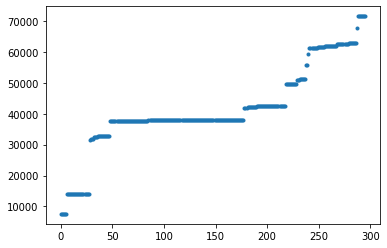

In [55]:
plt.plot(frame_inds, '.')

[17 17 17 ... 17 17 17] [147 147 147 ... 143 143 143]

donor/acceptor couples:
 [[ 17  17 144 144 144 144]
 [143 147  16  20  51 178]]


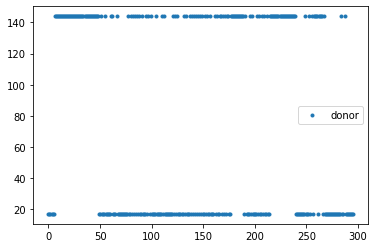

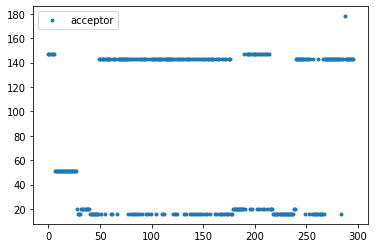

In [77]:
print(donor_id, acceptor_id)

couples_don_acc = np.vstack((donor_id, acceptor_id))

couples = np.unique(couples_don_acc, axis=1)

print('\ndonor/acceptor couples:\n', couples)

plt.plot(donor_id, '.', label='donor')
plt.legend()

plt.figure()
plt.plot(acceptor_id, '.', label='acceptor')
plt.legend()

In [75]:
for i in range(couples.shape[1]):
    print('couple: donor %s with acceptor %s' % (u.atoms[couples[0, i]], u.atoms[couples[1, i]]), '\n')

couple: donor <Atom 18: N3 of type N of resname U, resid 1 and segid SYSTEM and altLoc > with acceptor <Atom 144: O4 of type O of resname U, resid 5 and segid SYSTEM and altLoc > 

couple: donor <Atom 18: N3 of type N of resname U, resid 1 and segid SYSTEM and altLoc > with acceptor <Atom 148: O2 of type O of resname U, resid 5 and segid SYSTEM and altLoc > 

couple: donor <Atom 145: N3 of type N of resname U, resid 5 and segid SYSTEM and altLoc > with acceptor <Atom 17: O4 of type O of resname U, resid 1 and segid SYSTEM and altLoc > 

couple: donor <Atom 145: N3 of type N of resname U, resid 5 and segid SYSTEM and altLoc > with acceptor <Atom 21: O2 of type O of resname U, resid 1 and segid SYSTEM and altLoc > 

couple: donor <Atom 145: N3 of type N of resname U, resid 5 and segid SYSTEM and altLoc > with acceptor <Atom 52: O2 of type O of resname C, resid 2 and segid SYSTEM and altLoc > 

couple: donor <Atom 145: N3 of type N of resname U, resid 5 and segid SYSTEM and altLoc > with 

### extract RMSD

In [25]:
from MDAnalysis.analysis import rms

ref = mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (sequence, sequence))

j = 0
univ = mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (sequence, sequence),
                    '/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (sequence, sequence, sequence, j+1))

ref_atoms = ref.select_atoms('all')
traj_atoms = univ.select_atoms('all')

traj_atoms

R = rms.RMSD(traj_atoms, ref_atoms, ref_frame=0)

R.run()

for frame, time, rmsd_value in R.rmsd:
    print(f"Frame: {frame}, Time: {time:.2f} ps, RMSD: {rmsd_value:.3f} Å")
    
np.save('rmsd_AAAA.npy', R.rmsd)

Frame: 0.0, Time: 0.00 ps, RMSD: 0.000 Å
Frame: 1.0, Time: 1.00 ps, RMSD: 1.259 Å
Frame: 2.0, Time: 2.00 ps, RMSD: 0.615 Å
Frame: 3.0, Time: 3.00 ps, RMSD: 1.290 Å
Frame: 4.0, Time: 4.00 ps, RMSD: 0.804 Å
Frame: 5.0, Time: 5.00 ps, RMSD: 0.766 Å
Frame: 6.0, Time: 6.00 ps, RMSD: 0.715 Å
Frame: 7.0, Time: 7.00 ps, RMSD: 1.616 Å
Frame: 8.0, Time: 8.00 ps, RMSD: 0.804 Å
Frame: 9.0, Time: 9.00 ps, RMSD: 0.904 Å
Frame: 10.0, Time: 10.00 ps, RMSD: 1.135 Å
Frame: 11.0, Time: 11.00 ps, RMSD: 1.742 Å
Frame: 12.0, Time: 12.00 ps, RMSD: 0.684 Å
Frame: 13.0, Time: 13.00 ps, RMSD: 1.049 Å
Frame: 14.0, Time: 14.00 ps, RMSD: 1.304 Å
Frame: 15.0, Time: 15.00 ps, RMSD: 1.039 Å
Frame: 16.0, Time: 16.00 ps, RMSD: 1.025 Å
Frame: 17.0, Time: 17.00 ps, RMSD: 1.011 Å
Frame: 18.0, Time: 18.00 ps, RMSD: 0.887 Å
Frame: 19.0, Time: 19.00 ps, RMSD: 1.662 Å
Frame: 20.0, Time: 20.00 ps, RMSD: 1.699 Å
Frame: 21.0, Time: 21.00 ps, RMSD: 1.995 Å
Frame: 22.0, Time: 22.00 ps, RMSD: 1.187 Å
Frame: 23.0, Time: 23.00 ps, RM

Frame: 1211.0, Time: 1211.00 ps, RMSD: 4.794 Å
Frame: 1212.0, Time: 1212.00 ps, RMSD: 4.953 Å
Frame: 1213.0, Time: 1213.00 ps, RMSD: 1.610 Å
Frame: 1214.0, Time: 1214.00 ps, RMSD: 4.876 Å
Frame: 1215.0, Time: 1215.00 ps, RMSD: 4.926 Å
Frame: 1216.0, Time: 1216.00 ps, RMSD: 4.978 Å
Frame: 1217.0, Time: 1217.00 ps, RMSD: 4.923 Å
Frame: 1218.0, Time: 1218.00 ps, RMSD: 4.981 Å
Frame: 1219.0, Time: 1219.00 ps, RMSD: 4.997 Å
Frame: 1220.0, Time: 1220.00 ps, RMSD: 5.043 Å
Frame: 1221.0, Time: 1221.00 ps, RMSD: 4.909 Å
Frame: 1222.0, Time: 1222.00 ps, RMSD: 5.004 Å
Frame: 1223.0, Time: 1223.00 ps, RMSD: 4.830 Å
Frame: 1224.0, Time: 1224.00 ps, RMSD: 1.315 Å
Frame: 1225.0, Time: 1225.00 ps, RMSD: 1.531 Å
Frame: 1226.0, Time: 1226.00 ps, RMSD: 1.469 Å
Frame: 1227.0, Time: 1227.00 ps, RMSD: 1.325 Å
Frame: 1228.0, Time: 1228.00 ps, RMSD: 1.387 Å
Frame: 1229.0, Time: 1229.00 ps, RMSD: 1.305 Å
Frame: 1230.0, Time: 1230.00 ps, RMSD: 1.281 Å
Frame: 1231.0, Time: 1231.00 ps, RMSD: 5.114 Å
Frame: 1232.0

Frame: 2041.0, Time: 2041.00 ps, RMSD: 1.185 Å
Frame: 2042.0, Time: 2042.00 ps, RMSD: 1.133 Å
Frame: 2043.0, Time: 2043.00 ps, RMSD: 1.078 Å
Frame: 2044.0, Time: 2044.00 ps, RMSD: 3.417 Å
Frame: 2045.0, Time: 2045.00 ps, RMSD: 1.146 Å
Frame: 2046.0, Time: 2046.00 ps, RMSD: 1.077 Å
Frame: 2047.0, Time: 2047.00 ps, RMSD: 1.245 Å
Frame: 2048.0, Time: 2048.00 ps, RMSD: 1.285 Å
Frame: 2049.0, Time: 2049.00 ps, RMSD: 1.317 Å
Frame: 2050.0, Time: 2050.00 ps, RMSD: 1.331 Å
Frame: 2051.0, Time: 2051.00 ps, RMSD: 1.348 Å
Frame: 2052.0, Time: 2052.00 ps, RMSD: 1.119 Å
Frame: 2053.0, Time: 2053.00 ps, RMSD: 1.208 Å
Frame: 2054.0, Time: 2054.00 ps, RMSD: 3.330 Å
Frame: 2055.0, Time: 2055.00 ps, RMSD: 3.404 Å
Frame: 2056.0, Time: 2056.00 ps, RMSD: 3.230 Å
Frame: 2057.0, Time: 2057.00 ps, RMSD: 3.227 Å
Frame: 2058.0, Time: 2058.00 ps, RMSD: 4.880 Å
Frame: 2059.0, Time: 2059.00 ps, RMSD: 4.903 Å
Frame: 2060.0, Time: 2060.00 ps, RMSD: 1.066 Å
Frame: 2061.0, Time: 2061.00 ps, RMSD: 4.894 Å
Frame: 2062.0

Frame: 2704.0, Time: 2704.00 ps, RMSD: 2.787 Å
Frame: 2705.0, Time: 2705.00 ps, RMSD: 1.303 Å
Frame: 2706.0, Time: 2706.00 ps, RMSD: 2.693 Å
Frame: 2707.0, Time: 2707.00 ps, RMSD: 2.790 Å
Frame: 2708.0, Time: 2708.00 ps, RMSD: 3.033 Å
Frame: 2709.0, Time: 2709.00 ps, RMSD: 3.131 Å
Frame: 2710.0, Time: 2710.00 ps, RMSD: 3.370 Å
Frame: 2711.0, Time: 2711.00 ps, RMSD: 3.396 Å
Frame: 2712.0, Time: 2712.00 ps, RMSD: 1.240 Å
Frame: 2713.0, Time: 2713.00 ps, RMSD: 1.253 Å
Frame: 2714.0, Time: 2714.00 ps, RMSD: 1.175 Å
Frame: 2715.0, Time: 2715.00 ps, RMSD: 1.252 Å
Frame: 2716.0, Time: 2716.00 ps, RMSD: 3.392 Å
Frame: 2717.0, Time: 2717.00 ps, RMSD: 1.207 Å
Frame: 2718.0, Time: 2718.00 ps, RMSD: 1.282 Å
Frame: 2719.0, Time: 2719.00 ps, RMSD: 3.412 Å
Frame: 2720.0, Time: 2720.00 ps, RMSD: 3.389 Å
Frame: 2721.0, Time: 2721.00 ps, RMSD: 1.306 Å
Frame: 2722.0, Time: 2722.00 ps, RMSD: 1.094 Å
Frame: 2723.0, Time: 2723.00 ps, RMSD: 1.272 Å
Frame: 2724.0, Time: 2724.00 ps, RMSD: 1.287 Å
Frame: 2725.0

Frame: 3953.0, Time: 3953.00 ps, RMSD: 1.275 Å
Frame: 3954.0, Time: 3954.00 ps, RMSD: 1.470 Å
Frame: 3955.0, Time: 3955.00 ps, RMSD: 4.827 Å
Frame: 3956.0, Time: 3956.00 ps, RMSD: 1.370 Å
Frame: 3957.0, Time: 3957.00 ps, RMSD: 1.318 Å
Frame: 3958.0, Time: 3958.00 ps, RMSD: 1.289 Å
Frame: 3959.0, Time: 3959.00 ps, RMSD: 1.275 Å
Frame: 3960.0, Time: 3960.00 ps, RMSD: 1.378 Å
Frame: 3961.0, Time: 3961.00 ps, RMSD: 1.441 Å
Frame: 3962.0, Time: 3962.00 ps, RMSD: 1.320 Å
Frame: 3963.0, Time: 3963.00 ps, RMSD: 1.308 Å
Frame: 3964.0, Time: 3964.00 ps, RMSD: 1.356 Å
Frame: 3965.0, Time: 3965.00 ps, RMSD: 1.263 Å
Frame: 3966.0, Time: 3966.00 ps, RMSD: 1.251 Å
Frame: 3967.0, Time: 3967.00 ps, RMSD: 1.408 Å
Frame: 3968.0, Time: 3968.00 ps, RMSD: 1.108 Å
Frame: 3969.0, Time: 3969.00 ps, RMSD: 2.850 Å
Frame: 3970.0, Time: 3970.00 ps, RMSD: 1.083 Å
Frame: 3971.0, Time: 3971.00 ps, RMSD: 2.905 Å
Frame: 3972.0, Time: 3972.00 ps, RMSD: 5.206 Å
Frame: 3973.0, Time: 3973.00 ps, RMSD: 2.690 Å
Frame: 3974.0

Frame: 4724.0, Time: 4724.00 ps, RMSD: 1.236 Å
Frame: 4725.0, Time: 4725.00 ps, RMSD: 0.957 Å
Frame: 4726.0, Time: 4726.00 ps, RMSD: 1.003 Å
Frame: 4727.0, Time: 4727.00 ps, RMSD: 0.915 Å
Frame: 4728.0, Time: 4728.00 ps, RMSD: 4.856 Å
Frame: 4729.0, Time: 4729.00 ps, RMSD: 4.780 Å
Frame: 4730.0, Time: 4730.00 ps, RMSD: 4.982 Å
Frame: 4731.0, Time: 4731.00 ps, RMSD: 2.205 Å
Frame: 4732.0, Time: 4732.00 ps, RMSD: 1.682 Å
Frame: 4733.0, Time: 4733.00 ps, RMSD: 1.666 Å
Frame: 4734.0, Time: 4734.00 ps, RMSD: 1.936 Å
Frame: 4735.0, Time: 4735.00 ps, RMSD: 1.986 Å
Frame: 4736.0, Time: 4736.00 ps, RMSD: 1.655 Å
Frame: 4737.0, Time: 4737.00 ps, RMSD: 1.612 Å
Frame: 4738.0, Time: 4738.00 ps, RMSD: 4.925 Å
Frame: 4739.0, Time: 4739.00 ps, RMSD: 2.065 Å
Frame: 4740.0, Time: 4740.00 ps, RMSD: 1.944 Å
Frame: 4741.0, Time: 4741.00 ps, RMSD: 1.889 Å
Frame: 4742.0, Time: 4742.00 ps, RMSD: 2.079 Å
Frame: 4743.0, Time: 4743.00 ps, RMSD: 3.357 Å
Frame: 4744.0, Time: 4744.00 ps, RMSD: 3.431 Å
Frame: 4745.0

Frame: 5709.0, Time: 5709.00 ps, RMSD: 2.829 Å
Frame: 5710.0, Time: 5710.00 ps, RMSD: 2.872 Å
Frame: 5711.0, Time: 5711.00 ps, RMSD: 2.750 Å
Frame: 5712.0, Time: 5712.00 ps, RMSD: 2.822 Å
Frame: 5713.0, Time: 5713.00 ps, RMSD: 2.905 Å
Frame: 5714.0, Time: 5714.00 ps, RMSD: 1.454 Å
Frame: 5715.0, Time: 5715.00 ps, RMSD: 1.215 Å
Frame: 5716.0, Time: 5716.00 ps, RMSD: 1.334 Å
Frame: 5717.0, Time: 5717.00 ps, RMSD: 1.622 Å
Frame: 5718.0, Time: 5718.00 ps, RMSD: 2.410 Å
Frame: 5719.0, Time: 5719.00 ps, RMSD: 1.412 Å
Frame: 5720.0, Time: 5720.00 ps, RMSD: 1.099 Å
Frame: 5721.0, Time: 5721.00 ps, RMSD: 1.192 Å
Frame: 5722.0, Time: 5722.00 ps, RMSD: 1.227 Å
Frame: 5723.0, Time: 5723.00 ps, RMSD: 1.236 Å
Frame: 5724.0, Time: 5724.00 ps, RMSD: 1.290 Å
Frame: 5725.0, Time: 5725.00 ps, RMSD: 1.171 Å
Frame: 5726.0, Time: 5726.00 ps, RMSD: 1.357 Å
Frame: 5727.0, Time: 5727.00 ps, RMSD: 1.431 Å
Frame: 5728.0, Time: 5728.00 ps, RMSD: 1.243 Å
Frame: 5729.0, Time: 5729.00 ps, RMSD: 1.238 Å
Frame: 5730.0

Frame: 6959.0, Time: 6959.00 ps, RMSD: 2.833 Å
Frame: 6960.0, Time: 6960.00 ps, RMSD: 2.866 Å
Frame: 6961.0, Time: 6961.00 ps, RMSD: 2.931 Å
Frame: 6962.0, Time: 6962.00 ps, RMSD: 2.895 Å
Frame: 6963.0, Time: 6963.00 ps, RMSD: 2.812 Å
Frame: 6964.0, Time: 6964.00 ps, RMSD: 2.735 Å
Frame: 6965.0, Time: 6965.00 ps, RMSD: 2.798 Å
Frame: 6966.0, Time: 6966.00 ps, RMSD: 2.763 Å
Frame: 6967.0, Time: 6967.00 ps, RMSD: 2.925 Å
Frame: 6968.0, Time: 6968.00 ps, RMSD: 3.049 Å
Frame: 6969.0, Time: 6969.00 ps, RMSD: 3.022 Å
Frame: 6970.0, Time: 6970.00 ps, RMSD: 2.892 Å
Frame: 6971.0, Time: 6971.00 ps, RMSD: 2.934 Å
Frame: 6972.0, Time: 6972.00 ps, RMSD: 2.931 Å
Frame: 6973.0, Time: 6973.00 ps, RMSD: 3.280 Å
Frame: 6974.0, Time: 6974.00 ps, RMSD: 3.530 Å
Frame: 6975.0, Time: 6975.00 ps, RMSD: 3.461 Å
Frame: 6976.0, Time: 6976.00 ps, RMSD: 3.391 Å
Frame: 6977.0, Time: 6977.00 ps, RMSD: 3.464 Å
Frame: 6978.0, Time: 6978.00 ps, RMSD: 3.391 Å
Frame: 6979.0, Time: 6979.00 ps, RMSD: 3.553 Å
Frame: 6980.0

Frame: 7713.0, Time: 7713.00 ps, RMSD: 4.080 Å
Frame: 7714.0, Time: 7714.00 ps, RMSD: 3.063 Å
Frame: 7715.0, Time: 7715.00 ps, RMSD: 3.079 Å
Frame: 7716.0, Time: 7716.00 ps, RMSD: 3.177 Å
Frame: 7717.0, Time: 7717.00 ps, RMSD: 2.503 Å
Frame: 7718.0, Time: 7718.00 ps, RMSD: 2.481 Å
Frame: 7719.0, Time: 7719.00 ps, RMSD: 2.478 Å
Frame: 7720.0, Time: 7720.00 ps, RMSD: 3.749 Å
Frame: 7721.0, Time: 7721.00 ps, RMSD: 2.539 Å
Frame: 7722.0, Time: 7722.00 ps, RMSD: 2.396 Å
Frame: 7723.0, Time: 7723.00 ps, RMSD: 3.079 Å
Frame: 7724.0, Time: 7724.00 ps, RMSD: 3.046 Å
Frame: 7725.0, Time: 7725.00 ps, RMSD: 2.971 Å
Frame: 7726.0, Time: 7726.00 ps, RMSD: 2.794 Å
Frame: 7727.0, Time: 7727.00 ps, RMSD: 2.916 Å
Frame: 7728.0, Time: 7728.00 ps, RMSD: 2.193 Å
Frame: 7729.0, Time: 7729.00 ps, RMSD: 2.964 Å
Frame: 7730.0, Time: 7730.00 ps, RMSD: 2.993 Å
Frame: 7731.0, Time: 7731.00 ps, RMSD: 2.100 Å
Frame: 7732.0, Time: 7732.00 ps, RMSD: 2.141 Å
Frame: 7733.0, Time: 7733.00 ps, RMSD: 2.861 Å
Frame: 7734.0

Frame: 8928.0, Time: 8928.00 ps, RMSD: 3.195 Å
Frame: 8929.0, Time: 8929.00 ps, RMSD: 0.975 Å
Frame: 8930.0, Time: 8930.00 ps, RMSD: 3.124 Å
Frame: 8931.0, Time: 8931.00 ps, RMSD: 3.347 Å
Frame: 8932.0, Time: 8932.00 ps, RMSD: 3.276 Å
Frame: 8933.0, Time: 8933.00 ps, RMSD: 3.174 Å
Frame: 8934.0, Time: 8934.00 ps, RMSD: 0.970 Å
Frame: 8935.0, Time: 8935.00 ps, RMSD: 1.032 Å
Frame: 8936.0, Time: 8936.00 ps, RMSD: 4.022 Å
Frame: 8937.0, Time: 8937.00 ps, RMSD: 0.925 Å
Frame: 8938.0, Time: 8938.00 ps, RMSD: 0.782 Å
Frame: 8939.0, Time: 8939.00 ps, RMSD: 4.029 Å
Frame: 8940.0, Time: 8940.00 ps, RMSD: 0.881 Å
Frame: 8941.0, Time: 8941.00 ps, RMSD: 0.915 Å
Frame: 8942.0, Time: 8942.00 ps, RMSD: 0.863 Å
Frame: 8943.0, Time: 8943.00 ps, RMSD: 3.917 Å
Frame: 8944.0, Time: 8944.00 ps, RMSD: 1.000 Å
Frame: 8945.0, Time: 8945.00 ps, RMSD: 1.050 Å
Frame: 8946.0, Time: 8946.00 ps, RMSD: 1.158 Å
Frame: 8947.0, Time: 8947.00 ps, RMSD: 1.237 Å
Frame: 8948.0, Time: 8948.00 ps, RMSD: 1.042 Å
Frame: 8949.0

Frame: 10207.0, Time: 10207.00 ps, RMSD: 1.771 Å
Frame: 10208.0, Time: 10208.00 ps, RMSD: 1.350 Å
Frame: 10209.0, Time: 10209.00 ps, RMSD: 1.566 Å
Frame: 10210.0, Time: 10210.00 ps, RMSD: 1.665 Å
Frame: 10211.0, Time: 10211.00 ps, RMSD: 1.532 Å
Frame: 10212.0, Time: 10212.00 ps, RMSD: 1.343 Å
Frame: 10213.0, Time: 10213.00 ps, RMSD: 1.503 Å
Frame: 10214.0, Time: 10214.00 ps, RMSD: 1.583 Å
Frame: 10215.0, Time: 10215.00 ps, RMSD: 1.694 Å
Frame: 10216.0, Time: 10216.00 ps, RMSD: 1.457 Å
Frame: 10217.0, Time: 10217.00 ps, RMSD: 3.492 Å
Frame: 10218.0, Time: 10218.00 ps, RMSD: 3.130 Å
Frame: 10219.0, Time: 10219.00 ps, RMSD: 3.365 Å
Frame: 10220.0, Time: 10220.00 ps, RMSD: 3.300 Å
Frame: 10221.0, Time: 10221.00 ps, RMSD: 3.183 Å
Frame: 10222.0, Time: 10222.00 ps, RMSD: 3.357 Å
Frame: 10223.0, Time: 10223.00 ps, RMSD: 3.313 Å
Frame: 10224.0, Time: 10224.00 ps, RMSD: 1.512 Å
Frame: 10225.0, Time: 10225.00 ps, RMSD: 3.313 Å
Frame: 10226.0, Time: 10226.00 ps, RMSD: 3.274 Å
Frame: 10227.0, Time

Frame: 10907.0, Time: 10907.00 ps, RMSD: 1.218 Å
Frame: 10908.0, Time: 10908.00 ps, RMSD: 3.347 Å
Frame: 10909.0, Time: 10909.00 ps, RMSD: 3.241 Å
Frame: 10910.0, Time: 10910.00 ps, RMSD: 1.406 Å
Frame: 10911.0, Time: 10911.00 ps, RMSD: 2.127 Å
Frame: 10912.0, Time: 10912.00 ps, RMSD: 2.187 Å
Frame: 10913.0, Time: 10913.00 ps, RMSD: 1.291 Å
Frame: 10914.0, Time: 10914.00 ps, RMSD: 1.301 Å
Frame: 10915.0, Time: 10915.00 ps, RMSD: 1.240 Å
Frame: 10916.0, Time: 10916.00 ps, RMSD: 1.194 Å
Frame: 10917.0, Time: 10917.00 ps, RMSD: 1.157 Å
Frame: 10918.0, Time: 10918.00 ps, RMSD: 1.175 Å
Frame: 10919.0, Time: 10919.00 ps, RMSD: 1.111 Å
Frame: 10920.0, Time: 10920.00 ps, RMSD: 3.808 Å
Frame: 10921.0, Time: 10921.00 ps, RMSD: 3.826 Å
Frame: 10922.0, Time: 10922.00 ps, RMSD: 3.697 Å
Frame: 10923.0, Time: 10923.00 ps, RMSD: 3.650 Å
Frame: 10924.0, Time: 10924.00 ps, RMSD: 3.718 Å
Frame: 10925.0, Time: 10925.00 ps, RMSD: 3.741 Å
Frame: 10926.0, Time: 10926.00 ps, RMSD: 3.784 Å
Frame: 10927.0, Time

Frame: 11706.0, Time: 11706.00 ps, RMSD: 1.557 Å
Frame: 11707.0, Time: 11707.00 ps, RMSD: 3.927 Å
Frame: 11708.0, Time: 11708.00 ps, RMSD: 3.878 Å
Frame: 11709.0, Time: 11709.00 ps, RMSD: 3.972 Å
Frame: 11710.0, Time: 11710.00 ps, RMSD: 3.823 Å
Frame: 11711.0, Time: 11711.00 ps, RMSD: 2.644 Å
Frame: 11712.0, Time: 11712.00 ps, RMSD: 2.539 Å
Frame: 11713.0, Time: 11713.00 ps, RMSD: 0.909 Å
Frame: 11714.0, Time: 11714.00 ps, RMSD: 2.623 Å
Frame: 11715.0, Time: 11715.00 ps, RMSD: 2.906 Å
Frame: 11716.0, Time: 11716.00 ps, RMSD: 2.793 Å
Frame: 11717.0, Time: 11717.00 ps, RMSD: 2.818 Å
Frame: 11718.0, Time: 11718.00 ps, RMSD: 2.933 Å
Frame: 11719.0, Time: 11719.00 ps, RMSD: 2.820 Å
Frame: 11720.0, Time: 11720.00 ps, RMSD: 4.079 Å
Frame: 11721.0, Time: 11721.00 ps, RMSD: 4.212 Å
Frame: 11722.0, Time: 11722.00 ps, RMSD: 2.604 Å
Frame: 11723.0, Time: 11723.00 ps, RMSD: 2.668 Å
Frame: 11724.0, Time: 11724.00 ps, RMSD: 2.625 Å
Frame: 11725.0, Time: 11725.00 ps, RMSD: 2.271 Å
Frame: 11726.0, Time

Frame: 13205.0, Time: 13205.00 ps, RMSD: 0.936 Å
Frame: 13206.0, Time: 13206.00 ps, RMSD: 1.057 Å
Frame: 13207.0, Time: 13207.00 ps, RMSD: 1.108 Å
Frame: 13208.0, Time: 13208.00 ps, RMSD: 3.981 Å
Frame: 13209.0, Time: 13209.00 ps, RMSD: 1.104 Å
Frame: 13210.0, Time: 13210.00 ps, RMSD: 1.095 Å
Frame: 13211.0, Time: 13211.00 ps, RMSD: 2.782 Å
Frame: 13212.0, Time: 13212.00 ps, RMSD: 2.707 Å
Frame: 13213.0, Time: 13213.00 ps, RMSD: 1.088 Å
Frame: 13214.0, Time: 13214.00 ps, RMSD: 2.646 Å
Frame: 13215.0, Time: 13215.00 ps, RMSD: 1.051 Å
Frame: 13216.0, Time: 13216.00 ps, RMSD: 1.042 Å
Frame: 13217.0, Time: 13217.00 ps, RMSD: 1.111 Å
Frame: 13218.0, Time: 13218.00 ps, RMSD: 2.584 Å
Frame: 13219.0, Time: 13219.00 ps, RMSD: 1.111 Å
Frame: 13220.0, Time: 13220.00 ps, RMSD: 1.112 Å
Frame: 13221.0, Time: 13221.00 ps, RMSD: 1.006 Å
Frame: 13222.0, Time: 13222.00 ps, RMSD: 1.085 Å
Frame: 13223.0, Time: 13223.00 ps, RMSD: 1.023 Å
Frame: 13224.0, Time: 13224.00 ps, RMSD: 1.028 Å
Frame: 13225.0, Time

Frame: 14590.0, Time: 14590.00 ps, RMSD: 4.718 Å
Frame: 14591.0, Time: 14591.00 ps, RMSD: 4.811 Å
Frame: 14592.0, Time: 14592.00 ps, RMSD: 1.283 Å
Frame: 14593.0, Time: 14593.00 ps, RMSD: 1.238 Å
Frame: 14594.0, Time: 14594.00 ps, RMSD: 1.217 Å
Frame: 14595.0, Time: 14595.00 ps, RMSD: 2.347 Å
Frame: 14596.0, Time: 14596.00 ps, RMSD: 1.349 Å
Frame: 14597.0, Time: 14597.00 ps, RMSD: 1.242 Å
Frame: 14598.0, Time: 14598.00 ps, RMSD: 1.306 Å
Frame: 14599.0, Time: 14599.00 ps, RMSD: 2.469 Å
Frame: 14600.0, Time: 14600.00 ps, RMSD: 4.747 Å
Frame: 14601.0, Time: 14601.00 ps, RMSD: 4.817 Å
Frame: 14602.0, Time: 14602.00 ps, RMSD: 2.350 Å
Frame: 14603.0, Time: 14603.00 ps, RMSD: 2.202 Å
Frame: 14604.0, Time: 14604.00 ps, RMSD: 4.914 Å
Frame: 14605.0, Time: 14605.00 ps, RMSD: 4.929 Å
Frame: 14606.0, Time: 14606.00 ps, RMSD: 4.872 Å
Frame: 14607.0, Time: 14607.00 ps, RMSD: 4.845 Å
Frame: 14608.0, Time: 14608.00 ps, RMSD: 1.082 Å
Frame: 14609.0, Time: 14609.00 ps, RMSD: 1.095 Å
Frame: 14610.0, Time

Frame: 15204.0, Time: 15204.00 ps, RMSD: 2.279 Å
Frame: 15205.0, Time: 15205.00 ps, RMSD: 2.354 Å
Frame: 15206.0, Time: 15206.00 ps, RMSD: 5.511 Å
Frame: 15207.0, Time: 15207.00 ps, RMSD: 1.199 Å
Frame: 15208.0, Time: 15208.00 ps, RMSD: 1.466 Å
Frame: 15209.0, Time: 15209.00 ps, RMSD: 1.325 Å
Frame: 15210.0, Time: 15210.00 ps, RMSD: 1.228 Å
Frame: 15211.0, Time: 15211.00 ps, RMSD: 1.308 Å
Frame: 15212.0, Time: 15212.00 ps, RMSD: 1.291 Å
Frame: 15213.0, Time: 15213.00 ps, RMSD: 1.330 Å
Frame: 15214.0, Time: 15214.00 ps, RMSD: 1.431 Å
Frame: 15215.0, Time: 15215.00 ps, RMSD: 2.246 Å
Frame: 15216.0, Time: 15216.00 ps, RMSD: 3.865 Å
Frame: 15217.0, Time: 15217.00 ps, RMSD: 3.915 Å
Frame: 15218.0, Time: 15218.00 ps, RMSD: 3.938 Å
Frame: 15219.0, Time: 15219.00 ps, RMSD: 1.383 Å
Frame: 15220.0, Time: 15220.00 ps, RMSD: 1.520 Å
Frame: 15221.0, Time: 15221.00 ps, RMSD: 1.632 Å
Frame: 15222.0, Time: 15222.00 ps, RMSD: 1.368 Å
Frame: 15223.0, Time: 15223.00 ps, RMSD: 1.266 Å
Frame: 15224.0, Time

Frame: 16204.0, Time: 16204.00 ps, RMSD: 3.558 Å
Frame: 16205.0, Time: 16205.00 ps, RMSD: 3.664 Å
Frame: 16206.0, Time: 16206.00 ps, RMSD: 2.468 Å
Frame: 16207.0, Time: 16207.00 ps, RMSD: 2.323 Å
Frame: 16208.0, Time: 16208.00 ps, RMSD: 2.337 Å
Frame: 16209.0, Time: 16209.00 ps, RMSD: 2.277 Å
Frame: 16210.0, Time: 16210.00 ps, RMSD: 3.571 Å
Frame: 16211.0, Time: 16211.00 ps, RMSD: 2.307 Å
Frame: 16212.0, Time: 16212.00 ps, RMSD: 2.383 Å
Frame: 16213.0, Time: 16213.00 ps, RMSD: 2.537 Å
Frame: 16214.0, Time: 16214.00 ps, RMSD: 2.696 Å
Frame: 16215.0, Time: 16215.00 ps, RMSD: 2.544 Å
Frame: 16216.0, Time: 16216.00 ps, RMSD: 2.598 Å
Frame: 16217.0, Time: 16217.00 ps, RMSD: 2.713 Å
Frame: 16218.0, Time: 16218.00 ps, RMSD: 2.564 Å
Frame: 16219.0, Time: 16219.00 ps, RMSD: 2.535 Å
Frame: 16220.0, Time: 16220.00 ps, RMSD: 2.481 Å
Frame: 16221.0, Time: 16221.00 ps, RMSD: 2.459 Å
Frame: 16222.0, Time: 16222.00 ps, RMSD: 5.189 Å
Frame: 16223.0, Time: 16223.00 ps, RMSD: 2.367 Å
Frame: 16224.0, Time

Frame: 17090.0, Time: 17090.00 ps, RMSD: 3.739 Å
Frame: 17091.0, Time: 17091.00 ps, RMSD: 3.718 Å
Frame: 17092.0, Time: 17092.00 ps, RMSD: 3.771 Å
Frame: 17093.0, Time: 17093.00 ps, RMSD: 3.743 Å
Frame: 17094.0, Time: 17094.00 ps, RMSD: 3.799 Å
Frame: 17095.0, Time: 17095.00 ps, RMSD: 3.717 Å
Frame: 17096.0, Time: 17096.00 ps, RMSD: 3.620 Å
Frame: 17097.0, Time: 17097.00 ps, RMSD: 3.762 Å
Frame: 17098.0, Time: 17098.00 ps, RMSD: 3.594 Å
Frame: 17099.0, Time: 17099.00 ps, RMSD: 3.723 Å
Frame: 17100.0, Time: 17100.00 ps, RMSD: 3.726 Å
Frame: 17101.0, Time: 17101.00 ps, RMSD: 3.415 Å
Frame: 17102.0, Time: 17102.00 ps, RMSD: 2.177 Å
Frame: 17103.0, Time: 17103.00 ps, RMSD: 2.269 Å
Frame: 17104.0, Time: 17104.00 ps, RMSD: 2.181 Å
Frame: 17105.0, Time: 17105.00 ps, RMSD: 3.309 Å
Frame: 17106.0, Time: 17106.00 ps, RMSD: 2.285 Å
Frame: 17107.0, Time: 17107.00 ps, RMSD: 2.374 Å
Frame: 17108.0, Time: 17108.00 ps, RMSD: 3.508 Å
Frame: 17109.0, Time: 17109.00 ps, RMSD: 3.523 Å
Frame: 17110.0, Time

Frame: 17864.0, Time: 17864.00 ps, RMSD: 5.094 Å
Frame: 17865.0, Time: 17865.00 ps, RMSD: 2.705 Å
Frame: 17866.0, Time: 17866.00 ps, RMSD: 4.967 Å
Frame: 17867.0, Time: 17867.00 ps, RMSD: 2.225 Å
Frame: 17868.0, Time: 17868.00 ps, RMSD: 2.231 Å
Frame: 17869.0, Time: 17869.00 ps, RMSD: 2.538 Å
Frame: 17870.0, Time: 17870.00 ps, RMSD: 2.534 Å
Frame: 17871.0, Time: 17871.00 ps, RMSD: 2.340 Å
Frame: 17872.0, Time: 17872.00 ps, RMSD: 2.398 Å
Frame: 17873.0, Time: 17873.00 ps, RMSD: 2.518 Å
Frame: 17874.0, Time: 17874.00 ps, RMSD: 2.522 Å
Frame: 17875.0, Time: 17875.00 ps, RMSD: 2.432 Å
Frame: 17876.0, Time: 17876.00 ps, RMSD: 2.519 Å
Frame: 17877.0, Time: 17877.00 ps, RMSD: 2.548 Å
Frame: 17878.0, Time: 17878.00 ps, RMSD: 4.362 Å
Frame: 17879.0, Time: 17879.00 ps, RMSD: 4.345 Å
Frame: 17880.0, Time: 17880.00 ps, RMSD: 2.660 Å
Frame: 17881.0, Time: 17881.00 ps, RMSD: 2.648 Å
Frame: 17882.0, Time: 17882.00 ps, RMSD: 4.962 Å
Frame: 17883.0, Time: 17883.00 ps, RMSD: 5.053 Å
Frame: 17884.0, Time

Frame: 18862.0, Time: 18862.00 ps, RMSD: 1.530 Å
Frame: 18863.0, Time: 18863.00 ps, RMSD: 5.140 Å
Frame: 18864.0, Time: 18864.00 ps, RMSD: 5.234 Å
Frame: 18865.0, Time: 18865.00 ps, RMSD: 1.271 Å
Frame: 18866.0, Time: 18866.00 ps, RMSD: 1.242 Å
Frame: 18867.0, Time: 18867.00 ps, RMSD: 1.383 Å
Frame: 18868.0, Time: 18868.00 ps, RMSD: 5.072 Å
Frame: 18869.0, Time: 18869.00 ps, RMSD: 5.142 Å
Frame: 18870.0, Time: 18870.00 ps, RMSD: 4.927 Å
Frame: 18871.0, Time: 18871.00 ps, RMSD: 5.285 Å
Frame: 18872.0, Time: 18872.00 ps, RMSD: 4.324 Å
Frame: 18873.0, Time: 18873.00 ps, RMSD: 4.375 Å
Frame: 18874.0, Time: 18874.00 ps, RMSD: 5.118 Å
Frame: 18875.0, Time: 18875.00 ps, RMSD: 5.178 Å
Frame: 18876.0, Time: 18876.00 ps, RMSD: 5.075 Å
Frame: 18877.0, Time: 18877.00 ps, RMSD: 5.208 Å
Frame: 18878.0, Time: 18878.00 ps, RMSD: 5.221 Å
Frame: 18879.0, Time: 18879.00 ps, RMSD: 5.236 Å
Frame: 18880.0, Time: 18880.00 ps, RMSD: 4.867 Å
Frame: 18881.0, Time: 18881.00 ps, RMSD: 5.110 Å
Frame: 18882.0, Time

Frame: 20202.0, Time: 20202.00 ps, RMSD: 3.108 Å
Frame: 20203.0, Time: 20203.00 ps, RMSD: 3.065 Å
Frame: 20204.0, Time: 20204.00 ps, RMSD: 3.604 Å
Frame: 20205.0, Time: 20205.00 ps, RMSD: 3.673 Å
Frame: 20206.0, Time: 20206.00 ps, RMSD: 3.727 Å
Frame: 20207.0, Time: 20207.00 ps, RMSD: 2.969 Å
Frame: 20208.0, Time: 20208.00 ps, RMSD: 3.216 Å
Frame: 20209.0, Time: 20209.00 ps, RMSD: 4.588 Å
Frame: 20210.0, Time: 20210.00 ps, RMSD: 3.105 Å
Frame: 20211.0, Time: 20211.00 ps, RMSD: 3.097 Å
Frame: 20212.0, Time: 20212.00 ps, RMSD: 3.171 Å
Frame: 20213.0, Time: 20213.00 ps, RMSD: 3.330 Å
Frame: 20214.0, Time: 20214.00 ps, RMSD: 2.938 Å
Frame: 20215.0, Time: 20215.00 ps, RMSD: 2.785 Å
Frame: 20216.0, Time: 20216.00 ps, RMSD: 3.081 Å
Frame: 20217.0, Time: 20217.00 ps, RMSD: 3.749 Å
Frame: 20218.0, Time: 20218.00 ps, RMSD: 3.869 Å
Frame: 20219.0, Time: 20219.00 ps, RMSD: 3.012 Å
Frame: 20220.0, Time: 20220.00 ps, RMSD: 3.175 Å
Frame: 20221.0, Time: 20221.00 ps, RMSD: 3.193 Å
Frame: 20222.0, Time

Frame: 21201.0, Time: 21201.00 ps, RMSD: 2.892 Å
Frame: 21202.0, Time: 21202.00 ps, RMSD: 2.959 Å
Frame: 21203.0, Time: 21203.00 ps, RMSD: 3.123 Å
Frame: 21204.0, Time: 21204.00 ps, RMSD: 2.962 Å
Frame: 21205.0, Time: 21205.00 ps, RMSD: 3.472 Å
Frame: 21206.0, Time: 21206.00 ps, RMSD: 3.203 Å
Frame: 21207.0, Time: 21207.00 ps, RMSD: 3.455 Å
Frame: 21208.0, Time: 21208.00 ps, RMSD: 3.524 Å
Frame: 21209.0, Time: 21209.00 ps, RMSD: 3.389 Å
Frame: 21210.0, Time: 21210.00 ps, RMSD: 4.166 Å
Frame: 21211.0, Time: 21211.00 ps, RMSD: 3.514 Å
Frame: 21212.0, Time: 21212.00 ps, RMSD: 3.579 Å
Frame: 21213.0, Time: 21213.00 ps, RMSD: 3.564 Å
Frame: 21214.0, Time: 21214.00 ps, RMSD: 3.477 Å
Frame: 21215.0, Time: 21215.00 ps, RMSD: 3.465 Å
Frame: 21216.0, Time: 21216.00 ps, RMSD: 3.430 Å
Frame: 21217.0, Time: 21217.00 ps, RMSD: 3.316 Å
Frame: 21218.0, Time: 21218.00 ps, RMSD: 3.449 Å
Frame: 21219.0, Time: 21219.00 ps, RMSD: 1.542 Å
Frame: 21220.0, Time: 21220.00 ps, RMSD: 1.562 Å
Frame: 21221.0, Time

Frame: 22201.0, Time: 22201.00 ps, RMSD: 3.898 Å
Frame: 22202.0, Time: 22202.00 ps, RMSD: 3.306 Å
Frame: 22203.0, Time: 22203.00 ps, RMSD: 2.518 Å
Frame: 22204.0, Time: 22204.00 ps, RMSD: 3.748 Å
Frame: 22205.0, Time: 22205.00 ps, RMSD: 3.804 Å
Frame: 22206.0, Time: 22206.00 ps, RMSD: 3.621 Å
Frame: 22207.0, Time: 22207.00 ps, RMSD: 3.563 Å
Frame: 22208.0, Time: 22208.00 ps, RMSD: 3.557 Å
Frame: 22209.0, Time: 22209.00 ps, RMSD: 3.574 Å
Frame: 22210.0, Time: 22210.00 ps, RMSD: 3.462 Å
Frame: 22211.0, Time: 22211.00 ps, RMSD: 2.367 Å
Frame: 22212.0, Time: 22212.00 ps, RMSD: 2.406 Å
Frame: 22213.0, Time: 22213.00 ps, RMSD: 2.346 Å
Frame: 22214.0, Time: 22214.00 ps, RMSD: 2.439 Å
Frame: 22215.0, Time: 22215.00 ps, RMSD: 2.444 Å
Frame: 22216.0, Time: 22216.00 ps, RMSD: 3.593 Å
Frame: 22217.0, Time: 22217.00 ps, RMSD: 3.596 Å
Frame: 22218.0, Time: 22218.00 ps, RMSD: 3.639 Å
Frame: 22219.0, Time: 22219.00 ps, RMSD: 1.201 Å
Frame: 22220.0, Time: 22220.00 ps, RMSD: 3.484 Å
Frame: 22221.0, Time

Frame: 23200.0, Time: 23200.00 ps, RMSD: 1.067 Å
Frame: 23201.0, Time: 23201.00 ps, RMSD: 1.103 Å
Frame: 23202.0, Time: 23202.00 ps, RMSD: 2.714 Å
Frame: 23203.0, Time: 23203.00 ps, RMSD: 3.044 Å
Frame: 23204.0, Time: 23204.00 ps, RMSD: 3.147 Å
Frame: 23205.0, Time: 23205.00 ps, RMSD: 2.829 Å
Frame: 23206.0, Time: 23206.00 ps, RMSD: 3.120 Å
Frame: 23207.0, Time: 23207.00 ps, RMSD: 1.073 Å
Frame: 23208.0, Time: 23208.00 ps, RMSD: 1.217 Å
Frame: 23209.0, Time: 23209.00 ps, RMSD: 1.017 Å
Frame: 23210.0, Time: 23210.00 ps, RMSD: 2.956 Å
Frame: 23211.0, Time: 23211.00 ps, RMSD: 3.022 Å
Frame: 23212.0, Time: 23212.00 ps, RMSD: 2.998 Å
Frame: 23213.0, Time: 23213.00 ps, RMSD: 2.920 Å
Frame: 23214.0, Time: 23214.00 ps, RMSD: 1.315 Å
Frame: 23215.0, Time: 23215.00 ps, RMSD: 3.117 Å
Frame: 23216.0, Time: 23216.00 ps, RMSD: 3.136 Å
Frame: 23217.0, Time: 23217.00 ps, RMSD: 1.307 Å
Frame: 23218.0, Time: 23218.00 ps, RMSD: 1.329 Å
Frame: 23219.0, Time: 23219.00 ps, RMSD: 2.760 Å
Frame: 23220.0, Time

Frame: 24200.0, Time: 24200.00 ps, RMSD: 3.400 Å
Frame: 24201.0, Time: 24201.00 ps, RMSD: 3.278 Å
Frame: 24202.0, Time: 24202.00 ps, RMSD: 3.291 Å
Frame: 24203.0, Time: 24203.00 ps, RMSD: 4.372 Å
Frame: 24204.0, Time: 24204.00 ps, RMSD: 3.366 Å
Frame: 24205.0, Time: 24205.00 ps, RMSD: 3.354 Å
Frame: 24206.0, Time: 24206.00 ps, RMSD: 3.364 Å
Frame: 24207.0, Time: 24207.00 ps, RMSD: 4.300 Å
Frame: 24208.0, Time: 24208.00 ps, RMSD: 4.237 Å
Frame: 24209.0, Time: 24209.00 ps, RMSD: 4.272 Å
Frame: 24210.0, Time: 24210.00 ps, RMSD: 3.668 Å
Frame: 24211.0, Time: 24211.00 ps, RMSD: 2.921 Å
Frame: 24212.0, Time: 24212.00 ps, RMSD: 2.988 Å
Frame: 24213.0, Time: 24213.00 ps, RMSD: 2.911 Å
Frame: 24214.0, Time: 24214.00 ps, RMSD: 2.921 Å
Frame: 24215.0, Time: 24215.00 ps, RMSD: 2.962 Å
Frame: 24216.0, Time: 24216.00 ps, RMSD: 2.994 Å
Frame: 24217.0, Time: 24217.00 ps, RMSD: 3.108 Å
Frame: 24218.0, Time: 24218.00 ps, RMSD: 3.174 Å
Frame: 24219.0, Time: 24219.00 ps, RMSD: 3.133 Å
Frame: 24220.0, Time

Frame: 25186.0, Time: 25186.00 ps, RMSD: 3.054 Å
Frame: 25187.0, Time: 25187.00 ps, RMSD: 4.960 Å
Frame: 25188.0, Time: 25188.00 ps, RMSD: 5.047 Å
Frame: 25189.0, Time: 25189.00 ps, RMSD: 4.911 Å
Frame: 25190.0, Time: 25190.00 ps, RMSD: 5.032 Å
Frame: 25191.0, Time: 25191.00 ps, RMSD: 2.953 Å
Frame: 25192.0, Time: 25192.00 ps, RMSD: 2.956 Å
Frame: 25193.0, Time: 25193.00 ps, RMSD: 3.925 Å
Frame: 25194.0, Time: 25194.00 ps, RMSD: 3.128 Å
Frame: 25195.0, Time: 25195.00 ps, RMSD: 3.166 Å
Frame: 25196.0, Time: 25196.00 ps, RMSD: 3.737 Å
Frame: 25197.0, Time: 25197.00 ps, RMSD: 3.832 Å
Frame: 25198.0, Time: 25198.00 ps, RMSD: 3.907 Å
Frame: 25199.0, Time: 25199.00 ps, RMSD: 3.890 Å
Frame: 25200.0, Time: 25200.00 ps, RMSD: 3.804 Å
Frame: 25201.0, Time: 25201.00 ps, RMSD: 2.911 Å
Frame: 25202.0, Time: 25202.00 ps, RMSD: 2.932 Å
Frame: 25203.0, Time: 25203.00 ps, RMSD: 2.713 Å
Frame: 25204.0, Time: 25204.00 ps, RMSD: 4.147 Å
Frame: 25205.0, Time: 25205.00 ps, RMSD: 4.156 Å
Frame: 25206.0, Time

Frame: 26172.0, Time: 26172.00 ps, RMSD: 2.940 Å
Frame: 26173.0, Time: 26173.00 ps, RMSD: 2.842 Å
Frame: 26174.0, Time: 26174.00 ps, RMSD: 2.749 Å
Frame: 26175.0, Time: 26175.00 ps, RMSD: 2.814 Å
Frame: 26176.0, Time: 26176.00 ps, RMSD: 2.768 Å
Frame: 26177.0, Time: 26177.00 ps, RMSD: 2.817 Å
Frame: 26178.0, Time: 26178.00 ps, RMSD: 2.676 Å
Frame: 26179.0, Time: 26179.00 ps, RMSD: 2.715 Å
Frame: 26180.0, Time: 26180.00 ps, RMSD: 2.744 Å
Frame: 26181.0, Time: 26181.00 ps, RMSD: 2.543 Å
Frame: 26182.0, Time: 26182.00 ps, RMSD: 3.918 Å
Frame: 26183.0, Time: 26183.00 ps, RMSD: 2.568 Å
Frame: 26184.0, Time: 26184.00 ps, RMSD: 2.631 Å
Frame: 26185.0, Time: 26185.00 ps, RMSD: 2.579 Å
Frame: 26186.0, Time: 26186.00 ps, RMSD: 2.652 Å
Frame: 26187.0, Time: 26187.00 ps, RMSD: 2.633 Å
Frame: 26188.0, Time: 26188.00 ps, RMSD: 2.538 Å
Frame: 26189.0, Time: 26189.00 ps, RMSD: 2.516 Å
Frame: 26190.0, Time: 26190.00 ps, RMSD: 2.507 Å
Frame: 26191.0, Time: 26191.00 ps, RMSD: 2.569 Å
Frame: 26192.0, Time

Frame: 27067.0, Time: 27067.00 ps, RMSD: 3.275 Å
Frame: 27068.0, Time: 27068.00 ps, RMSD: 1.187 Å
Frame: 27069.0, Time: 27069.00 ps, RMSD: 3.276 Å
Frame: 27070.0, Time: 27070.00 ps, RMSD: 1.126 Å
Frame: 27071.0, Time: 27071.00 ps, RMSD: 2.933 Å
Frame: 27072.0, Time: 27072.00 ps, RMSD: 3.055 Å
Frame: 27073.0, Time: 27073.00 ps, RMSD: 3.206 Å
Frame: 27074.0, Time: 27074.00 ps, RMSD: 3.102 Å
Frame: 27075.0, Time: 27075.00 ps, RMSD: 3.082 Å
Frame: 27076.0, Time: 27076.00 ps, RMSD: 3.311 Å
Frame: 27077.0, Time: 27077.00 ps, RMSD: 1.062 Å
Frame: 27078.0, Time: 27078.00 ps, RMSD: 1.204 Å
Frame: 27079.0, Time: 27079.00 ps, RMSD: 3.411 Å
Frame: 27080.0, Time: 27080.00 ps, RMSD: 3.338 Å
Frame: 27081.0, Time: 27081.00 ps, RMSD: 3.487 Å
Frame: 27082.0, Time: 27082.00 ps, RMSD: 3.117 Å
Frame: 27083.0, Time: 27083.00 ps, RMSD: 3.364 Å
Frame: 27084.0, Time: 27084.00 ps, RMSD: 2.651 Å
Frame: 27085.0, Time: 27085.00 ps, RMSD: 2.586 Å
Frame: 27086.0, Time: 27086.00 ps, RMSD: 3.378 Å
Frame: 27087.0, Time

Frame: 27850.0, Time: 27850.00 ps, RMSD: 3.727 Å
Frame: 27851.0, Time: 27851.00 ps, RMSD: 1.287 Å
Frame: 27852.0, Time: 27852.00 ps, RMSD: 1.417 Å
Frame: 27853.0, Time: 27853.00 ps, RMSD: 3.357 Å
Frame: 27854.0, Time: 27854.00 ps, RMSD: 3.414 Å
Frame: 27855.0, Time: 27855.00 ps, RMSD: 1.679 Å
Frame: 27856.0, Time: 27856.00 ps, RMSD: 1.609 Å
Frame: 27857.0, Time: 27857.00 ps, RMSD: 1.576 Å
Frame: 27858.0, Time: 27858.00 ps, RMSD: 1.596 Å
Frame: 27859.0, Time: 27859.00 ps, RMSD: 5.917 Å
Frame: 27860.0, Time: 27860.00 ps, RMSD: 5.861 Å
Frame: 27861.0, Time: 27861.00 ps, RMSD: 5.901 Å
Frame: 27862.0, Time: 27862.00 ps, RMSD: 5.982 Å
Frame: 27863.0, Time: 27863.00 ps, RMSD: 5.980 Å
Frame: 27864.0, Time: 27864.00 ps, RMSD: 5.952 Å
Frame: 27865.0, Time: 27865.00 ps, RMSD: 5.884 Å
Frame: 27866.0, Time: 27866.00 ps, RMSD: 3.541 Å
Frame: 27867.0, Time: 27867.00 ps, RMSD: 1.775 Å
Frame: 27868.0, Time: 27868.00 ps, RMSD: 5.846 Å
Frame: 27869.0, Time: 27869.00 ps, RMSD: 5.900 Å
Frame: 27870.0, Time

Frame: 29197.0, Time: 29197.00 ps, RMSD: 3.407 Å
Frame: 29198.0, Time: 29198.00 ps, RMSD: 2.480 Å
Frame: 29199.0, Time: 29199.00 ps, RMSD: 2.456 Å
Frame: 29200.0, Time: 29200.00 ps, RMSD: 2.414 Å
Frame: 29201.0, Time: 29201.00 ps, RMSD: 2.605 Å
Frame: 29202.0, Time: 29202.00 ps, RMSD: 2.591 Å
Frame: 29203.0, Time: 29203.00 ps, RMSD: 2.617 Å
Frame: 29204.0, Time: 29204.00 ps, RMSD: 2.427 Å
Frame: 29205.0, Time: 29205.00 ps, RMSD: 2.693 Å
Frame: 29206.0, Time: 29206.00 ps, RMSD: 2.437 Å
Frame: 29207.0, Time: 29207.00 ps, RMSD: 2.304 Å
Frame: 29208.0, Time: 29208.00 ps, RMSD: 2.461 Å
Frame: 29209.0, Time: 29209.00 ps, RMSD: 2.467 Å
Frame: 29210.0, Time: 29210.00 ps, RMSD: 2.543 Å
Frame: 29211.0, Time: 29211.00 ps, RMSD: 2.554 Å
Frame: 29212.0, Time: 29212.00 ps, RMSD: 2.759 Å
Frame: 29213.0, Time: 29213.00 ps, RMSD: 2.662 Å
Frame: 29214.0, Time: 29214.00 ps, RMSD: 2.615 Å
Frame: 29215.0, Time: 29215.00 ps, RMSD: 2.605 Å
Frame: 29216.0, Time: 29216.00 ps, RMSD: 2.596 Å
Frame: 29217.0, Time

Frame: 29697.0, Time: 29697.00 ps, RMSD: 4.211 Å
Frame: 29698.0, Time: 29698.00 ps, RMSD: 2.458 Å
Frame: 29699.0, Time: 29699.00 ps, RMSD: 4.344 Å
Frame: 29700.0, Time: 29700.00 ps, RMSD: 2.478 Å
Frame: 29701.0, Time: 29701.00 ps, RMSD: 2.503 Å
Frame: 29702.0, Time: 29702.00 ps, RMSD: 2.396 Å
Frame: 29703.0, Time: 29703.00 ps, RMSD: 2.663 Å
Frame: 29704.0, Time: 29704.00 ps, RMSD: 2.553 Å
Frame: 29705.0, Time: 29705.00 ps, RMSD: 2.525 Å
Frame: 29706.0, Time: 29706.00 ps, RMSD: 2.860 Å
Frame: 29707.0, Time: 29707.00 ps, RMSD: 2.440 Å
Frame: 29708.0, Time: 29708.00 ps, RMSD: 3.804 Å
Frame: 29709.0, Time: 29709.00 ps, RMSD: 3.798 Å
Frame: 29710.0, Time: 29710.00 ps, RMSD: 3.857 Å
Frame: 29711.0, Time: 29711.00 ps, RMSD: 2.786 Å
Frame: 29712.0, Time: 29712.00 ps, RMSD: 4.236 Å
Frame: 29713.0, Time: 29713.00 ps, RMSD: 4.278 Å
Frame: 29714.0, Time: 29714.00 ps, RMSD: 4.297 Å
Frame: 29715.0, Time: 29715.00 ps, RMSD: 4.012 Å
Frame: 29716.0, Time: 29716.00 ps, RMSD: 4.220 Å
Frame: 29717.0, Time

Frame: 30590.0, Time: 30590.00 ps, RMSD: 4.279 Å
Frame: 30591.0, Time: 30591.00 ps, RMSD: 3.033 Å
Frame: 30592.0, Time: 30592.00 ps, RMSD: 4.216 Å
Frame: 30593.0, Time: 30593.00 ps, RMSD: 2.792 Å
Frame: 30594.0, Time: 30594.00 ps, RMSD: 4.275 Å
Frame: 30595.0, Time: 30595.00 ps, RMSD: 2.847 Å
Frame: 30596.0, Time: 30596.00 ps, RMSD: 2.869 Å
Frame: 30597.0, Time: 30597.00 ps, RMSD: 3.121 Å
Frame: 30598.0, Time: 30598.00 ps, RMSD: 3.271 Å
Frame: 30599.0, Time: 30599.00 ps, RMSD: 4.405 Å
Frame: 30600.0, Time: 30600.00 ps, RMSD: 4.455 Å
Frame: 30601.0, Time: 30601.00 ps, RMSD: 3.186 Å
Frame: 30602.0, Time: 30602.00 ps, RMSD: 4.476 Å
Frame: 30603.0, Time: 30603.00 ps, RMSD: 4.288 Å
Frame: 30604.0, Time: 30604.00 ps, RMSD: 4.260 Å
Frame: 30605.0, Time: 30605.00 ps, RMSD: 4.292 Å
Frame: 30606.0, Time: 30606.00 ps, RMSD: 4.406 Å
Frame: 30607.0, Time: 30607.00 ps, RMSD: 4.287 Å
Frame: 30608.0, Time: 30608.00 ps, RMSD: 3.401 Å
Frame: 30609.0, Time: 30609.00 ps, RMSD: 3.612 Å
Frame: 30610.0, Time

Frame: 31630.0, Time: 31630.00 ps, RMSD: 4.311 Å
Frame: 31631.0, Time: 31631.00 ps, RMSD: 3.391 Å
Frame: 31632.0, Time: 31632.00 ps, RMSD: 4.811 Å
Frame: 31633.0, Time: 31633.00 ps, RMSD: 4.308 Å
Frame: 31634.0, Time: 31634.00 ps, RMSD: 4.347 Å
Frame: 31635.0, Time: 31635.00 ps, RMSD: 4.986 Å
Frame: 31636.0, Time: 31636.00 ps, RMSD: 4.360 Å
Frame: 31637.0, Time: 31637.00 ps, RMSD: 4.914 Å
Frame: 31638.0, Time: 31638.00 ps, RMSD: 3.230 Å
Frame: 31639.0, Time: 31639.00 ps, RMSD: 3.484 Å
Frame: 31640.0, Time: 31640.00 ps, RMSD: 4.876 Å
Frame: 31641.0, Time: 31641.00 ps, RMSD: 4.922 Å
Frame: 31642.0, Time: 31642.00 ps, RMSD: 5.015 Å
Frame: 31643.0, Time: 31643.00 ps, RMSD: 5.074 Å
Frame: 31644.0, Time: 31644.00 ps, RMSD: 5.018 Å
Frame: 31645.0, Time: 31645.00 ps, RMSD: 4.890 Å
Frame: 31646.0, Time: 31646.00 ps, RMSD: 4.931 Å
Frame: 31647.0, Time: 31647.00 ps, RMSD: 3.411 Å
Frame: 31648.0, Time: 31648.00 ps, RMSD: 4.934 Å
Frame: 31649.0, Time: 31649.00 ps, RMSD: 5.078 Å
Frame: 31650.0, Time

Frame: 32695.0, Time: 32695.00 ps, RMSD: 3.295 Å
Frame: 32696.0, Time: 32696.00 ps, RMSD: 4.344 Å
Frame: 32697.0, Time: 32697.00 ps, RMSD: 4.460 Å
Frame: 32698.0, Time: 32698.00 ps, RMSD: 4.307 Å
Frame: 32699.0, Time: 32699.00 ps, RMSD: 3.895 Å
Frame: 32700.0, Time: 32700.00 ps, RMSD: 4.044 Å
Frame: 32701.0, Time: 32701.00 ps, RMSD: 3.173 Å
Frame: 32702.0, Time: 32702.00 ps, RMSD: 4.009 Å
Frame: 32703.0, Time: 32703.00 ps, RMSD: 3.867 Å
Frame: 32704.0, Time: 32704.00 ps, RMSD: 3.991 Å
Frame: 32705.0, Time: 32705.00 ps, RMSD: 3.908 Å
Frame: 32706.0, Time: 32706.00 ps, RMSD: 3.777 Å
Frame: 32707.0, Time: 32707.00 ps, RMSD: 3.992 Å
Frame: 32708.0, Time: 32708.00 ps, RMSD: 1.275 Å
Frame: 32709.0, Time: 32709.00 ps, RMSD: 1.141 Å
Frame: 32710.0, Time: 32710.00 ps, RMSD: 4.174 Å
Frame: 32711.0, Time: 32711.00 ps, RMSD: 4.093 Å
Frame: 32712.0, Time: 32712.00 ps, RMSD: 1.153 Å
Frame: 32713.0, Time: 32713.00 ps, RMSD: 4.027 Å
Frame: 32714.0, Time: 32714.00 ps, RMSD: 1.087 Å
Frame: 32715.0, Time

Frame: 33195.0, Time: 33195.00 ps, RMSD: 4.787 Å
Frame: 33196.0, Time: 33196.00 ps, RMSD: 4.856 Å
Frame: 33197.0, Time: 33197.00 ps, RMSD: 4.763 Å
Frame: 33198.0, Time: 33198.00 ps, RMSD: 4.810 Å
Frame: 33199.0, Time: 33199.00 ps, RMSD: 4.973 Å
Frame: 33200.0, Time: 33200.00 ps, RMSD: 3.423 Å
Frame: 33201.0, Time: 33201.00 ps, RMSD: 4.869 Å
Frame: 33202.0, Time: 33202.00 ps, RMSD: 3.201 Å
Frame: 33203.0, Time: 33203.00 ps, RMSD: 4.994 Å
Frame: 33204.0, Time: 33204.00 ps, RMSD: 4.963 Å
Frame: 33205.0, Time: 33205.00 ps, RMSD: 3.282 Å
Frame: 33206.0, Time: 33206.00 ps, RMSD: 3.251 Å
Frame: 33207.0, Time: 33207.00 ps, RMSD: 3.209 Å
Frame: 33208.0, Time: 33208.00 ps, RMSD: 3.283 Å
Frame: 33209.0, Time: 33209.00 ps, RMSD: 3.061 Å
Frame: 33210.0, Time: 33210.00 ps, RMSD: 3.289 Å
Frame: 33211.0, Time: 33211.00 ps, RMSD: 3.291 Å
Frame: 33212.0, Time: 33212.00 ps, RMSD: 3.813 Å
Frame: 33213.0, Time: 33213.00 ps, RMSD: 2.951 Å
Frame: 33214.0, Time: 33214.00 ps, RMSD: 3.071 Å
Frame: 33215.0, Time

Frame: 34635.0, Time: 34635.00 ps, RMSD: 3.465 Å
Frame: 34636.0, Time: 34636.00 ps, RMSD: 3.628 Å
Frame: 34637.0, Time: 34637.00 ps, RMSD: 4.651 Å
Frame: 34638.0, Time: 34638.00 ps, RMSD: 4.652 Å
Frame: 34639.0, Time: 34639.00 ps, RMSD: 4.930 Å
Frame: 34640.0, Time: 34640.00 ps, RMSD: 4.870 Å
Frame: 34641.0, Time: 34641.00 ps, RMSD: 5.005 Å
Frame: 34642.0, Time: 34642.00 ps, RMSD: 5.075 Å
Frame: 34643.0, Time: 34643.00 ps, RMSD: 4.897 Å
Frame: 34644.0, Time: 34644.00 ps, RMSD: 4.838 Å
Frame: 34645.0, Time: 34645.00 ps, RMSD: 4.791 Å
Frame: 34646.0, Time: 34646.00 ps, RMSD: 3.979 Å
Frame: 34647.0, Time: 34647.00 ps, RMSD: 4.009 Å
Frame: 34648.0, Time: 34648.00 ps, RMSD: 4.055 Å
Frame: 34649.0, Time: 34649.00 ps, RMSD: 3.857 Å
Frame: 34650.0, Time: 34650.00 ps, RMSD: 3.925 Å
Frame: 34651.0, Time: 34651.00 ps, RMSD: 3.789 Å
Frame: 34652.0, Time: 34652.00 ps, RMSD: 3.795 Å
Frame: 34653.0, Time: 34653.00 ps, RMSD: 3.767 Å
Frame: 34654.0, Time: 34654.00 ps, RMSD: 4.572 Å
Frame: 34655.0, Time

Frame: 35513.0, Time: 35513.00 ps, RMSD: 4.166 Å
Frame: 35514.0, Time: 35514.00 ps, RMSD: 3.344 Å
Frame: 35515.0, Time: 35515.00 ps, RMSD: 3.376 Å
Frame: 35516.0, Time: 35516.00 ps, RMSD: 3.447 Å
Frame: 35517.0, Time: 35517.00 ps, RMSD: 3.347 Å
Frame: 35518.0, Time: 35518.00 ps, RMSD: 3.404 Å
Frame: 35519.0, Time: 35519.00 ps, RMSD: 3.365 Å
Frame: 35520.0, Time: 35520.00 ps, RMSD: 3.421 Å
Frame: 35521.0, Time: 35521.00 ps, RMSD: 4.713 Å
Frame: 35522.0, Time: 35522.00 ps, RMSD: 3.394 Å
Frame: 35523.0, Time: 35523.00 ps, RMSD: 3.097 Å
Frame: 35524.0, Time: 35524.00 ps, RMSD: 3.439 Å
Frame: 35525.0, Time: 35525.00 ps, RMSD: 3.115 Å
Frame: 35526.0, Time: 35526.00 ps, RMSD: 3.264 Å
Frame: 35527.0, Time: 35527.00 ps, RMSD: 3.386 Å
Frame: 35528.0, Time: 35528.00 ps, RMSD: 3.373 Å
Frame: 35529.0, Time: 35529.00 ps, RMSD: 3.388 Å
Frame: 35530.0, Time: 35530.00 ps, RMSD: 3.336 Å
Frame: 35531.0, Time: 35531.00 ps, RMSD: 3.106 Å
Frame: 35532.0, Time: 35532.00 ps, RMSD: 3.468 Å
Frame: 35533.0, Time

Frame: 36517.0, Time: 36517.00 ps, RMSD: 1.202 Å
Frame: 36518.0, Time: 36518.00 ps, RMSD: 3.105 Å
Frame: 36519.0, Time: 36519.00 ps, RMSD: 3.056 Å
Frame: 36520.0, Time: 36520.00 ps, RMSD: 3.527 Å
Frame: 36521.0, Time: 36521.00 ps, RMSD: 3.087 Å
Frame: 36522.0, Time: 36522.00 ps, RMSD: 1.120 Å
Frame: 36523.0, Time: 36523.00 ps, RMSD: 1.143 Å
Frame: 36524.0, Time: 36524.00 ps, RMSD: 1.205 Å
Frame: 36525.0, Time: 36525.00 ps, RMSD: 1.181 Å
Frame: 36526.0, Time: 36526.00 ps, RMSD: 1.088 Å
Frame: 36527.0, Time: 36527.00 ps, RMSD: 3.616 Å
Frame: 36528.0, Time: 36528.00 ps, RMSD: 3.573 Å
Frame: 36529.0, Time: 36529.00 ps, RMSD: 1.176 Å
Frame: 36530.0, Time: 36530.00 ps, RMSD: 1.076 Å
Frame: 36531.0, Time: 36531.00 ps, RMSD: 3.571 Å
Frame: 36532.0, Time: 36532.00 ps, RMSD: 3.604 Å
Frame: 36533.0, Time: 36533.00 ps, RMSD: 3.428 Å
Frame: 36534.0, Time: 36534.00 ps, RMSD: 3.622 Å
Frame: 36535.0, Time: 36535.00 ps, RMSD: 3.488 Å
Frame: 36536.0, Time: 36536.00 ps, RMSD: 1.254 Å
Frame: 36537.0, Time

Frame: 37546.0, Time: 37546.00 ps, RMSD: 2.430 Å
Frame: 37547.0, Time: 37547.00 ps, RMSD: 5.437 Å
Frame: 37548.0, Time: 37548.00 ps, RMSD: 5.362 Å
Frame: 37549.0, Time: 37549.00 ps, RMSD: 5.373 Å
Frame: 37550.0, Time: 37550.00 ps, RMSD: 5.464 Å
Frame: 37551.0, Time: 37551.00 ps, RMSD: 2.560 Å
Frame: 37552.0, Time: 37552.00 ps, RMSD: 2.328 Å
Frame: 37553.0, Time: 37553.00 ps, RMSD: 2.477 Å
Frame: 37554.0, Time: 37554.00 ps, RMSD: 5.437 Å
Frame: 37555.0, Time: 37555.00 ps, RMSD: 2.570 Å
Frame: 37556.0, Time: 37556.00 ps, RMSD: 2.449 Å
Frame: 37557.0, Time: 37557.00 ps, RMSD: 5.377 Å
Frame: 37558.0, Time: 37558.00 ps, RMSD: 2.611 Å
Frame: 37559.0, Time: 37559.00 ps, RMSD: 2.555 Å
Frame: 37560.0, Time: 37560.00 ps, RMSD: 2.468 Å
Frame: 37561.0, Time: 37561.00 ps, RMSD: 2.513 Å
Frame: 37562.0, Time: 37562.00 ps, RMSD: 2.656 Å
Frame: 37563.0, Time: 37563.00 ps, RMSD: 2.394 Å
Frame: 37564.0, Time: 37564.00 ps, RMSD: 5.352 Å
Frame: 37565.0, Time: 37565.00 ps, RMSD: 2.385 Å
Frame: 37566.0, Time

Frame: 38038.0, Time: 38038.00 ps, RMSD: 2.616 Å
Frame: 38039.0, Time: 38039.00 ps, RMSD: 2.506 Å
Frame: 38040.0, Time: 38040.00 ps, RMSD: 2.491 Å
Frame: 38041.0, Time: 38041.00 ps, RMSD: 2.559 Å
Frame: 38042.0, Time: 38042.00 ps, RMSD: 2.604 Å
Frame: 38043.0, Time: 38043.00 ps, RMSD: 2.590 Å
Frame: 38044.0, Time: 38044.00 ps, RMSD: 2.587 Å
Frame: 38045.0, Time: 38045.00 ps, RMSD: 2.622 Å
Frame: 38046.0, Time: 38046.00 ps, RMSD: 2.630 Å
Frame: 38047.0, Time: 38047.00 ps, RMSD: 3.115 Å
Frame: 38048.0, Time: 38048.00 ps, RMSD: 4.195 Å
Frame: 38049.0, Time: 38049.00 ps, RMSD: 3.300 Å
Frame: 38050.0, Time: 38050.00 ps, RMSD: 2.559 Å
Frame: 38051.0, Time: 38051.00 ps, RMSD: 4.244 Å
Frame: 38052.0, Time: 38052.00 ps, RMSD: 2.410 Å
Frame: 38053.0, Time: 38053.00 ps, RMSD: 2.526 Å
Frame: 38054.0, Time: 38054.00 ps, RMSD: 2.459 Å
Frame: 38055.0, Time: 38055.00 ps, RMSD: 4.363 Å
Frame: 38056.0, Time: 38056.00 ps, RMSD: 2.442 Å
Frame: 38057.0, Time: 38057.00 ps, RMSD: 2.900 Å
Frame: 38058.0, Time

Frame: 38999.0, Time: 38999.00 ps, RMSD: 1.274 Å
Frame: 39000.0, Time: 39000.00 ps, RMSD: 3.675 Å
Frame: 39001.0, Time: 39001.00 ps, RMSD: 3.733 Å
Frame: 39002.0, Time: 39002.00 ps, RMSD: 3.586 Å
Frame: 39003.0, Time: 39003.00 ps, RMSD: 3.779 Å
Frame: 39004.0, Time: 39004.00 ps, RMSD: 3.704 Å
Frame: 39005.0, Time: 39005.00 ps, RMSD: 1.311 Å
Frame: 39006.0, Time: 39006.00 ps, RMSD: 1.178 Å
Frame: 39007.0, Time: 39007.00 ps, RMSD: 3.562 Å
Frame: 39008.0, Time: 39008.00 ps, RMSD: 3.872 Å
Frame: 39009.0, Time: 39009.00 ps, RMSD: 3.740 Å
Frame: 39010.0, Time: 39010.00 ps, RMSD: 3.887 Å
Frame: 39011.0, Time: 39011.00 ps, RMSD: 4.068 Å
Frame: 39012.0, Time: 39012.00 ps, RMSD: 3.776 Å
Frame: 39013.0, Time: 39013.00 ps, RMSD: 3.542 Å
Frame: 39014.0, Time: 39014.00 ps, RMSD: 3.956 Å
Frame: 39015.0, Time: 39015.00 ps, RMSD: 3.879 Å
Frame: 39016.0, Time: 39016.00 ps, RMSD: 3.702 Å
Frame: 39017.0, Time: 39017.00 ps, RMSD: 4.394 Å
Frame: 39018.0, Time: 39018.00 ps, RMSD: 3.711 Å
Frame: 39019.0, Time

Frame: 40191.0, Time: 40191.00 ps, RMSD: 3.861 Å
Frame: 40192.0, Time: 40192.00 ps, RMSD: 3.817 Å
Frame: 40193.0, Time: 40193.00 ps, RMSD: 3.989 Å
Frame: 40194.0, Time: 40194.00 ps, RMSD: 3.918 Å
Frame: 40195.0, Time: 40195.00 ps, RMSD: 1.141 Å
Frame: 40196.0, Time: 40196.00 ps, RMSD: 1.122 Å
Frame: 40197.0, Time: 40197.00 ps, RMSD: 3.640 Å
Frame: 40198.0, Time: 40198.00 ps, RMSD: 1.035 Å
Frame: 40199.0, Time: 40199.00 ps, RMSD: 1.089 Å
Frame: 40200.0, Time: 40200.00 ps, RMSD: 1.107 Å
Frame: 40201.0, Time: 40201.00 ps, RMSD: 1.042 Å
Frame: 40202.0, Time: 40202.00 ps, RMSD: 1.061 Å
Frame: 40203.0, Time: 40203.00 ps, RMSD: 2.951 Å
Frame: 40204.0, Time: 40204.00 ps, RMSD: 1.105 Å
Frame: 40205.0, Time: 40205.00 ps, RMSD: 1.000 Å
Frame: 40206.0, Time: 40206.00 ps, RMSD: 2.984 Å
Frame: 40207.0, Time: 40207.00 ps, RMSD: 3.122 Å
Frame: 40208.0, Time: 40208.00 ps, RMSD: 3.154 Å
Frame: 40209.0, Time: 40209.00 ps, RMSD: 1.131 Å
Frame: 40210.0, Time: 40210.00 ps, RMSD: 0.902 Å
Frame: 40211.0, Time

Frame: 41147.0, Time: 41147.00 ps, RMSD: 2.333 Å
Frame: 41148.0, Time: 41148.00 ps, RMSD: 2.181 Å
Frame: 41149.0, Time: 41149.00 ps, RMSD: 2.246 Å
Frame: 41150.0, Time: 41150.00 ps, RMSD: 2.201 Å
Frame: 41151.0, Time: 41151.00 ps, RMSD: 2.097 Å
Frame: 41152.0, Time: 41152.00 ps, RMSD: 2.196 Å
Frame: 41153.0, Time: 41153.00 ps, RMSD: 2.529 Å
Frame: 41154.0, Time: 41154.00 ps, RMSD: 2.586 Å
Frame: 41155.0, Time: 41155.00 ps, RMSD: 2.623 Å
Frame: 41156.0, Time: 41156.00 ps, RMSD: 2.569 Å
Frame: 41157.0, Time: 41157.00 ps, RMSD: 2.525 Å
Frame: 41158.0, Time: 41158.00 ps, RMSD: 2.679 Å
Frame: 41159.0, Time: 41159.00 ps, RMSD: 1.080 Å
Frame: 41160.0, Time: 41160.00 ps, RMSD: 1.326 Å
Frame: 41161.0, Time: 41161.00 ps, RMSD: 2.493 Å
Frame: 41162.0, Time: 41162.00 ps, RMSD: 2.559 Å
Frame: 41163.0, Time: 41163.00 ps, RMSD: 2.559 Å
Frame: 41164.0, Time: 41164.00 ps, RMSD: 2.584 Å
Frame: 41165.0, Time: 41165.00 ps, RMSD: 1.405 Å
Frame: 41166.0, Time: 41166.00 ps, RMSD: 2.563 Å
Frame: 41167.0, Time

Frame: 42263.0, Time: 42263.00 ps, RMSD: 1.515 Å
Frame: 42264.0, Time: 42264.00 ps, RMSD: 1.636 Å
Frame: 42265.0, Time: 42265.00 ps, RMSD: 1.635 Å
Frame: 42266.0, Time: 42266.00 ps, RMSD: 1.528 Å
Frame: 42267.0, Time: 42267.00 ps, RMSD: 1.474 Å
Frame: 42268.0, Time: 42268.00 ps, RMSD: 1.624 Å
Frame: 42269.0, Time: 42269.00 ps, RMSD: 5.871 Å
Frame: 42270.0, Time: 42270.00 ps, RMSD: 6.003 Å
Frame: 42271.0, Time: 42271.00 ps, RMSD: 6.031 Å
Frame: 42272.0, Time: 42272.00 ps, RMSD: 2.893 Å
Frame: 42273.0, Time: 42273.00 ps, RMSD: 2.033 Å
Frame: 42274.0, Time: 42274.00 ps, RMSD: 6.009 Å
Frame: 42275.0, Time: 42275.00 ps, RMSD: 5.964 Å
Frame: 42276.0, Time: 42276.00 ps, RMSD: 6.002 Å
Frame: 42277.0, Time: 42277.00 ps, RMSD: 1.890 Å
Frame: 42278.0, Time: 42278.00 ps, RMSD: 5.892 Å
Frame: 42279.0, Time: 42279.00 ps, RMSD: 5.703 Å
Frame: 42280.0, Time: 42280.00 ps, RMSD: 1.827 Å
Frame: 42281.0, Time: 42281.00 ps, RMSD: 1.839 Å
Frame: 42282.0, Time: 42282.00 ps, RMSD: 1.663 Å
Frame: 42283.0, Time

Frame: 43190.0, Time: 43190.00 ps, RMSD: 3.689 Å
Frame: 43191.0, Time: 43191.00 ps, RMSD: 3.567 Å
Frame: 43192.0, Time: 43192.00 ps, RMSD: 3.572 Å
Frame: 43193.0, Time: 43193.00 ps, RMSD: 3.501 Å
Frame: 43194.0, Time: 43194.00 ps, RMSD: 3.498 Å
Frame: 43195.0, Time: 43195.00 ps, RMSD: 3.483 Å
Frame: 43196.0, Time: 43196.00 ps, RMSD: 3.542 Å
Frame: 43197.0, Time: 43197.00 ps, RMSD: 2.417 Å
Frame: 43198.0, Time: 43198.00 ps, RMSD: 3.649 Å
Frame: 43199.0, Time: 43199.00 ps, RMSD: 2.450 Å
Frame: 43200.0, Time: 43200.00 ps, RMSD: 3.467 Å
Frame: 43201.0, Time: 43201.00 ps, RMSD: 2.401 Å
Frame: 43202.0, Time: 43202.00 ps, RMSD: 2.553 Å
Frame: 43203.0, Time: 43203.00 ps, RMSD: 2.439 Å
Frame: 43204.0, Time: 43204.00 ps, RMSD: 2.471 Å
Frame: 43205.0, Time: 43205.00 ps, RMSD: 3.707 Å
Frame: 43206.0, Time: 43206.00 ps, RMSD: 2.410 Å
Frame: 43207.0, Time: 43207.00 ps, RMSD: 2.486 Å
Frame: 43208.0, Time: 43208.00 ps, RMSD: 2.493 Å
Frame: 43209.0, Time: 43209.00 ps, RMSD: 2.472 Å
Frame: 43210.0, Time

Frame: 44007.0, Time: 44007.00 ps, RMSD: 2.862 Å
Frame: 44008.0, Time: 44008.00 ps, RMSD: 1.288 Å
Frame: 44009.0, Time: 44009.00 ps, RMSD: 1.339 Å
Frame: 44010.0, Time: 44010.00 ps, RMSD: 1.117 Å
Frame: 44011.0, Time: 44011.00 ps, RMSD: 1.216 Å
Frame: 44012.0, Time: 44012.00 ps, RMSD: 1.380 Å
Frame: 44013.0, Time: 44013.00 ps, RMSD: 1.405 Å
Frame: 44014.0, Time: 44014.00 ps, RMSD: 3.343 Å
Frame: 44015.0, Time: 44015.00 ps, RMSD: 2.510 Å
Frame: 44016.0, Time: 44016.00 ps, RMSD: 2.637 Å
Frame: 44017.0, Time: 44017.00 ps, RMSD: 2.591 Å
Frame: 44018.0, Time: 44018.00 ps, RMSD: 2.595 Å
Frame: 44019.0, Time: 44019.00 ps, RMSD: 2.611 Å
Frame: 44020.0, Time: 44020.00 ps, RMSD: 2.561 Å
Frame: 44021.0, Time: 44021.00 ps, RMSD: 2.614 Å
Frame: 44022.0, Time: 44022.00 ps, RMSD: 2.716 Å
Frame: 44023.0, Time: 44023.00 ps, RMSD: 3.406 Å
Frame: 44024.0, Time: 44024.00 ps, RMSD: 3.269 Å
Frame: 44025.0, Time: 44025.00 ps, RMSD: 1.479 Å
Frame: 44026.0, Time: 44026.00 ps, RMSD: 1.211 Å
Frame: 44027.0, Time

Frame: 45333.0, Time: 45333.00 ps, RMSD: 3.826 Å
Frame: 45334.0, Time: 45334.00 ps, RMSD: 3.893 Å
Frame: 45335.0, Time: 45335.00 ps, RMSD: 2.288 Å
Frame: 45336.0, Time: 45336.00 ps, RMSD: 2.249 Å
Frame: 45337.0, Time: 45337.00 ps, RMSD: 2.341 Å
Frame: 45338.0, Time: 45338.00 ps, RMSD: 2.536 Å
Frame: 45339.0, Time: 45339.00 ps, RMSD: 2.524 Å
Frame: 45340.0, Time: 45340.00 ps, RMSD: 2.434 Å
Frame: 45341.0, Time: 45341.00 ps, RMSD: 2.380 Å
Frame: 45342.0, Time: 45342.00 ps, RMSD: 2.324 Å
Frame: 45343.0, Time: 45343.00 ps, RMSD: 2.380 Å
Frame: 45344.0, Time: 45344.00 ps, RMSD: 2.412 Å
Frame: 45345.0, Time: 45345.00 ps, RMSD: 2.438 Å
Frame: 45346.0, Time: 45346.00 ps, RMSD: 2.505 Å
Frame: 45347.0, Time: 45347.00 ps, RMSD: 2.332 Å
Frame: 45348.0, Time: 45348.00 ps, RMSD: 2.357 Å
Frame: 45349.0, Time: 45349.00 ps, RMSD: 2.391 Å
Frame: 45350.0, Time: 45350.00 ps, RMSD: 2.515 Å
Frame: 45351.0, Time: 45351.00 ps, RMSD: 2.442 Å
Frame: 45352.0, Time: 45352.00 ps, RMSD: 2.396 Å
Frame: 45353.0, Time

Frame: 46188.0, Time: 46188.00 ps, RMSD: 2.581 Å
Frame: 46189.0, Time: 46189.00 ps, RMSD: 2.622 Å
Frame: 46190.0, Time: 46190.00 ps, RMSD: 2.558 Å
Frame: 46191.0, Time: 46191.00 ps, RMSD: 2.603 Å
Frame: 46192.0, Time: 46192.00 ps, RMSD: 2.585 Å
Frame: 46193.0, Time: 46193.00 ps, RMSD: 2.533 Å
Frame: 46194.0, Time: 46194.00 ps, RMSD: 2.483 Å
Frame: 46195.0, Time: 46195.00 ps, RMSD: 2.333 Å
Frame: 46196.0, Time: 46196.00 ps, RMSD: 2.585 Å
Frame: 46197.0, Time: 46197.00 ps, RMSD: 2.383 Å
Frame: 46198.0, Time: 46198.00 ps, RMSD: 2.470 Å
Frame: 46199.0, Time: 46199.00 ps, RMSD: 2.349 Å
Frame: 46200.0, Time: 46200.00 ps, RMSD: 2.404 Å
Frame: 46201.0, Time: 46201.00 ps, RMSD: 2.443 Å
Frame: 46202.0, Time: 46202.00 ps, RMSD: 2.348 Å
Frame: 46203.0, Time: 46203.00 ps, RMSD: 2.482 Å
Frame: 46204.0, Time: 46204.00 ps, RMSD: 2.420 Å
Frame: 46205.0, Time: 46205.00 ps, RMSD: 2.344 Å
Frame: 46206.0, Time: 46206.00 ps, RMSD: 2.202 Å
Frame: 46207.0, Time: 46207.00 ps, RMSD: 2.246 Å
Frame: 46208.0, Time

Frame: 46856.0, Time: 46856.00 ps, RMSD: 2.716 Å
Frame: 46857.0, Time: 46857.00 ps, RMSD: 2.771 Å
Frame: 46858.0, Time: 46858.00 ps, RMSD: 2.955 Å
Frame: 46859.0, Time: 46859.00 ps, RMSD: 2.492 Å
Frame: 46860.0, Time: 46860.00 ps, RMSD: 2.896 Å
Frame: 46861.0, Time: 46861.00 ps, RMSD: 3.416 Å
Frame: 46862.0, Time: 46862.00 ps, RMSD: 2.895 Å
Frame: 46863.0, Time: 46863.00 ps, RMSD: 2.507 Å
Frame: 46864.0, Time: 46864.00 ps, RMSD: 2.791 Å
Frame: 46865.0, Time: 46865.00 ps, RMSD: 2.676 Å
Frame: 46866.0, Time: 46866.00 ps, RMSD: 2.688 Å
Frame: 46867.0, Time: 46867.00 ps, RMSD: 3.265 Å
Frame: 46868.0, Time: 46868.00 ps, RMSD: 2.733 Å
Frame: 46869.0, Time: 46869.00 ps, RMSD: 3.157 Å
Frame: 46870.0, Time: 46870.00 ps, RMSD: 2.820 Å
Frame: 46871.0, Time: 46871.00 ps, RMSD: 2.868 Å
Frame: 46872.0, Time: 46872.00 ps, RMSD: 3.225 Å
Frame: 46873.0, Time: 46873.00 ps, RMSD: 2.931 Å
Frame: 46874.0, Time: 46874.00 ps, RMSD: 3.091 Å
Frame: 46875.0, Time: 46875.00 ps, RMSD: 3.160 Å
Frame: 46876.0, Time

Frame: 48068.0, Time: 48068.00 ps, RMSD: 2.788 Å
Frame: 48069.0, Time: 48069.00 ps, RMSD: 2.890 Å
Frame: 48070.0, Time: 48070.00 ps, RMSD: 2.939 Å
Frame: 48071.0, Time: 48071.00 ps, RMSD: 3.267 Å
Frame: 48072.0, Time: 48072.00 ps, RMSD: 3.173 Å
Frame: 48073.0, Time: 48073.00 ps, RMSD: 3.233 Å
Frame: 48074.0, Time: 48074.00 ps, RMSD: 4.255 Å
Frame: 48075.0, Time: 48075.00 ps, RMSD: 3.111 Å
Frame: 48076.0, Time: 48076.00 ps, RMSD: 3.120 Å
Frame: 48077.0, Time: 48077.00 ps, RMSD: 4.448 Å
Frame: 48078.0, Time: 48078.00 ps, RMSD: 4.466 Å
Frame: 48079.0, Time: 48079.00 ps, RMSD: 4.979 Å
Frame: 48080.0, Time: 48080.00 ps, RMSD: 2.893 Å
Frame: 48081.0, Time: 48081.00 ps, RMSD: 2.991 Å
Frame: 48082.0, Time: 48082.00 ps, RMSD: 3.170 Å
Frame: 48083.0, Time: 48083.00 ps, RMSD: 4.500 Å
Frame: 48084.0, Time: 48084.00 ps, RMSD: 4.709 Å
Frame: 48085.0, Time: 48085.00 ps, RMSD: 4.640 Å
Frame: 48086.0, Time: 48086.00 ps, RMSD: 2.894 Å
Frame: 48087.0, Time: 48087.00 ps, RMSD: 2.873 Å
Frame: 48088.0, Time

Frame: 49101.0, Time: 49101.00 ps, RMSD: 2.587 Å
Frame: 49102.0, Time: 49102.00 ps, RMSD: 1.754 Å
Frame: 49103.0, Time: 49103.00 ps, RMSD: 1.608 Å
Frame: 49104.0, Time: 49104.00 ps, RMSD: 1.876 Å
Frame: 49105.0, Time: 49105.00 ps, RMSD: 1.692 Å
Frame: 49106.0, Time: 49106.00 ps, RMSD: 3.252 Å
Frame: 49107.0, Time: 49107.00 ps, RMSD: 4.566 Å
Frame: 49108.0, Time: 49108.00 ps, RMSD: 4.586 Å
Frame: 49109.0, Time: 49109.00 ps, RMSD: 4.664 Å
Frame: 49110.0, Time: 49110.00 ps, RMSD: 4.720 Å
Frame: 49111.0, Time: 49111.00 ps, RMSD: 4.716 Å
Frame: 49112.0, Time: 49112.00 ps, RMSD: 4.675 Å
Frame: 49113.0, Time: 49113.00 ps, RMSD: 2.223 Å
Frame: 49114.0, Time: 49114.00 ps, RMSD: 2.348 Å
Frame: 49115.0, Time: 49115.00 ps, RMSD: 4.650 Å
Frame: 49116.0, Time: 49116.00 ps, RMSD: 4.641 Å
Frame: 49117.0, Time: 49117.00 ps, RMSD: 1.447 Å
Frame: 49118.0, Time: 49118.00 ps, RMSD: 1.549 Å
Frame: 49119.0, Time: 49119.00 ps, RMSD: 1.293 Å
Frame: 49120.0, Time: 49120.00 ps, RMSD: 2.410 Å
Frame: 49121.0, Time

Frame: 50186.0, Time: 50186.00 ps, RMSD: 2.904 Å
Frame: 50187.0, Time: 50187.00 ps, RMSD: 2.889 Å
Frame: 50188.0, Time: 50188.00 ps, RMSD: 5.086 Å
Frame: 50189.0, Time: 50189.00 ps, RMSD: 4.881 Å
Frame: 50190.0, Time: 50190.00 ps, RMSD: 5.078 Å
Frame: 50191.0, Time: 50191.00 ps, RMSD: 4.866 Å
Frame: 50192.0, Time: 50192.00 ps, RMSD: 4.915 Å
Frame: 50193.0, Time: 50193.00 ps, RMSD: 4.836 Å
Frame: 50194.0, Time: 50194.00 ps, RMSD: 4.816 Å
Frame: 50195.0, Time: 50195.00 ps, RMSD: 4.941 Å
Frame: 50196.0, Time: 50196.00 ps, RMSD: 4.928 Å
Frame: 50197.0, Time: 50197.00 ps, RMSD: 0.967 Å
Frame: 50198.0, Time: 50198.00 ps, RMSD: 1.009 Å
Frame: 50199.0, Time: 50199.00 ps, RMSD: 4.895 Å
Frame: 50200.0, Time: 50200.00 ps, RMSD: 5.017 Å
Frame: 50201.0, Time: 50201.00 ps, RMSD: 1.052 Å
Frame: 50202.0, Time: 50202.00 ps, RMSD: 1.044 Å
Frame: 50203.0, Time: 50203.00 ps, RMSD: 0.986 Å
Frame: 50204.0, Time: 50204.00 ps, RMSD: 4.850 Å
Frame: 50205.0, Time: 50205.00 ps, RMSD: 4.883 Å
Frame: 50206.0, Time

Frame: 51147.0, Time: 51147.00 ps, RMSD: 4.324 Å
Frame: 51148.0, Time: 51148.00 ps, RMSD: 4.467 Å
Frame: 51149.0, Time: 51149.00 ps, RMSD: 4.344 Å
Frame: 51150.0, Time: 51150.00 ps, RMSD: 4.449 Å
Frame: 51151.0, Time: 51151.00 ps, RMSD: 4.397 Å
Frame: 51152.0, Time: 51152.00 ps, RMSD: 4.316 Å
Frame: 51153.0, Time: 51153.00 ps, RMSD: 4.376 Å
Frame: 51154.0, Time: 51154.00 ps, RMSD: 1.285 Å
Frame: 51155.0, Time: 51155.00 ps, RMSD: 1.461 Å
Frame: 51156.0, Time: 51156.00 ps, RMSD: 1.379 Å
Frame: 51157.0, Time: 51157.00 ps, RMSD: 4.417 Å
Frame: 51158.0, Time: 51158.00 ps, RMSD: 1.375 Å
Frame: 51159.0, Time: 51159.00 ps, RMSD: 1.359 Å
Frame: 51160.0, Time: 51160.00 ps, RMSD: 1.214 Å
Frame: 51161.0, Time: 51161.00 ps, RMSD: 1.263 Å
Frame: 51162.0, Time: 51162.00 ps, RMSD: 1.174 Å
Frame: 51163.0, Time: 51163.00 ps, RMSD: 5.469 Å
Frame: 51164.0, Time: 51164.00 ps, RMSD: 1.307 Å
Frame: 51165.0, Time: 51165.00 ps, RMSD: 5.376 Å
Frame: 51166.0, Time: 51166.00 ps, RMSD: 1.300 Å
Frame: 51167.0, Time

Frame: 52005.0, Time: 52005.00 ps, RMSD: 5.294 Å
Frame: 52006.0, Time: 52006.00 ps, RMSD: 5.341 Å
Frame: 52007.0, Time: 52007.00 ps, RMSD: 2.593 Å
Frame: 52008.0, Time: 52008.00 ps, RMSD: 2.471 Å
Frame: 52009.0, Time: 52009.00 ps, RMSD: 2.555 Å
Frame: 52010.0, Time: 52010.00 ps, RMSD: 5.123 Å
Frame: 52011.0, Time: 52011.00 ps, RMSD: 5.134 Å
Frame: 52012.0, Time: 52012.00 ps, RMSD: 2.581 Å
Frame: 52013.0, Time: 52013.00 ps, RMSD: 2.539 Å
Frame: 52014.0, Time: 52014.00 ps, RMSD: 2.553 Å
Frame: 52015.0, Time: 52015.00 ps, RMSD: 1.193 Å
Frame: 52016.0, Time: 52016.00 ps, RMSD: 1.115 Å
Frame: 52017.0, Time: 52017.00 ps, RMSD: 1.076 Å
Frame: 52018.0, Time: 52018.00 ps, RMSD: 1.222 Å
Frame: 52019.0, Time: 52019.00 ps, RMSD: 2.346 Å
Frame: 52020.0, Time: 52020.00 ps, RMSD: 4.076 Å
Frame: 52021.0, Time: 52021.00 ps, RMSD: 4.060 Å
Frame: 52022.0, Time: 52022.00 ps, RMSD: 3.664 Å
Frame: 52023.0, Time: 52023.00 ps, RMSD: 4.063 Å
Frame: 52024.0, Time: 52024.00 ps, RMSD: 3.440 Å
Frame: 52025.0, Time

Frame: 52778.0, Time: 52778.00 ps, RMSD: 3.480 Å
Frame: 52779.0, Time: 52779.00 ps, RMSD: 2.556 Å
Frame: 52780.0, Time: 52780.00 ps, RMSD: 2.387 Å
Frame: 52781.0, Time: 52781.00 ps, RMSD: 3.461 Å
Frame: 52782.0, Time: 52782.00 ps, RMSD: 3.521 Å
Frame: 52783.0, Time: 52783.00 ps, RMSD: 3.536 Å
Frame: 52784.0, Time: 52784.00 ps, RMSD: 3.438 Å
Frame: 52785.0, Time: 52785.00 ps, RMSD: 3.392 Å
Frame: 52786.0, Time: 52786.00 ps, RMSD: 3.425 Å
Frame: 52787.0, Time: 52787.00 ps, RMSD: 3.385 Å
Frame: 52788.0, Time: 52788.00 ps, RMSD: 4.620 Å
Frame: 52789.0, Time: 52789.00 ps, RMSD: 4.562 Å
Frame: 52790.0, Time: 52790.00 ps, RMSD: 4.623 Å
Frame: 52791.0, Time: 52791.00 ps, RMSD: 4.676 Å
Frame: 52792.0, Time: 52792.00 ps, RMSD: 4.654 Å
Frame: 52793.0, Time: 52793.00 ps, RMSD: 4.711 Å
Frame: 52794.0, Time: 52794.00 ps, RMSD: 3.287 Å
Frame: 52795.0, Time: 52795.00 ps, RMSD: 3.325 Å
Frame: 52796.0, Time: 52796.00 ps, RMSD: 3.417 Å
Frame: 52797.0, Time: 52797.00 ps, RMSD: 2.258 Å
Frame: 52798.0, Time

Frame: 54184.0, Time: 54184.00 ps, RMSD: 1.234 Å
Frame: 54185.0, Time: 54185.00 ps, RMSD: 1.298 Å
Frame: 54186.0, Time: 54186.00 ps, RMSD: 1.259 Å
Frame: 54187.0, Time: 54187.00 ps, RMSD: 1.165 Å
Frame: 54188.0, Time: 54188.00 ps, RMSD: 1.141 Å
Frame: 54189.0, Time: 54189.00 ps, RMSD: 1.065 Å
Frame: 54190.0, Time: 54190.00 ps, RMSD: 4.450 Å
Frame: 54191.0, Time: 54191.00 ps, RMSD: 1.184 Å
Frame: 54192.0, Time: 54192.00 ps, RMSD: 4.521 Å
Frame: 54193.0, Time: 54193.00 ps, RMSD: 4.418 Å
Frame: 54194.0, Time: 54194.00 ps, RMSD: 1.279 Å
Frame: 54195.0, Time: 54195.00 ps, RMSD: 1.248 Å
Frame: 54196.0, Time: 54196.00 ps, RMSD: 1.209 Å
Frame: 54197.0, Time: 54197.00 ps, RMSD: 1.180 Å
Frame: 54198.0, Time: 54198.00 ps, RMSD: 4.396 Å
Frame: 54199.0, Time: 54199.00 ps, RMSD: 1.393 Å
Frame: 54200.0, Time: 54200.00 ps, RMSD: 1.298 Å
Frame: 54201.0, Time: 54201.00 ps, RMSD: 4.375 Å
Frame: 54202.0, Time: 54202.00 ps, RMSD: 4.418 Å
Frame: 54203.0, Time: 54203.00 ps, RMSD: 4.327 Å
Frame: 54204.0, Time

Frame: 54695.0, Time: 54695.00 ps, RMSD: 4.017 Å
Frame: 54696.0, Time: 54696.00 ps, RMSD: 5.597 Å
Frame: 54697.0, Time: 54697.00 ps, RMSD: 3.786 Å
Frame: 54698.0, Time: 54698.00 ps, RMSD: 5.395 Å
Frame: 54699.0, Time: 54699.00 ps, RMSD: 5.482 Å
Frame: 54700.0, Time: 54700.00 ps, RMSD: 5.571 Å
Frame: 54701.0, Time: 54701.00 ps, RMSD: 4.037 Å
Frame: 54702.0, Time: 54702.00 ps, RMSD: 4.036 Å
Frame: 54703.0, Time: 54703.00 ps, RMSD: 4.017 Å
Frame: 54704.0, Time: 54704.00 ps, RMSD: 4.072 Å
Frame: 54705.0, Time: 54705.00 ps, RMSD: 0.904 Å
Frame: 54706.0, Time: 54706.00 ps, RMSD: 0.848 Å
Frame: 54707.0, Time: 54707.00 ps, RMSD: 1.050 Å
Frame: 54708.0, Time: 54708.00 ps, RMSD: 1.163 Å
Frame: 54709.0, Time: 54709.00 ps, RMSD: 1.016 Å
Frame: 54710.0, Time: 54710.00 ps, RMSD: 5.482 Å
Frame: 54711.0, Time: 54711.00 ps, RMSD: 0.892 Å
Frame: 54712.0, Time: 54712.00 ps, RMSD: 1.061 Å
Frame: 54713.0, Time: 54713.00 ps, RMSD: 4.381 Å
Frame: 54714.0, Time: 54714.00 ps, RMSD: 4.360 Å
Frame: 54715.0, Time

Frame: 56183.0, Time: 56183.00 ps, RMSD: 2.422 Å
Frame: 56184.0, Time: 56184.00 ps, RMSD: 2.423 Å
Frame: 56185.0, Time: 56185.00 ps, RMSD: 2.342 Å
Frame: 56186.0, Time: 56186.00 ps, RMSD: 2.432 Å
Frame: 56187.0, Time: 56187.00 ps, RMSD: 4.187 Å
Frame: 56188.0, Time: 56188.00 ps, RMSD: 2.443 Å
Frame: 56189.0, Time: 56189.00 ps, RMSD: 2.440 Å
Frame: 56190.0, Time: 56190.00 ps, RMSD: 2.482 Å
Frame: 56191.0, Time: 56191.00 ps, RMSD: 2.467 Å
Frame: 56192.0, Time: 56192.00 ps, RMSD: 2.361 Å
Frame: 56193.0, Time: 56193.00 ps, RMSD: 2.356 Å
Frame: 56194.0, Time: 56194.00 ps, RMSD: 2.376 Å
Frame: 56195.0, Time: 56195.00 ps, RMSD: 2.431 Å
Frame: 56196.0, Time: 56196.00 ps, RMSD: 2.510 Å
Frame: 56197.0, Time: 56197.00 ps, RMSD: 2.431 Å
Frame: 56198.0, Time: 56198.00 ps, RMSD: 1.177 Å
Frame: 56199.0, Time: 56199.00 ps, RMSD: 1.305 Å
Frame: 56200.0, Time: 56200.00 ps, RMSD: 1.244 Å
Frame: 56201.0, Time: 56201.00 ps, RMSD: 2.443 Å
Frame: 56202.0, Time: 56202.00 ps, RMSD: 2.329 Å
Frame: 56203.0, Time

Frame: 56895.0, Time: 56895.00 ps, RMSD: 2.707 Å
Frame: 56896.0, Time: 56896.00 ps, RMSD: 2.635 Å
Frame: 56897.0, Time: 56897.00 ps, RMSD: 2.840 Å
Frame: 56898.0, Time: 56898.00 ps, RMSD: 2.755 Å
Frame: 56899.0, Time: 56899.00 ps, RMSD: 3.264 Å
Frame: 56900.0, Time: 56900.00 ps, RMSD: 3.458 Å
Frame: 56901.0, Time: 56901.00 ps, RMSD: 3.421 Å
Frame: 56902.0, Time: 56902.00 ps, RMSD: 3.277 Å
Frame: 56903.0, Time: 56903.00 ps, RMSD: 3.456 Å
Frame: 56904.0, Time: 56904.00 ps, RMSD: 2.332 Å
Frame: 56905.0, Time: 56905.00 ps, RMSD: 2.598 Å
Frame: 56906.0, Time: 56906.00 ps, RMSD: 3.436 Å
Frame: 56907.0, Time: 56907.00 ps, RMSD: 3.287 Å
Frame: 56908.0, Time: 56908.00 ps, RMSD: 3.302 Å
Frame: 56909.0, Time: 56909.00 ps, RMSD: 3.318 Å
Frame: 56910.0, Time: 56910.00 ps, RMSD: 3.257 Å
Frame: 56911.0, Time: 56911.00 ps, RMSD: 3.330 Å
Frame: 56912.0, Time: 56912.00 ps, RMSD: 3.161 Å
Frame: 56913.0, Time: 56913.00 ps, RMSD: 5.597 Å
Frame: 56914.0, Time: 56914.00 ps, RMSD: 5.655 Å
Frame: 56915.0, Time

Frame: 58157.0, Time: 58157.00 ps, RMSD: 4.066 Å
Frame: 58158.0, Time: 58158.00 ps, RMSD: 4.079 Å
Frame: 58159.0, Time: 58159.00 ps, RMSD: 4.121 Å
Frame: 58160.0, Time: 58160.00 ps, RMSD: 1.828 Å
Frame: 58161.0, Time: 58161.00 ps, RMSD: 1.810 Å
Frame: 58162.0, Time: 58162.00 ps, RMSD: 4.927 Å
Frame: 58163.0, Time: 58163.00 ps, RMSD: 4.792 Å
Frame: 58164.0, Time: 58164.00 ps, RMSD: 4.914 Å
Frame: 58165.0, Time: 58165.00 ps, RMSD: 4.939 Å
Frame: 58166.0, Time: 58166.00 ps, RMSD: 4.863 Å
Frame: 58167.0, Time: 58167.00 ps, RMSD: 4.977 Å
Frame: 58168.0, Time: 58168.00 ps, RMSD: 4.851 Å
Frame: 58169.0, Time: 58169.00 ps, RMSD: 4.752 Å
Frame: 58170.0, Time: 58170.00 ps, RMSD: 4.784 Å
Frame: 58171.0, Time: 58171.00 ps, RMSD: 1.858 Å
Frame: 58172.0, Time: 58172.00 ps, RMSD: 4.651 Å
Frame: 58173.0, Time: 58173.00 ps, RMSD: 4.776 Å
Frame: 58174.0, Time: 58174.00 ps, RMSD: 4.791 Å
Frame: 58175.0, Time: 58175.00 ps, RMSD: 3.613 Å
Frame: 58176.0, Time: 58176.00 ps, RMSD: 3.774 Å
Frame: 58177.0, Time

Frame: 58516.0, Time: 58516.00 ps, RMSD: 3.009 Å
Frame: 58517.0, Time: 58517.00 ps, RMSD: 2.413 Å
Frame: 58518.0, Time: 58518.00 ps, RMSD: 2.530 Å
Frame: 58519.0, Time: 58519.00 ps, RMSD: 2.519 Å
Frame: 58520.0, Time: 58520.00 ps, RMSD: 2.500 Å
Frame: 58521.0, Time: 58521.00 ps, RMSD: 2.462 Å
Frame: 58522.0, Time: 58522.00 ps, RMSD: 2.435 Å
Frame: 58523.0, Time: 58523.00 ps, RMSD: 3.552 Å
Frame: 58524.0, Time: 58524.00 ps, RMSD: 3.030 Å
Frame: 58525.0, Time: 58525.00 ps, RMSD: 3.275 Å
Frame: 58526.0, Time: 58526.00 ps, RMSD: 3.225 Å
Frame: 58527.0, Time: 58527.00 ps, RMSD: 3.077 Å
Frame: 58528.0, Time: 58528.00 ps, RMSD: 3.100 Å
Frame: 58529.0, Time: 58529.00 ps, RMSD: 3.182 Å
Frame: 58530.0, Time: 58530.00 ps, RMSD: 3.142 Å
Frame: 58531.0, Time: 58531.00 ps, RMSD: 3.053 Å
Frame: 58532.0, Time: 58532.00 ps, RMSD: 3.110 Å
Frame: 58533.0, Time: 58533.00 ps, RMSD: 3.091 Å
Frame: 58534.0, Time: 58534.00 ps, RMSD: 3.219 Å
Frame: 58535.0, Time: 58535.00 ps, RMSD: 3.303 Å
Frame: 58536.0, Time

Frame: 59514.0, Time: 59514.00 ps, RMSD: 2.797 Å
Frame: 59515.0, Time: 59515.00 ps, RMSD: 2.832 Å
Frame: 59516.0, Time: 59516.00 ps, RMSD: 2.797 Å
Frame: 59517.0, Time: 59517.00 ps, RMSD: 2.426 Å
Frame: 59518.0, Time: 59518.00 ps, RMSD: 2.442 Å
Frame: 59519.0, Time: 59519.00 ps, RMSD: 2.426 Å
Frame: 59520.0, Time: 59520.00 ps, RMSD: 2.867 Å
Frame: 59521.0, Time: 59521.00 ps, RMSD: 2.838 Å
Frame: 59522.0, Time: 59522.00 ps, RMSD: 2.880 Å
Frame: 59523.0, Time: 59523.00 ps, RMSD: 2.585 Å
Frame: 59524.0, Time: 59524.00 ps, RMSD: 2.587 Å
Frame: 59525.0, Time: 59525.00 ps, RMSD: 2.678 Å
Frame: 59526.0, Time: 59526.00 ps, RMSD: 2.824 Å
Frame: 59527.0, Time: 59527.00 ps, RMSD: 2.903 Å
Frame: 59528.0, Time: 59528.00 ps, RMSD: 3.281 Å
Frame: 59529.0, Time: 59529.00 ps, RMSD: 3.290 Å
Frame: 59530.0, Time: 59530.00 ps, RMSD: 2.927 Å
Frame: 59531.0, Time: 59531.00 ps, RMSD: 2.933 Å
Frame: 59532.0, Time: 59532.00 ps, RMSD: 2.880 Å
Frame: 59533.0, Time: 59533.00 ps, RMSD: 3.006 Å
Frame: 59534.0, Time

Frame: 60307.0, Time: 60307.00 ps, RMSD: 4.422 Å
Frame: 60308.0, Time: 60308.00 ps, RMSD: 2.550 Å
Frame: 60309.0, Time: 60309.00 ps, RMSD: 2.622 Å
Frame: 60310.0, Time: 60310.00 ps, RMSD: 3.407 Å
Frame: 60311.0, Time: 60311.00 ps, RMSD: 2.692 Å
Frame: 60312.0, Time: 60312.00 ps, RMSD: 2.633 Å
Frame: 60313.0, Time: 60313.00 ps, RMSD: 2.604 Å
Frame: 60314.0, Time: 60314.00 ps, RMSD: 2.581 Å
Frame: 60315.0, Time: 60315.00 ps, RMSD: 3.358 Å
Frame: 60316.0, Time: 60316.00 ps, RMSD: 2.570 Å
Frame: 60317.0, Time: 60317.00 ps, RMSD: 2.577 Å
Frame: 60318.0, Time: 60318.00 ps, RMSD: 2.573 Å
Frame: 60319.0, Time: 60319.00 ps, RMSD: 4.368 Å
Frame: 60320.0, Time: 60320.00 ps, RMSD: 4.390 Å
Frame: 60321.0, Time: 60321.00 ps, RMSD: 4.352 Å
Frame: 60322.0, Time: 60322.00 ps, RMSD: 4.329 Å
Frame: 60323.0, Time: 60323.00 ps, RMSD: 4.363 Å
Frame: 60324.0, Time: 60324.00 ps, RMSD: 4.387 Å
Frame: 60325.0, Time: 60325.00 ps, RMSD: 4.429 Å
Frame: 60326.0, Time: 60326.00 ps, RMSD: 2.117 Å
Frame: 60327.0, Time

Frame: 62180.0, Time: 62180.00 ps, RMSD: 2.947 Å
Frame: 62181.0, Time: 62181.00 ps, RMSD: 2.866 Å
Frame: 62182.0, Time: 62182.00 ps, RMSD: 5.311 Å
Frame: 62183.0, Time: 62183.00 ps, RMSD: 5.303 Å
Frame: 62184.0, Time: 62184.00 ps, RMSD: 5.318 Å
Frame: 62185.0, Time: 62185.00 ps, RMSD: 5.287 Å
Frame: 62186.0, Time: 62186.00 ps, RMSD: 5.193 Å
Frame: 62187.0, Time: 62187.00 ps, RMSD: 5.278 Å
Frame: 62188.0, Time: 62188.00 ps, RMSD: 5.142 Å
Frame: 62189.0, Time: 62189.00 ps, RMSD: 5.415 Å
Frame: 62190.0, Time: 62190.00 ps, RMSD: 5.396 Å
Frame: 62191.0, Time: 62191.00 ps, RMSD: 3.199 Å
Frame: 62192.0, Time: 62192.00 ps, RMSD: 1.254 Å
Frame: 62193.0, Time: 62193.00 ps, RMSD: 1.207 Å
Frame: 62194.0, Time: 62194.00 ps, RMSD: 1.235 Å
Frame: 62195.0, Time: 62195.00 ps, RMSD: 5.540 Å
Frame: 62196.0, Time: 62196.00 ps, RMSD: 5.439 Å
Frame: 62197.0, Time: 62197.00 ps, RMSD: 5.321 Å
Frame: 62198.0, Time: 62198.00 ps, RMSD: 5.370 Å
Frame: 62199.0, Time: 62199.00 ps, RMSD: 5.389 Å
Frame: 62200.0, Time

Frame: 63094.0, Time: 63094.00 ps, RMSD: 3.375 Å
Frame: 63095.0, Time: 63095.00 ps, RMSD: 3.203 Å
Frame: 63096.0, Time: 63096.00 ps, RMSD: 3.171 Å
Frame: 63097.0, Time: 63097.00 ps, RMSD: 2.822 Å
Frame: 63098.0, Time: 63098.00 ps, RMSD: 3.356 Å
Frame: 63099.0, Time: 63099.00 ps, RMSD: 3.385 Å
Frame: 63100.0, Time: 63100.00 ps, RMSD: 3.348 Å
Frame: 63101.0, Time: 63101.00 ps, RMSD: 3.020 Å
Frame: 63102.0, Time: 63102.00 ps, RMSD: 3.025 Å
Frame: 63103.0, Time: 63103.00 ps, RMSD: 3.622 Å
Frame: 63104.0, Time: 63104.00 ps, RMSD: 3.673 Å
Frame: 63105.0, Time: 63105.00 ps, RMSD: 2.863 Å
Frame: 63106.0, Time: 63106.00 ps, RMSD: 2.902 Å
Frame: 63107.0, Time: 63107.00 ps, RMSD: 2.816 Å
Frame: 63108.0, Time: 63108.00 ps, RMSD: 2.990 Å
Frame: 63109.0, Time: 63109.00 ps, RMSD: 2.934 Å
Frame: 63110.0, Time: 63110.00 ps, RMSD: 4.124 Å
Frame: 63111.0, Time: 63111.00 ps, RMSD: 2.616 Å
Frame: 63112.0, Time: 63112.00 ps, RMSD: 2.695 Å
Frame: 63113.0, Time: 63113.00 ps, RMSD: 2.743 Å
Frame: 63114.0, Time

Frame: 64052.0, Time: 64052.00 ps, RMSD: 1.253 Å
Frame: 64053.0, Time: 64053.00 ps, RMSD: 1.355 Å
Frame: 64054.0, Time: 64054.00 ps, RMSD: 1.062 Å
Frame: 64055.0, Time: 64055.00 ps, RMSD: 4.151 Å
Frame: 64056.0, Time: 64056.00 ps, RMSD: 4.093 Å
Frame: 64057.0, Time: 64057.00 ps, RMSD: 3.952 Å
Frame: 64058.0, Time: 64058.00 ps, RMSD: 3.981 Å
Frame: 64059.0, Time: 64059.00 ps, RMSD: 4.368 Å
Frame: 64060.0, Time: 64060.00 ps, RMSD: 4.342 Å
Frame: 64061.0, Time: 64061.00 ps, RMSD: 4.431 Å
Frame: 64062.0, Time: 64062.00 ps, RMSD: 4.344 Å
Frame: 64063.0, Time: 64063.00 ps, RMSD: 4.387 Å
Frame: 64064.0, Time: 64064.00 ps, RMSD: 1.328 Å
Frame: 64065.0, Time: 64065.00 ps, RMSD: 1.348 Å
Frame: 64066.0, Time: 64066.00 ps, RMSD: 4.354 Å
Frame: 64067.0, Time: 64067.00 ps, RMSD: 4.324 Å
Frame: 64068.0, Time: 64068.00 ps, RMSD: 1.110 Å
Frame: 64069.0, Time: 64069.00 ps, RMSD: 1.354 Å
Frame: 64070.0, Time: 64070.00 ps, RMSD: 1.292 Å
Frame: 64071.0, Time: 64071.00 ps, RMSD: 1.365 Å
Frame: 64072.0, Time

Frame: 64664.0, Time: 64664.00 ps, RMSD: 4.399 Å
Frame: 64665.0, Time: 64665.00 ps, RMSD: 2.467 Å
Frame: 64666.0, Time: 64666.00 ps, RMSD: 4.270 Å
Frame: 64667.0, Time: 64667.00 ps, RMSD: 4.283 Å
Frame: 64668.0, Time: 64668.00 ps, RMSD: 4.298 Å
Frame: 64669.0, Time: 64669.00 ps, RMSD: 4.265 Å
Frame: 64670.0, Time: 64670.00 ps, RMSD: 4.222 Å
Frame: 64671.0, Time: 64671.00 ps, RMSD: 2.532 Å
Frame: 64672.0, Time: 64672.00 ps, RMSD: 4.415 Å
Frame: 64673.0, Time: 64673.00 ps, RMSD: 4.525 Å
Frame: 64674.0, Time: 64674.00 ps, RMSD: 4.440 Å
Frame: 64675.0, Time: 64675.00 ps, RMSD: 4.384 Å
Frame: 64676.0, Time: 64676.00 ps, RMSD: 4.359 Å
Frame: 64677.0, Time: 64677.00 ps, RMSD: 4.370 Å
Frame: 64678.0, Time: 64678.00 ps, RMSD: 2.602 Å
Frame: 64679.0, Time: 64679.00 ps, RMSD: 5.744 Å
Frame: 64680.0, Time: 64680.00 ps, RMSD: 5.767 Å
Frame: 64681.0, Time: 64681.00 ps, RMSD: 5.741 Å
Frame: 64682.0, Time: 64682.00 ps, RMSD: 5.875 Å
Frame: 64683.0, Time: 64683.00 ps, RMSD: 5.777 Å
Frame: 64684.0, Time

Frame: 65678.0, Time: 65678.00 ps, RMSD: 2.696 Å
Frame: 65679.0, Time: 65679.00 ps, RMSD: 4.427 Å
Frame: 65680.0, Time: 65680.00 ps, RMSD: 4.388 Å
Frame: 65681.0, Time: 65681.00 ps, RMSD: 2.714 Å
Frame: 65682.0, Time: 65682.00 ps, RMSD: 4.323 Å
Frame: 65683.0, Time: 65683.00 ps, RMSD: 3.522 Å
Frame: 65684.0, Time: 65684.00 ps, RMSD: 3.624 Å
Frame: 65685.0, Time: 65685.00 ps, RMSD: 2.769 Å
Frame: 65686.0, Time: 65686.00 ps, RMSD: 2.708 Å
Frame: 65687.0, Time: 65687.00 ps, RMSD: 3.782 Å
Frame: 65688.0, Time: 65688.00 ps, RMSD: 3.663 Å
Frame: 65689.0, Time: 65689.00 ps, RMSD: 3.622 Å
Frame: 65690.0, Time: 65690.00 ps, RMSD: 3.723 Å
Frame: 65691.0, Time: 65691.00 ps, RMSD: 3.833 Å
Frame: 65692.0, Time: 65692.00 ps, RMSD: 3.786 Å
Frame: 65693.0, Time: 65693.00 ps, RMSD: 3.857 Å
Frame: 65694.0, Time: 65694.00 ps, RMSD: 3.787 Å
Frame: 65695.0, Time: 65695.00 ps, RMSD: 3.777 Å
Frame: 65696.0, Time: 65696.00 ps, RMSD: 3.767 Å
Frame: 65697.0, Time: 65697.00 ps, RMSD: 3.597 Å
Frame: 65698.0, Time

Frame: 67023.0, Time: 67023.00 ps, RMSD: 1.189 Å
Frame: 67024.0, Time: 67024.00 ps, RMSD: 1.285 Å
Frame: 67025.0, Time: 67025.00 ps, RMSD: 4.532 Å
Frame: 67026.0, Time: 67026.00 ps, RMSD: 4.410 Å
Frame: 67027.0, Time: 67027.00 ps, RMSD: 0.987 Å
Frame: 67028.0, Time: 67028.00 ps, RMSD: 1.371 Å
Frame: 67029.0, Time: 67029.00 ps, RMSD: 1.311 Å
Frame: 67030.0, Time: 67030.00 ps, RMSD: 1.395 Å
Frame: 67031.0, Time: 67031.00 ps, RMSD: 1.445 Å
Frame: 67032.0, Time: 67032.00 ps, RMSD: 3.968 Å
Frame: 67033.0, Time: 67033.00 ps, RMSD: 4.632 Å
Frame: 67034.0, Time: 67034.00 ps, RMSD: 1.232 Å
Frame: 67035.0, Time: 67035.00 ps, RMSD: 1.223 Å
Frame: 67036.0, Time: 67036.00 ps, RMSD: 4.717 Å
Frame: 67037.0, Time: 67037.00 ps, RMSD: 4.506 Å
Frame: 67038.0, Time: 67038.00 ps, RMSD: 4.661 Å
Frame: 67039.0, Time: 67039.00 ps, RMSD: 4.368 Å
Frame: 67040.0, Time: 67040.00 ps, RMSD: 4.371 Å
Frame: 67041.0, Time: 67041.00 ps, RMSD: 4.343 Å
Frame: 67042.0, Time: 67042.00 ps, RMSD: 4.394 Å
Frame: 67043.0, Time

Frame: 67544.0, Time: 67544.00 ps, RMSD: 3.525 Å
Frame: 67545.0, Time: 67545.00 ps, RMSD: 3.636 Å
Frame: 67546.0, Time: 67546.00 ps, RMSD: 3.820 Å
Frame: 67547.0, Time: 67547.00 ps, RMSD: 3.667 Å
Frame: 67548.0, Time: 67548.00 ps, RMSD: 6.078 Å
Frame: 67549.0, Time: 67549.00 ps, RMSD: 3.686 Å
Frame: 67550.0, Time: 67550.00 ps, RMSD: 3.826 Å
Frame: 67551.0, Time: 67551.00 ps, RMSD: 3.835 Å
Frame: 67552.0, Time: 67552.00 ps, RMSD: 3.881 Å
Frame: 67553.0, Time: 67553.00 ps, RMSD: 6.080 Å
Frame: 67554.0, Time: 67554.00 ps, RMSD: 3.811 Å
Frame: 67555.0, Time: 67555.00 ps, RMSD: 5.947 Å
Frame: 67556.0, Time: 67556.00 ps, RMSD: 6.068 Å
Frame: 67557.0, Time: 67557.00 ps, RMSD: 6.084 Å
Frame: 67558.0, Time: 67558.00 ps, RMSD: 6.066 Å
Frame: 67559.0, Time: 67559.00 ps, RMSD: 5.081 Å
Frame: 67560.0, Time: 67560.00 ps, RMSD: 5.151 Å
Frame: 67561.0, Time: 67561.00 ps, RMSD: 5.082 Å
Frame: 67562.0, Time: 67562.00 ps, RMSD: 5.082 Å
Frame: 67563.0, Time: 67563.00 ps, RMSD: 4.983 Å
Frame: 67564.0, Time

Frame: 68281.0, Time: 68281.00 ps, RMSD: 4.909 Å
Frame: 68282.0, Time: 68282.00 ps, RMSD: 0.780 Å
Frame: 68283.0, Time: 68283.00 ps, RMSD: 5.014 Å
Frame: 68284.0, Time: 68284.00 ps, RMSD: 2.558 Å
Frame: 68285.0, Time: 68285.00 ps, RMSD: 2.439 Å
Frame: 68286.0, Time: 68286.00 ps, RMSD: 2.484 Å
Frame: 68287.0, Time: 68287.00 ps, RMSD: 4.923 Å
Frame: 68288.0, Time: 68288.00 ps, RMSD: 0.798 Å
Frame: 68289.0, Time: 68289.00 ps, RMSD: 2.354 Å
Frame: 68290.0, Time: 68290.00 ps, RMSD: 2.402 Å
Frame: 68291.0, Time: 68291.00 ps, RMSD: 3.694 Å
Frame: 68292.0, Time: 68292.00 ps, RMSD: 2.584 Å
Frame: 68293.0, Time: 68293.00 ps, RMSD: 2.325 Å
Frame: 68294.0, Time: 68294.00 ps, RMSD: 3.631 Å
Frame: 68295.0, Time: 68295.00 ps, RMSD: 3.725 Å
Frame: 68296.0, Time: 68296.00 ps, RMSD: 3.600 Å
Frame: 68297.0, Time: 68297.00 ps, RMSD: 1.203 Å
Frame: 68298.0, Time: 68298.00 ps, RMSD: 1.320 Å
Frame: 68299.0, Time: 68299.00 ps, RMSD: 3.676 Å
Frame: 68300.0, Time: 68300.00 ps, RMSD: 3.097 Å
Frame: 68301.0, Time

Frame: 69676.0, Time: 69676.00 ps, RMSD: 3.494 Å
Frame: 69677.0, Time: 69677.00 ps, RMSD: 3.701 Å
Frame: 69678.0, Time: 69678.00 ps, RMSD: 4.274 Å
Frame: 69679.0, Time: 69679.00 ps, RMSD: 3.983 Å
Frame: 69680.0, Time: 69680.00 ps, RMSD: 3.908 Å
Frame: 69681.0, Time: 69681.00 ps, RMSD: 3.676 Å
Frame: 69682.0, Time: 69682.00 ps, RMSD: 4.412 Å
Frame: 69683.0, Time: 69683.00 ps, RMSD: 4.414 Å
Frame: 69684.0, Time: 69684.00 ps, RMSD: 4.467 Å
Frame: 69685.0, Time: 69685.00 ps, RMSD: 4.294 Å
Frame: 69686.0, Time: 69686.00 ps, RMSD: 4.407 Å
Frame: 69687.0, Time: 69687.00 ps, RMSD: 1.167 Å
Frame: 69688.0, Time: 69688.00 ps, RMSD: 1.010 Å
Frame: 69689.0, Time: 69689.00 ps, RMSD: 1.141 Å
Frame: 69690.0, Time: 69690.00 ps, RMSD: 1.203 Å
Frame: 69691.0, Time: 69691.00 ps, RMSD: 1.116 Å
Frame: 69692.0, Time: 69692.00 ps, RMSD: 0.925 Å
Frame: 69693.0, Time: 69693.00 ps, RMSD: 1.048 Å
Frame: 69694.0, Time: 69694.00 ps, RMSD: 1.118 Å
Frame: 69695.0, Time: 69695.00 ps, RMSD: 4.281 Å
Frame: 69696.0, Time

Frame: 70676.0, Time: 70676.00 ps, RMSD: 3.378 Å
Frame: 70677.0, Time: 70677.00 ps, RMSD: 1.941 Å
Frame: 70678.0, Time: 70678.00 ps, RMSD: 2.014 Å
Frame: 70679.0, Time: 70679.00 ps, RMSD: 2.056 Å
Frame: 70680.0, Time: 70680.00 ps, RMSD: 1.972 Å
Frame: 70681.0, Time: 70681.00 ps, RMSD: 1.992 Å
Frame: 70682.0, Time: 70682.00 ps, RMSD: 2.074 Å
Frame: 70683.0, Time: 70683.00 ps, RMSD: 1.964 Å
Frame: 70684.0, Time: 70684.00 ps, RMSD: 2.013 Å
Frame: 70685.0, Time: 70685.00 ps, RMSD: 1.953 Å
Frame: 70686.0, Time: 70686.00 ps, RMSD: 1.898 Å
Frame: 70687.0, Time: 70687.00 ps, RMSD: 4.018 Å
Frame: 70688.0, Time: 70688.00 ps, RMSD: 4.017 Å
Frame: 70689.0, Time: 70689.00 ps, RMSD: 4.089 Å
Frame: 70690.0, Time: 70690.00 ps, RMSD: 2.143 Å
Frame: 70691.0, Time: 70691.00 ps, RMSD: 4.017 Å
Frame: 70692.0, Time: 70692.00 ps, RMSD: 4.150 Å
Frame: 70693.0, Time: 70693.00 ps, RMSD: 4.066 Å
Frame: 70694.0, Time: 70694.00 ps, RMSD: 3.943 Å
Frame: 70695.0, Time: 70695.00 ps, RMSD: 3.919 Å
Frame: 70696.0, Time

Frame: 71682.0, Time: 71682.00 ps, RMSD: 4.181 Å
Frame: 71683.0, Time: 71683.00 ps, RMSD: 4.501 Å
Frame: 71684.0, Time: 71684.00 ps, RMSD: 4.483 Å
Frame: 71685.0, Time: 71685.00 ps, RMSD: 4.375 Å
Frame: 71686.0, Time: 71686.00 ps, RMSD: 4.802 Å
Frame: 71687.0, Time: 71687.00 ps, RMSD: 3.928 Å
Frame: 71688.0, Time: 71688.00 ps, RMSD: 3.839 Å
Frame: 71689.0, Time: 71689.00 ps, RMSD: 3.984 Å
Frame: 71690.0, Time: 71690.00 ps, RMSD: 3.870 Å
Frame: 71691.0, Time: 71691.00 ps, RMSD: 3.823 Å
Frame: 71692.0, Time: 71692.00 ps, RMSD: 3.874 Å
Frame: 71693.0, Time: 71693.00 ps, RMSD: 3.887 Å
Frame: 71694.0, Time: 71694.00 ps, RMSD: 3.980 Å
Frame: 71695.0, Time: 71695.00 ps, RMSD: 3.905 Å
Frame: 71696.0, Time: 71696.00 ps, RMSD: 3.919 Å
Frame: 71697.0, Time: 71697.00 ps, RMSD: 3.881 Å
Frame: 71698.0, Time: 71698.00 ps, RMSD: 4.922 Å
Frame: 71699.0, Time: 71699.00 ps, RMSD: 3.821 Å
Frame: 71700.0, Time: 71700.00 ps, RMSD: 3.692 Å
Frame: 71701.0, Time: 71701.00 ps, RMSD: 4.801 Å
Frame: 71702.0, Time

Frame: 72675.0, Time: 72675.00 ps, RMSD: 4.445 Å
Frame: 72676.0, Time: 72676.00 ps, RMSD: 5.362 Å
Frame: 72677.0, Time: 72677.00 ps, RMSD: 5.245 Å
Frame: 72678.0, Time: 72678.00 ps, RMSD: 5.350 Å
Frame: 72679.0, Time: 72679.00 ps, RMSD: 5.308 Å
Frame: 72680.0, Time: 72680.00 ps, RMSD: 5.267 Å
Frame: 72681.0, Time: 72681.00 ps, RMSD: 5.388 Å
Frame: 72682.0, Time: 72682.00 ps, RMSD: 5.559 Å
Frame: 72683.0, Time: 72683.00 ps, RMSD: 5.218 Å
Frame: 72684.0, Time: 72684.00 ps, RMSD: 5.131 Å
Frame: 72685.0, Time: 72685.00 ps, RMSD: 5.027 Å
Frame: 72686.0, Time: 72686.00 ps, RMSD: 5.149 Å
Frame: 72687.0, Time: 72687.00 ps, RMSD: 5.143 Å
Frame: 72688.0, Time: 72688.00 ps, RMSD: 4.529 Å
Frame: 72689.0, Time: 72689.00 ps, RMSD: 5.131 Å
Frame: 72690.0, Time: 72690.00 ps, RMSD: 5.142 Å
Frame: 72691.0, Time: 72691.00 ps, RMSD: 5.117 Å
Frame: 72692.0, Time: 72692.00 ps, RMSD: 1.078 Å
Frame: 72693.0, Time: 72693.00 ps, RMSD: 5.002 Å
Frame: 72694.0, Time: 72694.00 ps, RMSD: 1.133 Å
Frame: 72695.0, Time

Frame: 73674.0, Time: 73674.00 ps, RMSD: 3.610 Å
Frame: 73675.0, Time: 73675.00 ps, RMSD: 3.552 Å
Frame: 73676.0, Time: 73676.00 ps, RMSD: 3.598 Å
Frame: 73677.0, Time: 73677.00 ps, RMSD: 3.775 Å
Frame: 73678.0, Time: 73678.00 ps, RMSD: 3.802 Å
Frame: 73679.0, Time: 73679.00 ps, RMSD: 3.892 Å
Frame: 73680.0, Time: 73680.00 ps, RMSD: 3.800 Å
Frame: 73681.0, Time: 73681.00 ps, RMSD: 3.658 Å
Frame: 73682.0, Time: 73682.00 ps, RMSD: 3.592 Å
Frame: 73683.0, Time: 73683.00 ps, RMSD: 5.284 Å
Frame: 73684.0, Time: 73684.00 ps, RMSD: 5.323 Å
Frame: 73685.0, Time: 73685.00 ps, RMSD: 2.807 Å
Frame: 73686.0, Time: 73686.00 ps, RMSD: 5.377 Å
Frame: 73687.0, Time: 73687.00 ps, RMSD: 5.411 Å
Frame: 73688.0, Time: 73688.00 ps, RMSD: 5.267 Å
Frame: 73689.0, Time: 73689.00 ps, RMSD: 5.397 Å
Frame: 73690.0, Time: 73690.00 ps, RMSD: 1.053 Å
Frame: 73691.0, Time: 73691.00 ps, RMSD: 0.974 Å
Frame: 73692.0, Time: 73692.00 ps, RMSD: 1.088 Å
Frame: 73693.0, Time: 73693.00 ps, RMSD: 0.967 Å
Frame: 73694.0, Time

Frame: 74827.0, Time: 74827.00 ps, RMSD: 3.286 Å
Frame: 74828.0, Time: 74828.00 ps, RMSD: 3.399 Å
Frame: 74829.0, Time: 74829.00 ps, RMSD: 3.206 Å
Frame: 74830.0, Time: 74830.00 ps, RMSD: 3.270 Å
Frame: 74831.0, Time: 74831.00 ps, RMSD: 4.023 Å
Frame: 74832.0, Time: 74832.00 ps, RMSD: 4.029 Å
Frame: 74833.0, Time: 74833.00 ps, RMSD: 3.086 Å
Frame: 74834.0, Time: 74834.00 ps, RMSD: 3.058 Å
Frame: 74835.0, Time: 74835.00 ps, RMSD: 3.109 Å
Frame: 74836.0, Time: 74836.00 ps, RMSD: 4.457 Å
Frame: 74837.0, Time: 74837.00 ps, RMSD: 3.216 Å
Frame: 74838.0, Time: 74838.00 ps, RMSD: 3.202 Å
Frame: 74839.0, Time: 74839.00 ps, RMSD: 3.142 Å
Frame: 74840.0, Time: 74840.00 ps, RMSD: 3.123 Å
Frame: 74841.0, Time: 74841.00 ps, RMSD: 2.963 Å
Frame: 74842.0, Time: 74842.00 ps, RMSD: 3.630 Å
Frame: 74843.0, Time: 74843.00 ps, RMSD: 3.037 Å
Frame: 74844.0, Time: 74844.00 ps, RMSD: 3.107 Å
Frame: 74845.0, Time: 74845.00 ps, RMSD: 4.526 Å
Frame: 74846.0, Time: 74846.00 ps, RMSD: 3.147 Å
Frame: 74847.0, Time

Frame: 75673.0, Time: 75673.00 ps, RMSD: 3.771 Å
Frame: 75674.0, Time: 75674.00 ps, RMSD: 4.542 Å
Frame: 75675.0, Time: 75675.00 ps, RMSD: 4.451 Å
Frame: 75676.0, Time: 75676.00 ps, RMSD: 3.909 Å
Frame: 75677.0, Time: 75677.00 ps, RMSD: 4.046 Å
Frame: 75678.0, Time: 75678.00 ps, RMSD: 2.614 Å
Frame: 75679.0, Time: 75679.00 ps, RMSD: 2.666 Å
Frame: 75680.0, Time: 75680.00 ps, RMSD: 3.104 Å
Frame: 75681.0, Time: 75681.00 ps, RMSD: 2.662 Å
Frame: 75682.0, Time: 75682.00 ps, RMSD: 2.488 Å
Frame: 75683.0, Time: 75683.00 ps, RMSD: 3.124 Å
Frame: 75684.0, Time: 75684.00 ps, RMSD: 2.515 Å
Frame: 75685.0, Time: 75685.00 ps, RMSD: 4.015 Å
Frame: 75686.0, Time: 75686.00 ps, RMSD: 2.610 Å
Frame: 75687.0, Time: 75687.00 ps, RMSD: 3.976 Å
Frame: 75688.0, Time: 75688.00 ps, RMSD: 2.499 Å
Frame: 75689.0, Time: 75689.00 ps, RMSD: 2.496 Å
Frame: 75690.0, Time: 75690.00 ps, RMSD: 2.372 Å
Frame: 75691.0, Time: 75691.00 ps, RMSD: 3.168 Å
Frame: 75692.0, Time: 75692.00 ps, RMSD: 3.140 Å
Frame: 75693.0, Time

Frame: 76673.0, Time: 76673.00 ps, RMSD: 3.508 Å
Frame: 76674.0, Time: 76674.00 ps, RMSD: 3.457 Å
Frame: 76675.0, Time: 76675.00 ps, RMSD: 3.726 Å
Frame: 76676.0, Time: 76676.00 ps, RMSD: 3.554 Å
Frame: 76677.0, Time: 76677.00 ps, RMSD: 3.228 Å
Frame: 76678.0, Time: 76678.00 ps, RMSD: 3.301 Å
Frame: 76679.0, Time: 76679.00 ps, RMSD: 3.494 Å
Frame: 76680.0, Time: 76680.00 ps, RMSD: 3.515 Å
Frame: 76681.0, Time: 76681.00 ps, RMSD: 3.150 Å
Frame: 76682.0, Time: 76682.00 ps, RMSD: 3.395 Å
Frame: 76683.0, Time: 76683.00 ps, RMSD: 3.304 Å
Frame: 76684.0, Time: 76684.00 ps, RMSD: 3.278 Å
Frame: 76685.0, Time: 76685.00 ps, RMSD: 3.216 Å
Frame: 76686.0, Time: 76686.00 ps, RMSD: 3.242 Å
Frame: 76687.0, Time: 76687.00 ps, RMSD: 3.060 Å
Frame: 76688.0, Time: 76688.00 ps, RMSD: 3.136 Å
Frame: 76689.0, Time: 76689.00 ps, RMSD: 3.144 Å
Frame: 76690.0, Time: 76690.00 ps, RMSD: 2.209 Å
Frame: 76691.0, Time: 76691.00 ps, RMSD: 3.259 Å
Frame: 76692.0, Time: 76692.00 ps, RMSD: 4.421 Å
Frame: 76693.0, Time

Frame: 77672.0, Time: 77672.00 ps, RMSD: 2.706 Å
Frame: 77673.0, Time: 77673.00 ps, RMSD: 4.406 Å
Frame: 77674.0, Time: 77674.00 ps, RMSD: 2.847 Å
Frame: 77675.0, Time: 77675.00 ps, RMSD: 2.881 Å
Frame: 77676.0, Time: 77676.00 ps, RMSD: 4.417 Å
Frame: 77677.0, Time: 77677.00 ps, RMSD: 4.410 Å
Frame: 77678.0, Time: 77678.00 ps, RMSD: 1.051 Å
Frame: 77679.0, Time: 77679.00 ps, RMSD: 1.043 Å
Frame: 77680.0, Time: 77680.00 ps, RMSD: 0.944 Å
Frame: 77681.0, Time: 77681.00 ps, RMSD: 3.543 Å
Frame: 77682.0, Time: 77682.00 ps, RMSD: 0.912 Å
Frame: 77683.0, Time: 77683.00 ps, RMSD: 0.976 Å
Frame: 77684.0, Time: 77684.00 ps, RMSD: 4.880 Å
Frame: 77685.0, Time: 77685.00 ps, RMSD: 4.893 Å
Frame: 77686.0, Time: 77686.00 ps, RMSD: 0.888 Å
Frame: 77687.0, Time: 77687.00 ps, RMSD: 0.905 Å
Frame: 77688.0, Time: 77688.00 ps, RMSD: 5.013 Å
Frame: 77689.0, Time: 77689.00 ps, RMSD: 4.863 Å
Frame: 77690.0, Time: 77690.00 ps, RMSD: 3.415 Å
Frame: 77691.0, Time: 77691.00 ps, RMSD: 5.035 Å
Frame: 77692.0, Time

Frame: 78672.0, Time: 78672.00 ps, RMSD: 5.191 Å
Frame: 78673.0, Time: 78673.00 ps, RMSD: 4.412 Å
Frame: 78674.0, Time: 78674.00 ps, RMSD: 4.424 Å
Frame: 78675.0, Time: 78675.00 ps, RMSD: 4.440 Å
Frame: 78676.0, Time: 78676.00 ps, RMSD: 4.543 Å
Frame: 78677.0, Time: 78677.00 ps, RMSD: 4.418 Å
Frame: 78678.0, Time: 78678.00 ps, RMSD: 4.453 Å
Frame: 78679.0, Time: 78679.00 ps, RMSD: 4.464 Å
Frame: 78680.0, Time: 78680.00 ps, RMSD: 5.080 Å
Frame: 78681.0, Time: 78681.00 ps, RMSD: 4.984 Å
Frame: 78682.0, Time: 78682.00 ps, RMSD: 4.810 Å
Frame: 78683.0, Time: 78683.00 ps, RMSD: 4.693 Å
Frame: 78684.0, Time: 78684.00 ps, RMSD: 4.410 Å
Frame: 78685.0, Time: 78685.00 ps, RMSD: 4.210 Å
Frame: 78686.0, Time: 78686.00 ps, RMSD: 4.198 Å
Frame: 78687.0, Time: 78687.00 ps, RMSD: 4.255 Å
Frame: 78688.0, Time: 78688.00 ps, RMSD: 4.207 Å
Frame: 78689.0, Time: 78689.00 ps, RMSD: 4.063 Å
Frame: 78690.0, Time: 78690.00 ps, RMSD: 4.099 Å
Frame: 78691.0, Time: 78691.00 ps, RMSD: 4.037 Å
Frame: 78692.0, Time

Frame: 79671.0, Time: 79671.00 ps, RMSD: 3.828 Å
Frame: 79672.0, Time: 79672.00 ps, RMSD: 3.803 Å
Frame: 79673.0, Time: 79673.00 ps, RMSD: 3.857 Å
Frame: 79674.0, Time: 79674.00 ps, RMSD: 3.872 Å
Frame: 79675.0, Time: 79675.00 ps, RMSD: 3.854 Å
Frame: 79676.0, Time: 79676.00 ps, RMSD: 3.813 Å
Frame: 79677.0, Time: 79677.00 ps, RMSD: 5.943 Å
Frame: 79678.0, Time: 79678.00 ps, RMSD: 3.800 Å
Frame: 79679.0, Time: 79679.00 ps, RMSD: 3.853 Å
Frame: 79680.0, Time: 79680.00 ps, RMSD: 3.897 Å
Frame: 79681.0, Time: 79681.00 ps, RMSD: 3.997 Å
Frame: 79682.0, Time: 79682.00 ps, RMSD: 3.781 Å
Frame: 79683.0, Time: 79683.00 ps, RMSD: 3.815 Å
Frame: 79684.0, Time: 79684.00 ps, RMSD: 6.105 Å
Frame: 79685.0, Time: 79685.00 ps, RMSD: 3.772 Å
Frame: 79686.0, Time: 79686.00 ps, RMSD: 6.046 Å
Frame: 79687.0, Time: 79687.00 ps, RMSD: 6.079 Å
Frame: 79688.0, Time: 79688.00 ps, RMSD: 3.941 Å
Frame: 79689.0, Time: 79689.00 ps, RMSD: 3.737 Å
Frame: 79690.0, Time: 79690.00 ps, RMSD: 3.839 Å
Frame: 79691.0, Time

Frame: 80201.0, Time: 80201.00 ps, RMSD: 4.200 Å
Frame: 80202.0, Time: 80202.00 ps, RMSD: 3.644 Å
Frame: 80203.0, Time: 80203.00 ps, RMSD: 3.580 Å
Frame: 80204.0, Time: 80204.00 ps, RMSD: 4.407 Å
Frame: 80205.0, Time: 80205.00 ps, RMSD: 4.186 Å
Frame: 80206.0, Time: 80206.00 ps, RMSD: 3.579 Å
Frame: 80207.0, Time: 80207.00 ps, RMSD: 3.484 Å
Frame: 80208.0, Time: 80208.00 ps, RMSD: 3.473 Å
Frame: 80209.0, Time: 80209.00 ps, RMSD: 3.303 Å
Frame: 80210.0, Time: 80210.00 ps, RMSD: 3.436 Å
Frame: 80211.0, Time: 80211.00 ps, RMSD: 4.386 Å
Frame: 80212.0, Time: 80212.00 ps, RMSD: 4.364 Å
Frame: 80213.0, Time: 80213.00 ps, RMSD: 4.248 Å
Frame: 80214.0, Time: 80214.00 ps, RMSD: 4.299 Å
Frame: 80215.0, Time: 80215.00 ps, RMSD: 2.348 Å
Frame: 80216.0, Time: 80216.00 ps, RMSD: 2.271 Å
Frame: 80217.0, Time: 80217.00 ps, RMSD: 2.384 Å
Frame: 80218.0, Time: 80218.00 ps, RMSD: 2.331 Å
Frame: 80219.0, Time: 80219.00 ps, RMSD: 2.250 Å
Frame: 80220.0, Time: 80220.00 ps, RMSD: 2.276 Å
Frame: 80221.0, Time

Frame: 81355.0, Time: 81355.00 ps, RMSD: 4.697 Å
Frame: 81356.0, Time: 81356.00 ps, RMSD: 4.666 Å
Frame: 81357.0, Time: 81357.00 ps, RMSD: 4.669 Å
Frame: 81358.0, Time: 81358.00 ps, RMSD: 4.762 Å
Frame: 81359.0, Time: 81359.00 ps, RMSD: 4.581 Å
Frame: 81360.0, Time: 81360.00 ps, RMSD: 1.702 Å
Frame: 81361.0, Time: 81361.00 ps, RMSD: 2.207 Å
Frame: 81362.0, Time: 81362.00 ps, RMSD: 1.893 Å
Frame: 81363.0, Time: 81363.00 ps, RMSD: 1.943 Å
Frame: 81364.0, Time: 81364.00 ps, RMSD: 4.842 Å
Frame: 81365.0, Time: 81365.00 ps, RMSD: 5.043 Å
Frame: 81366.0, Time: 81366.00 ps, RMSD: 5.070 Å
Frame: 81367.0, Time: 81367.00 ps, RMSD: 4.990 Å
Frame: 81368.0, Time: 81368.00 ps, RMSD: 2.294 Å
Frame: 81369.0, Time: 81369.00 ps, RMSD: 2.158 Å
Frame: 81370.0, Time: 81370.00 ps, RMSD: 2.510 Å
Frame: 81371.0, Time: 81371.00 ps, RMSD: 2.212 Å
Frame: 81372.0, Time: 81372.00 ps, RMSD: 2.465 Å
Frame: 81373.0, Time: 81373.00 ps, RMSD: 4.964 Å
Frame: 81374.0, Time: 81374.00 ps, RMSD: 5.105 Å
Frame: 81375.0, Time

Frame: 81837.0, Time: 81837.00 ps, RMSD: 2.945 Å
Frame: 81838.0, Time: 81838.00 ps, RMSD: 3.178 Å
Frame: 81839.0, Time: 81839.00 ps, RMSD: 3.022 Å
Frame: 81840.0, Time: 81840.00 ps, RMSD: 2.849 Å
Frame: 81841.0, Time: 81841.00 ps, RMSD: 2.819 Å
Frame: 81842.0, Time: 81842.00 ps, RMSD: 2.925 Å
Frame: 81843.0, Time: 81843.00 ps, RMSD: 2.856 Å
Frame: 81844.0, Time: 81844.00 ps, RMSD: 2.875 Å
Frame: 81845.0, Time: 81845.00 ps, RMSD: 2.436 Å
Frame: 81846.0, Time: 81846.00 ps, RMSD: 1.382 Å
Frame: 81847.0, Time: 81847.00 ps, RMSD: 1.393 Å
Frame: 81848.0, Time: 81848.00 ps, RMSD: 1.549 Å
Frame: 81849.0, Time: 81849.00 ps, RMSD: 1.430 Å
Frame: 81850.0, Time: 81850.00 ps, RMSD: 1.370 Å
Frame: 81851.0, Time: 81851.00 ps, RMSD: 1.451 Å
Frame: 81852.0, Time: 81852.00 ps, RMSD: 1.587 Å
Frame: 81853.0, Time: 81853.00 ps, RMSD: 1.509 Å
Frame: 81854.0, Time: 81854.00 ps, RMSD: 1.350 Å
Frame: 81855.0, Time: 81855.00 ps, RMSD: 3.450 Å
Frame: 81856.0, Time: 81856.00 ps, RMSD: 3.412 Å
Frame: 81857.0, Time

Frame: 83169.0, Time: 83169.00 ps, RMSD: 5.434 Å
Frame: 83170.0, Time: 83170.00 ps, RMSD: 5.328 Å
Frame: 83171.0, Time: 83171.00 ps, RMSD: 2.549 Å
Frame: 83172.0, Time: 83172.00 ps, RMSD: 2.790 Å
Frame: 83173.0, Time: 83173.00 ps, RMSD: 2.716 Å
Frame: 83174.0, Time: 83174.00 ps, RMSD: 2.775 Å
Frame: 83175.0, Time: 83175.00 ps, RMSD: 2.972 Å
Frame: 83176.0, Time: 83176.00 ps, RMSD: 5.563 Å
Frame: 83177.0, Time: 83177.00 ps, RMSD: 5.571 Å
Frame: 83178.0, Time: 83178.00 ps, RMSD: 5.362 Å
Frame: 83179.0, Time: 83179.00 ps, RMSD: 5.511 Å
Frame: 83180.0, Time: 83180.00 ps, RMSD: 2.952 Å
Frame: 83181.0, Time: 83181.00 ps, RMSD: 2.860 Å
Frame: 83182.0, Time: 83182.00 ps, RMSD: 2.536 Å
Frame: 83183.0, Time: 83183.00 ps, RMSD: 2.504 Å
Frame: 83184.0, Time: 83184.00 ps, RMSD: 2.562 Å
Frame: 83185.0, Time: 83185.00 ps, RMSD: 2.454 Å
Frame: 83186.0, Time: 83186.00 ps, RMSD: 2.403 Å
Frame: 83187.0, Time: 83187.00 ps, RMSD: 2.316 Å
Frame: 83188.0, Time: 83188.00 ps, RMSD: 4.805 Å
Frame: 83189.0, Time

Frame: 84012.0, Time: 84012.00 ps, RMSD: 4.744 Å
Frame: 84013.0, Time: 84013.00 ps, RMSD: 4.787 Å
Frame: 84014.0, Time: 84014.00 ps, RMSD: 2.607 Å
Frame: 84015.0, Time: 84015.00 ps, RMSD: 2.781 Å
Frame: 84016.0, Time: 84016.00 ps, RMSD: 4.367 Å
Frame: 84017.0, Time: 84017.00 ps, RMSD: 2.778 Å
Frame: 84018.0, Time: 84018.00 ps, RMSD: 2.506 Å
Frame: 84019.0, Time: 84019.00 ps, RMSD: 4.845 Å
Frame: 84020.0, Time: 84020.00 ps, RMSD: 2.640 Å
Frame: 84021.0, Time: 84021.00 ps, RMSD: 2.678 Å
Frame: 84022.0, Time: 84022.00 ps, RMSD: 2.453 Å
Frame: 84023.0, Time: 84023.00 ps, RMSD: 2.516 Å
Frame: 84024.0, Time: 84024.00 ps, RMSD: 4.442 Å
Frame: 84025.0, Time: 84025.00 ps, RMSD: 4.761 Å
Frame: 84026.0, Time: 84026.00 ps, RMSD: 2.537 Å
Frame: 84027.0, Time: 84027.00 ps, RMSD: 2.447 Å
Frame: 84028.0, Time: 84028.00 ps, RMSD: 2.618 Å
Frame: 84029.0, Time: 84029.00 ps, RMSD: 4.732 Å
Frame: 84030.0, Time: 84030.00 ps, RMSD: 4.821 Å
Frame: 84031.0, Time: 84031.00 ps, RMSD: 4.896 Å
Frame: 84032.0, Time

In [32]:
rmsd = R.rmsd[:, 2]

rmsd.shape

(85001,)

(array([ 1.,  0.,  0., ..., 96., 90., 31.]),
 array([2.80836534e-06, 1.35937114e-01, 2.71871420e-01, ...,
        6.52484950e+00, 6.66078380e+00, 6.79671811e+00]),
 <BarContainer object of 50 artists>)

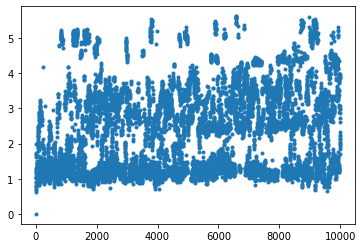

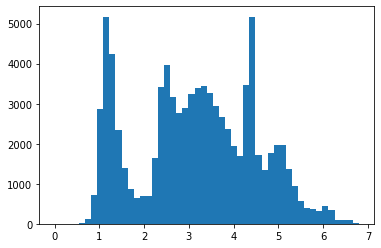

In [35]:
plt.plot(rmsd[:10000], '.')

plt.figure()
plt.hist(rmsd, bins=50)

### extract NOEs and uNOEs distances for hexamers

In [6]:
pdb=mda.Universe('pdb_structures/reference_testUCUCGU.pdb')
pdb.select_atoms("resname C and resid 2 and name H1'")

In [2]:
NOEs_names=np.array([["C",'2',"H1'", "C",'2',"H4'"],
       ['C','2','H6', "C",'2',"1H2'"],
       ['C','2','H6', "C",'2',"H4'"],
       ['C','4','H5', "U",'3',"1H2'"],
       ['C','4','H6', "C",'4',"H1'"],
       ['C','4','H6', "C",'4',"H3'"],
       ['C','4','H6', 'C','4','H5'],
       ['C','4','H6', "U",'3',"1H2'"],
       ['C','4','H6', "U",'3',"H3'"],
       ['C','4','H6', "U",'3',"H4'"],
       ["G",'5',"H1'", "G",'5',"H4'"],
       ["G",'5',"H3'", "G",'5',"2H5'"],
       ['G','5','H8', "C",'4',"H3'"],
       ['G','5','H8', "G",'5',"H1'"],
       ['G','5','H8', "G",'5',"1H2'"],
       ['G','5','H8', "G",'5',"H3'"],
       ['U','3','H6', "C",'2',"1H2'"],
       ['U','3','H6', "C",'2',"H3'"],
       ['U','3','H6', "C",'2',"H4'"],
       ['U','3','H6', "U",'3',"1H2'"],
       ['U','3','H6', "U",'3',"H3'"],
       ['U','6','H6', "G",'5',"1H2'"],
       ['U','6','H6', "G",'5',"H3'"],
       ['U','6','H6', "U",'6',"H1'"],
       ['U','6','H6', "U",'6',"1H2'"],
       ['U','6','H6', "U",'6',"H3'"]])
       
uNOEs_names=np.array([["U",'1',"1H2'", "C",'2',"1H5'"],
       ["U",'3',"1H2'", "C",'4',"1H5'"],
       ["G",'5',"H3'", "U",'6',"1H2'"],
       ["G",'5',"H3'", "U",'6',"H3'"]])

In [19]:
Sequence='UCUCGU'

univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
distances_noes=[]
distances_unoes=[]

counter=0
for j in range(1):
    inn_counter=0
    for frame in univ.trajectory:
        if not (inn_counter==0):
            distances_noes.append([])
            distances_unoes.append([])
            for i in range(len(NOEs_names)):
                atom1=univ.select_atoms('resname %s and resid %s and name %s' % (NOEs_names[i,0],NOEs_names[i,1],NOEs_names[i,2])).positions
                atom2=univ.select_atoms('resname %s and resid %s and name %s' % (NOEs_names[i,3],NOEs_names[i,4],NOEs_names[i,5])).positions
                distances_noes[counter].append(np.sqrt(np.sum(np.square(atom1-atom2),axis=1)))
            for i in range(len(uNOEs_names)):
                atom1=univ.select_atoms('resname %s and resid %s and name %s' % (uNOEs_names[i,0],uNOEs_names[i,1],uNOEs_names[i,2])).positions
                atom2=univ.select_atoms('resname %s and resid %s and name %s' % (uNOEs_names[i,3],uNOEs_names[i,4],uNOEs_names[i,5])).positions
                distances_unoes[counter].append(np.sqrt(np.sum(np.square(atom1-atom2),axis=1)))
            counter+=1
        inn_counter+=1
    if np.mod(counter,10000)==0: print(counter)


KeyboardInterrupt: 

### extract $\alpha,\,\zeta$ dihedral angles and save sin,cos (for hexamers)

needed to compute force field correcting terms

Which are the force field correcting terms? Let's use $\alpha$ and $\zeta$ angles

force field correcting terms: let's use $\sin\theta$ and $\cos\theta$ with $\theta=\alpha,\zeta$

alpha:   O3'(i-1)-P-O5'-C5'

zeta:    C3'-O3'-P(i+1)-O5'(i+1)

In [ ]:
for n_seq in range(len(Sequences)):
#n_seq=0
    ##ff_angles=[]
    b=np.zeros((0,n_angles))

    Sequence=Sequences[n_seq]

    for j in range(js[n_seq]):
        ff_angles=[]
        print(j+1)
        univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
        
        #univ=mda.Universe('trajectories/reference_test%s.pdb' % (Sequence),'trajectories/traj6.%s.%s_proc.xtc' % (Sequence, j+1))

        nframes[n_seq] += len(univ.trajectory)
        ##print('n. of frames in the trajectory: ',nframes)

        alphas=[]
        zetas=[]

        for i in [1,2,3]:
            alphas.append(univ.select_atoms("name O3' and resid %s" %i ,"name P and resid %s" %(i+1),"name O5' and resid %s" %(i+1),"name C5' and resid %s" %(i+1)))
            zetas.append(univ.select_atoms("name C3' and resid %s" %i, "name O3' and resid %s" %i, "name P and resid %s" %(i+1), "name O5' and resid %s" %(i+1)))
        
        start=time.time()
        print(alphas)
        dih=dihedral(alphas).run()
        print(dih)
        ff_angles.append(dih.results.angles)

        dih=dihedral(zetas).run()
        ff_angles.append(dih.results.angles)

        print('time: ',time.time()-start)
        time_iter[n_seq]+=time.time()-start
        print('length (n. of frames): ',len(univ.trajectory))
    
        a=np.array(ff_angles)*np.pi/180
        print(a.shape)
        b=np.append(b,np.concatenate((a[0,:,:],a[1,:,:]),axis=1),axis=0)
        print('b shape: ',np.shape(b))

In [5]:
Sequences=['UCAAUC','UCUCGU']
js=[6,5]

In [14]:
names=['alpha[0]','alpha[1]','alpha[2]','alpha[3]','alpha[4]','zeta[0]','zeta[1]','zeta[2]','zeta[3]','zeta[4]']
nframes=np.zeros(2)
time_iter=np.zeros(2)
n_angles=10

for n_seq in [1]:#range(len(Sequences)):
#n_seq=0
    ##ff_angles=[]
    b=np.zeros((0,n_angles))

    Sequence=Sequences[n_seq]

    for j in range(js[n_seq]):
        ff_angles=[]
        print(j+1)
        univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
        
        #univ=mda.Universe('trajectories/reference_test%s.pdb' % (Sequence),'trajectories/traj6.%s.%s_proc.xtc' % (Sequence, j+1))

        nframes[n_seq] += len(univ.trajectory)
        ##print('n. of frames in the trajectory: ',nframes)

        alphas=[]
        zetas=[]

        for i in [1,2,3,4,5]:
            alphas.append(univ.select_atoms("name O3' and resid %s" %i ,"name P and resid %s" %(i+1),"name O5' and resid %s" %(i+1),"name C5' and resid %s" %(i+1)))
            zetas.append(univ.select_atoms("name C3' and resid %s" %i, "name O3' and resid %s" %i, "name P and resid %s" %(i+1), "name O5' and resid %s" %(i+1)))
        
        start=time.time()
        print(alphas)
        dih=dihedral(alphas).run()
        print(dih)
        ff_angles.append(dih.results.angles)

        dih=dihedral(zetas).run()
        ff_angles.append(dih.results.angles)

        print('time: ',time.time()-start)
        time_iter[n_seq]+=time.time()-start
        print('length (n. of frames): ',len(univ.trajectory))
    
        a=np.array(ff_angles)*np.pi/180
        #a=np.delete(a,0,axis=0)
        print(a.shape)
        b=np.append(b,np.concatenate((a[0,:,:],a[1,:,:]),axis=1),axis=0)
        print('b shape: ',np.shape(b))
        #print(a)
        
        #b=np.concatenate((a[0,:,:],a[1,:,:]),axis=1)

    #b=np.concatenate([a[j] for j in range(js[n_seq])])
    #print('b shape: ',np.shape(b))

    #exec("np.savetxt('data/ff_angles"+Sequence+"',b,delimiter=',',comments='',header=','.join(names))")



1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  71.66744256019592
length (n. of frames):  90001
(2, 90001, 5)
b shape:  (90001, 10)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  160.91852974891663
length (n. of frames):  200001
(2, 200001, 5)
b shape:  (290002, 10)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  163.58709597587585
length (n. of frames):  200001
(2, 200001, 5)
b shape:  (490003, 10)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  162.30263900756836
length (n. of frames):  200001
(2, 200001, 5)
b shape:  (690004, 10)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  250.580632686615
length (n. of frames):  310001
(2, 310001, 5)
b shape:  (1000005, 10)


In [19]:
userdoc='DATA/'

Sequences=['UCAAUC','UCUCGU']
angles=pandas.read_csv(userdoc+'ff_angles%s' % Sequences[1],header=None,delimiter=' ')

In [20]:
i_sys=1

Sequence=Sequences[i_sys]

nframes=[]
for j in range(js[i_sys]):
    univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
    nframes.append(len(univ.trajectory))


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.l

In [24]:
angles=np.array(angles)
angles=np.delete(angles,v,axis=0)


In [23]:
b=np.ediff1d(np.array(angles)[:,0])
np.where(b==0)

(array([ 90000, 290001, 490002, 690003]),)

In [41]:
i_sys=1
angles=np.loadtxt('DATA/ff_angles%s' % Sequences[i_sys])


In [42]:
sincos=np.concatenate((np.sin(angles),np.cos(angles)),axis=1)
sincos.shape

(1000000, 20)

In [35]:
title=['sinalpha[%s]' % i for i in range(5)]+['sinzeta[%s]' %i for i in range(5)]+['cosalpha[%s]' %i for i in range(5)]+['coszeta[%s]' %i for i in range(5)]
title

['sinalpha[0]',
 'sinalpha[1]',
 'sinalpha[2]',
 'sinalpha[3]',
 'sinalpha[4]',
 'sinzeta[0]',
 'sinzeta[1]',
 'sinzeta[2]',
 'sinzeta[3]',
 'sinzeta[4]',
 'cosalpha[0]',
 'cosalpha[1]',
 'cosalpha[2]',
 'cosalpha[3]',
 'cosalpha[4]',
 'coszeta[0]',
 'coszeta[1]',
 'coszeta[2]',
 'coszeta[3]',
 'coszeta[4]']

In [43]:
sincos=pandas.DataFrame(sincos,columns=title)
sincos

sinalpha[0]  sinalpha[1]  sinalpha[2]  sinalpha[3]  sinalpha[4]  \
0         -0.955444    -0.879825    -0.907779    -0.938312    -0.866615   
1         -0.928136    -0.939571    -0.889562    -0.997999    -0.655135   
2         -0.931495    -0.962404    -0.910299    -0.965885    -0.932303   
3         -0.914802    -0.896066    -0.883461    -0.791919    -0.906605   
4         -0.938332    -0.898816    -0.870736    -0.973526    -0.954623   
...             ...          ...          ...          ...          ...   
999995    -0.923632     0.005315     0.615968     0.827793    -0.908146   
999996    -0.993054     0.777683     0.511887     0.710075    -0.934006   
999997    -0.975679     0.427663     0.210655     0.785079    -0.897924   
999998    -0.992560     0.856462     0.997155     0.933592    -0.973984   
999999    -0.985070     0.996305     0.889656     0.944327    -0.930128   

        sinzeta[0]  sinzeta[1]  sinzeta[2]  sinzeta[3]  sinzeta[4]  \
0        -0.995601   -0.973790   -0.947358   -0.981489   -0.998149   
1        -0.957052   -0.996427   -0.999089   -0.928795   -0.984077   
2        -0.999078   -0.991019   -0.941003   -0.950609   -0.997766   
3        -0.905271   -0.995302   -0.999535   -0.980981   -0.998384   
4        -0.990405   -0.939760   -0.996278   -0.995346   -0.982973   
...            ...         ...         ...         ...         ...   
999995   -0.997217    0.918423   -0.679862    0.133078   -0.988009   
999996   -0.983206    0.842771   -0.787928    0.089728   -0.983550   
999997   -0.960933    0.919284   -0.548340    0.042862   -0.980590   
999998   -0.997064    0.906409   -0.900005    0.193717   -0.993816   
999999   -0.990787    0.997805   -0.948155    0.856436   -0.995876   

        cosalpha[0]  cosalpha[1]  cosalpha[2]  cosalpha[3]  cosalpha[4]  \
0          0.295172     0.475297     0.419449     0.345791     0.498977   
1          0.372241     0.342354     0.456814     0.063234     0.755512   
2          0.363755     0.271623     0.413951     0.258970     0.361678   
3          0.403902     0.443921     0.468504     0.610626     0.421981   
4          0.345735     0.438327     0.491752     0.228574     0.297815   
...             ...          ...          ...          ...          ...   
999995     0.383281    -0.999986    -0.787771     0.561033     0.418653   
999996     0.117660    -0.628656    -0.859053     0.704126     0.357256   
999997     0.219203    -0.903938    -0.977560     0.619396     0.440150   
999998     0.121761    -0.516210    -0.075382     0.358338     0.226618   
999999     0.172154    -0.085888    -0.456632     0.329009     0.367236   

        coszeta[0]  coszeta[1]  coszeta[2]  coszeta[3]  coszeta[4]  
0        -0.093692    0.227448    0.320177    0.191516   -0.060812  
1        -0.289917    0.084461    0.042668    0.370593    0.177743  
2        -0.042934    0.133719    0.338397    0.310390    0.066807  
3         0.424835    0.096817    0.030494    0.194103    0.056827  
4         0.138198    0.341835   -0.086198    0.096365   -0.183753  
...            ...         ...         ...         ...         ...  
999995    0.074551    0.395600    0.733340   -0.991106    0.154394  
999996    0.182500    0.538273    0.615767   -0.995966    0.180636  
999997    0.276782    0.393594    0.836255   -0.999081    0.196071  
999998    0.076569    0.422400    0.435880   -0.981057    0.111040  
999999    0.135426    0.066226    0.317808   -0.516254    0.090728  

[1000000 rows x 20 columns]

In [40]:
sincos.to_csv('DATA/Thorben/sincos%s' % Sequences[i_sys])

plot the angles for a particular quadruplex

In [42]:
#n_seq=0
for n_seq in range(5):
    Sequence=Sequences[n_seq]
    print('the quadruplex is: ',Sequence)
    a=pandas.read_csv('data/ff_angles%s' % Sequence)#,head=0)
    print(a.shape)

the quadruplex is:  AAAA
(1017000, 7)
the quadruplex is:  CAAU
(1004000, 7)
the quadruplex is:  GACC
(1014000, 7)
the quadruplex is:  CCCC
(1008000, 7)
the quadruplex is:  UUUU
(1004000, 7)


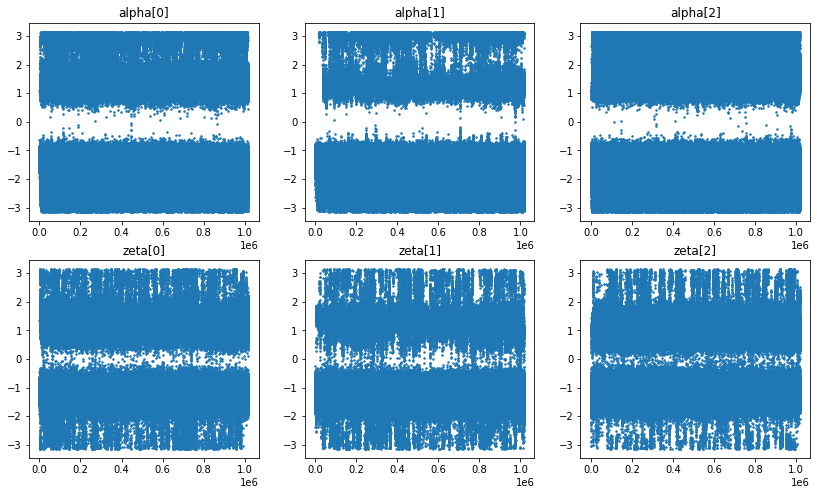

In [7]:
plt.figure(figsize=(14,8))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(a[a.columns[i]],'.',markersize=3)
    plt.title(a.columns[i])


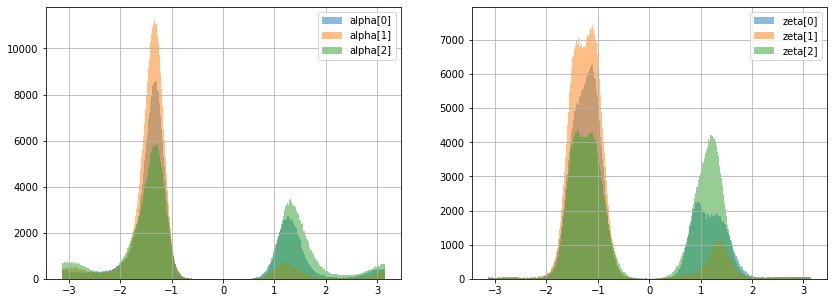

In [8]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
for i in range(3):
    plt.hist(a[a.columns[i]],bins=1000,alpha=0.5,label=a.columns[i])

plt.grid()
plt.legend()

plt.subplot(1,2,2)
for i in [3,4,5]:
    plt.hist(a[a.columns[i]],bins=1000,alpha=0.5,label=a.columns[i])

plt.grid()
plt.legend()

compute $\sin$, $\cos$ (force field correcting terms)

In [40]:

names=['sinalpha[0]','sinalpha[1]','sinalpha[2]','sinzeta[0]','sinzeta[1]','sinzeta[2]','cosalpha[0]','cosalpha[1]','cosalpha[2]','coszeta[0]','coszeta[1]','coszeta[2]']

for n_seq in range(5):
    Sequence=Sequences[n_seq]
    print('the quadruplex is: ',Sequence)
    a=pandas.read_csv('data/ff_angles%s' % Sequence)#,head=0)
    print(a.shape)

    b=np.concatenate((np.sin(a),np.cos(a)),axis=1)
    np.savetxt('FFF/angles/sincos%s' % Sequence,b,delimiter=',',comments='',header=','.join(names))



the quadruplex is:  AAAA
(1017000, 6)
the quadruplex is:  CAAU
(1004000, 6)
the quadruplex is:  CCCC
(1008000, 6)
the quadruplex is:  GACC
(1014000, 6)
the quadruplex is:  UUUU
(1004000, 6)


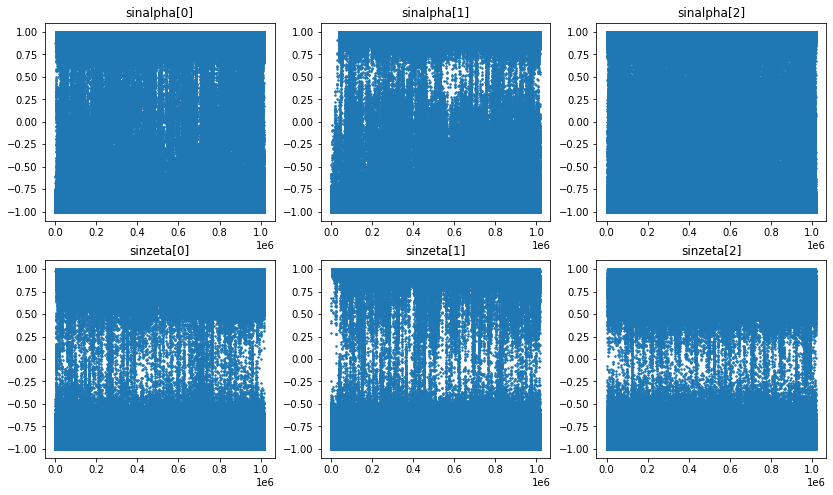

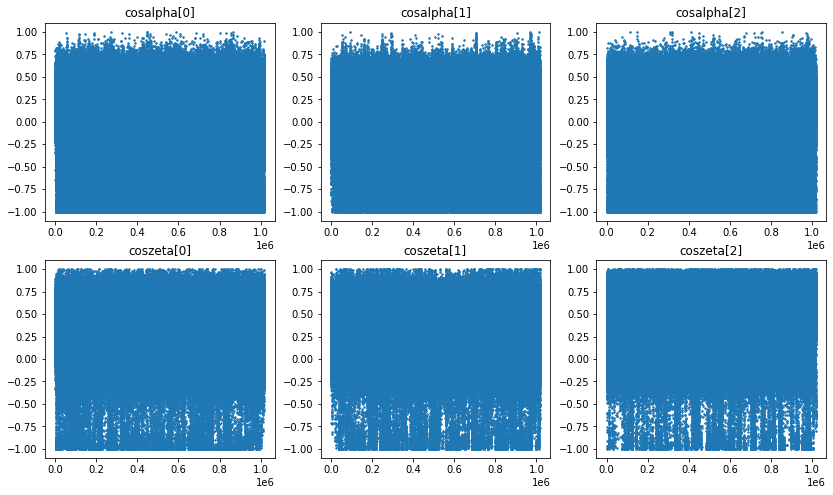

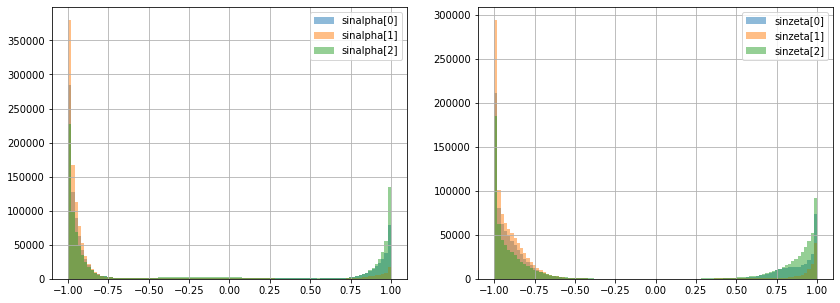

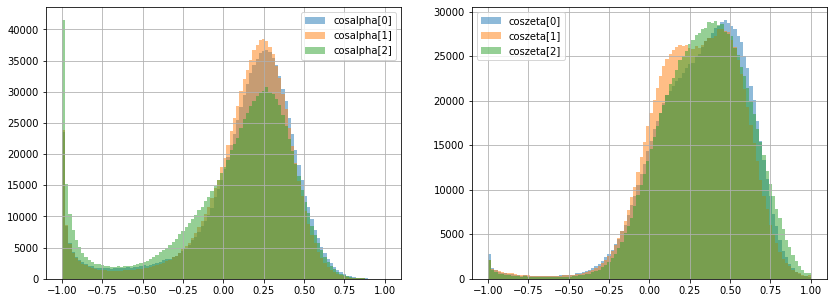

In [36]:
a=pandas.read_csv('FFF/angles/sincosAAAA',header=0)

plt.figure(figsize=(14,8))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(a[a.columns[i]],'.',markersize=3)
    plt.title(a.columns[i])

plt.figure(figsize=(14,8))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(a[a.columns[i+6]],'.',markersize=3)
    plt.title(a.columns[i+6])

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
for i in range(3):
    plt.hist(a[a.columns[i]],bins=100,alpha=0.5,label=a.columns[i])

plt.grid()
plt.legend()

plt.subplot(1,2,2)
for i in [3,4,5]:
    plt.hist(a[a.columns[i]],bins=100,alpha=0.5,label=a.columns[i])

plt.grid()
plt.legend()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
for i in [6,7,8]:
    plt.hist(a[a.columns[i]],bins=100,alpha=0.5,label=a.columns[i])

plt.grid()
plt.legend()

plt.subplot(1,2,2)
for i in [9,10,11]:
    plt.hist(a[a.columns[i]],bins=100,alpha=0.5,label=a.columns[i])

plt.grid()
plt.legend()

### extract observables for tetramers

- 3J couplings
- NOEs
- uNOEs

NMR data:
- S. Bottaro, G. Bussi, S. D. Kennedy, D. H. Turner, K. Lindorff-Larsen, Science Adv. 2018, 4, eaar8521.
- D. E. Condon, S. D. Kennedy, B. C. Mort, R. Kierzek, I. Yildirim, D. H. Turner, J. Chem. Theory Comput. 2015, 11, 2729–2742.
- J. Zhao, S. D. Kennedy, K. D. Berger, D. H. Turner, J. Chem. Theory Comput. 2020, 16, 1968–1984.

In [67]:
NOEs=np.load('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/noe6m_%s.npy' % (Sequence, Sequence, Sequence))
NOEs300=np.load('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/noe6m_%s_300K.npy' % (Sequence, Sequence, Sequence))



### extract $\chi$ dihedral angles


chi (purines): O4'-C1'-N9-C4

chi (pyrimidines): O4'-C1'-N1-C2

In [19]:
for n_seq in range(len(Sequences)):

    Sequence=Sequences[n_seq]
    n_angles=len(Sequence)
    b=np.zeros((0,n_angles))

    for j in range(js[n_seq]):
        print(j+1)
        univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))

        chis=[]

        for i in range(n_angles):
            Sequence[i]
            if Sequence[i]=='G' or Sequence[i]=='A': chis.append(univ.select_atoms("name O4' and resid %s" %(i+1),"name C1' and resid %s" %(i+1),"name N9 and resid %s" %(i+1),"name C4 and resid %s" %(i+1)))
            elif Sequence[i]=='C' or Sequence[i]=='U': chis.append(univ.select_atoms("name O4' and resid %s" %(i+1),"name C1' and resid %s" %(i+1),"name N1 and resid %s" %(i+1),"name C2 and resid %s" %(i+1)))

        start=time.time()
        dih=dihedral(chis).run()
        ff_angles=dih.results.angles

        print('time: ',time.time()-start)
        print('length (n. of frames): ',len(univ.trajectory))
    
        ff_angles=np.array(ff_angles)*np.pi/180
        print(ff_angles.shape)
        b=np.append(b,ff_angles[1:,:],axis=0) # skip the first frame of each subtrajectory, to be consistent
        print('b shape: ',np.shape(b))

    np.save('DATA/ff_angles/chi_angles%s' % Sequence,b)#,delimiter=',',comments='',header=','.join(names))")


1
time:  38.54024147987366
length (n. of frames):  85001
(85001, 4)
b shape:  (85000, 4)
2
time:  86.45333528518677
length (n. of frames):  200001
(200001, 4)
b shape:  (285000, 4)
3
time:  103.62005710601807
length (n. of frames):  250001
(250001, 4)
b shape:  (535000, 4)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  52.22946906089783
length (n. of frames):  126001
(126001, 4)
b shape:  (661000, 4)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  147.3596169948578
length (n. of frames):  356001
(356001, 4)
b shape:  (1017000, 4)
1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/.traj6.CAAU.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  37.299156665802
length (n. of frames):  90001
(90001, 4)
b shape:  (90000, 4)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/.traj6.CAAU.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  67.79464817047119
length (n. of frames):  166001
(166001, 4)
b shape:  (256000, 4)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/.traj6.CAAU.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  81.0673451423645
length (n. of frames):  200001
(200001, 4)
b shape:  (456000, 4)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/.traj6.CAAU.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  48.11443614959717
length (n. of frames):  118001
(118001, 4)
b shape:  (574000, 4)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/.traj6.CAAU.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  42.43863224983215
length (n. of frames):  100001
(100001, 4)
b shape:  (674000, 4)
6


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CAAU_TREMD/Production/CAAU/.traj6.CAAU.6_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  142.4165482521057
length (n. of frames):  330001
(330001, 4)
b shape:  (1004000, 4)
1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CCCC_TREMD/Production/CCCC/.traj6.CCCC.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  29.909231185913086
length (n. of frames):  72001
(72001, 4)
b shape:  (72000, 4)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CCCC_TREMD/Production/CCCC/.traj6.CCCC.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  79.60707402229309
length (n. of frames):  188001
(188001, 4)
b shape:  (260000, 4)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CCCC_TREMD/Production/CCCC/.traj6.CCCC.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  85.52928376197815
length (n. of frames):  200001
(200001, 4)
b shape:  (460000, 4)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CCCC_TREMD/Production/CCCC/.traj6.CCCC.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  45.45260047912598
length (n. of frames):  110001
(110001, 4)
b shape:  (570000, 4)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CCCC_TREMD/Production/CCCC/.traj6.CCCC.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  40.82757234573364
length (n. of frames):  98001
(98001, 4)
b shape:  (668000, 4)
6


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/CCCC_TREMD/Production/CCCC/.traj6.CCCC.6_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  142.8879632949829
length (n. of frames):  340001
(340001, 4)
b shape:  (1008000, 4)
1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/GACC_TREMD/Production/GACC/.traj6.GACC.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  29.473079681396484
length (n. of frames):  72001
(72001, 4)
b shape:  (72000, 4)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/GACC_TREMD/Production/GACC/.traj6.GACC.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  76.37792611122131
length (n. of frames):  188001
(188001, 4)
b shape:  (260000, 4)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/GACC_TREMD/Production/GACC/.traj6.GACC.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  85.26691341400146
length (n. of frames):  196001
(196001, 4)
b shape:  (456000, 4)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/GACC_TREMD/Production/GACC/.traj6.GACC.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  48.98762512207031
length (n. of frames):  110001
(110001, 4)
b shape:  (566000, 4)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/GACC_TREMD/Production/GACC/.traj6.GACC.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  41.37485647201538
length (n. of frames):  100001
(100001, 4)
b shape:  (666000, 4)
6


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/GACC_TREMD/Production/GACC/.traj6.GACC.6_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  41.84212875366211
length (n. of frames):  100001
(100001, 4)
b shape:  (766000, 4)
7


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/GACC_TREMD/Production/GACC/.traj6.GACC.7_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  103.28441858291626
length (n. of frames):  248001
(248001, 4)
b shape:  (1014000, 4)
1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UUUU_TREMD/Production/UUUU/.traj6.UUUU.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  34.83641242980957
length (n. of frames):  84001
(84001, 4)
b shape:  (84000, 4)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UUUU_TREMD/Production/UUUU/.traj6.UUUU.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  66.12225151062012
length (n. of frames):  160001
(160001, 4)
b shape:  (244000, 4)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UUUU_TREMD/Production/UUUU/.traj6.UUUU.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  82.45131087303162
length (n. of frames):  200001
(200001, 4)
b shape:  (444000, 4)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UUUU_TREMD/Production/UUUU/.traj6.UUUU.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  48.35188674926758
length (n. of frames):  118001
(118001, 4)
b shape:  (562000, 4)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UUUU_TREMD/Production/UUUU/.traj6.UUUU.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  41.12861943244934
length (n. of frames):  100001
(100001, 4)
b shape:  (662000, 4)
6


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UUUU_TREMD/Production/UUUU/.traj6.UUUU.6_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  40.49657106399536
length (n. of frames):  98001
(98001, 4)
b shape:  (760000, 4)
7


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UUUU_TREMD/Production/UUUU/.traj6.UUUU.7_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  101.19380950927734
length (n. of frames):  244001
(244001, 4)
b shape:  (1004000, 4)
1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCAAUC_TREMD/Production/UCAAUC/.traj6.UCAAUC.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  32.35049057006836
length (n. of frames):  72001
(72001, 6)
b shape:  (72000, 6)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCAAUC_TREMD/Production/UCAAUC/.traj6.UCAAUC.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  77.1051299571991
length (n. of frames):  172001
(172001, 6)
b shape:  (244000, 6)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCAAUC_TREMD/Production/UCAAUC/.traj6.UCAAUC.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  84.74283146858215
length (n. of frames):  200001
(200001, 6)
b shape:  (444000, 6)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCAAUC_TREMD/Production/UCAAUC/.traj6.UCAAUC.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  47.295660734176636
length (n. of frames):  112001
(112001, 6)
b shape:  (556000, 6)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCAAUC_TREMD/Production/UCAAUC/.traj6.UCAAUC.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  42.19700360298157
length (n. of frames):  100001
(100001, 6)
b shape:  (656000, 6)
6


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCAAUC_TREMD/Production/UCAAUC/.traj6.UCAAUC.6_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  151.09269857406616
length (n. of frames):  356001
(356001, 6)
b shape:  (1012000, 6)
1


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  39.64986848831177
length (n. of frames):  90001
(90001, 6)
b shape:  (90000, 6)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  84.16366219520569
length (n. of frames):  200001
(200001, 6)
b shape:  (290000, 6)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  86.93338942527771
length (n. of frames):  200001
(200001, 6)
b shape:  (490000, 6)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  86.53723192214966
length (n. of frames):  200001
(200001, 6)
b shape:  (690000, 6)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/UCUCGU_TREMD/Production/UCUCGU/.traj6.UCUCGU.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  133.7796220779419
length (n. of frames):  310001
(310001, 6)
b shape:  (1000000, 6)


## Read data given by Thorben

In [9]:
import numpy as np
import gc

curr_dir='/net/sbp/srnas2/tfrahlki/ForIvan'

Sequences=['AAAA','CAAU','GACC','CCCC','UUUU']#,'UCAAUC','UCUCGU']
#Sequences=['CCCC']

def func_grad():
    return 0

In [16]:
#load experimental data
M=0
#loading experiments results is loading an error from 1.5 to 2.0 on all jcoupling experimental values
#it is also possible to choose an assumed experimental error:
#sigma_exp=0.3 #0.1 1.5
def read_exp(path, columns):
    matrix=[]
    for col in range(columns):
        matrix.append([])
    #print(matrix)
    with open(path, 'r') as f:
        for line in f:
            if '#' not in line:
                nums=line.split()
                #print(nums)
                for col in range(columns):
                    matrix[col].append(nums[col])
    return np.array(matrix)

func_grad.backbone1_coupl_exp_list=[]
func_grad.backbone2_coupl_exp_list=[]
func_grad.sugar_coupl_exp_list=[]

func_grad.backbone1_names=[]
func_grad.backbone2_names=[]
func_grad.sugar_names=[]

func_grad.noe_exp_list=[]
func_grad.unoe_exp_list=[]

func_grad.noe_names=[]
func_grad.unoe_names=[]

for s,Sequence in enumerate(Sequences):
    print(Sequence)
    j3_data=read_exp(curr_dir+'/%s/j3_%s.exp.dat' %(Sequence,Sequence),3 )
    

    backbone1_exp=[]
    backbone2_exp=[]
    sugar_exp=[]
    backbone1_names=[]
    backbone2_names=[]
    sugar_names=[]
    for e,elem in enumerate(j3_data.T):
        #print(elem[0])
        if '1H5H4' in elem[0] or '2H5H4'in elem[0]:
            backbone1_exp.append([float(elem[1]),float(elem[2])])
            backbone1_names.append([elem[0]])
            #backbone1_exp.append([float(elem[1]),float(sigma_exp)])
        if '1H5P' in elem[0] or '2H5P' in elem[0] or 'H3P' in elem[0]:
            backbone2_exp.append([float(elem[1]),float(elem[2])])
            backbone2_names.append([elem[0]])
            #backbone2_exp.append([float(elem[1]),float(sigma_exp)])
        if 'H1H2'  in elem[0] or 'H2H3' in elem[0] or 'H3H4' in elem[0]:
            sugar_exp.append([float(elem[1]),float(elem[2])])
            sugar_names.append([elem[0]])
            #sugar_exp.append([float(elem[1]),float(sigma_exp)])

    backbone1_exp=np.array(backbone1_exp)
    if 'CAAU' in Sequence:
        backbone2_exp=np.array(backbone2_exp[:-1])
    else:
        backbone2_exp=np.array(backbone2_exp)
    sugar_exp=np.array(sugar_exp)

    print(backbone1_exp.shape)
    print(backbone2_exp.shape)
    print(sugar_exp.shape)
    func_grad.backbone1_coupl_exp_list.append(backbone1_exp)
    func_grad.backbone2_coupl_exp_list.append(backbone2_exp)
    func_grad.sugar_coupl_exp_list.append(sugar_exp)
    func_grad.backbone1_names.append(backbone1_names)
    func_grad.backbone2_names.append(backbone2_names)
    func_grad.sugar_names.append(sugar_names)
    
    #NOE and uNOE
    if Sequence!='UCAAUC':
        if Sequence=='CAAU':
            unoe_data=read_exp(curr_dir+'/%s/formatted_unoe_%s.exp.dat' %(Sequence,Sequence),4 )
        else:
            unoe_data=read_exp(curr_dir+'/%s/unoe_%s.exp.dat' %(Sequence,Sequence),4 )
        noe_data=read_exp(curr_dir+'/%s/noe_%s.exp.dat' %(Sequence,Sequence),5 )

        noe_exp=noe_data.T[:,2:]
        unoe_exp=unoe_data.T[:,2:]
        noe_exp=noe_exp[:,:].astype(float)

        noe_names=noe_data.T[:,:2]
        unoe_names=unoe_data.T[:,:2]
        
    else:
        noe_data=read_exp(curr_dir+'/%s/formatted_noe_%s.exp.dat' %(Sequence,Sequence),5 )
        unoe_data=read_exp(curr_dir+'/%s/formatted_unoe_%s.exp.dat' %(Sequence,Sequence),4 )
        #special noe treatment, because the experimental data required summing some signals
        lines_to_ignore=[2, 4, 6, 8, 10, 12, 14, 16, 19, 26, 29, 32, 39]

        for index in sorted(lines_to_ignore, reverse=True):
            noe_data=np.delete(noe_data,index,1)
        #turn noe data into the correct format
        noe_exp=noe_data.T[:,2:]
        unoe_exp=unoe_data.T[:,2:]
        noe_exp=noe_exp[:,:].astype(float)

        noe_names=noe_data.T[:,:2]
        unoe_names=unoe_data.T[:,:2]
        
    temp=[]
    for i in range(noe_exp.shape[0]):
        temp.append([noe_exp[i,1],np.min([noe_exp[i,2]-noe_exp[i,1],noe_exp[i,1]-noe_exp[i,0]])])
    noe_exp=np.array(temp)
    unoe_exp=unoe_exp[:,:].astype(float)

    print(noe_exp.shape)
    print(unoe_exp.shape)

    func_grad.noe_exp_list.append(noe_exp)
    func_grad.noe_names.append(noe_names)

    #change to NOE signal
    noe_exp=np.copy(func_grad.noe_exp_list[s])
    
    exp_noe=noe_exp[:,0]**(-6)
    a=np.abs((noe_exp[:,0]-noe_exp[:,1])**(-6)-noe_exp[:,0]**(-6))
    b=np.abs((noe_exp[:,0]+noe_exp[:,1])**(-6)-noe_exp[:,0]**(-6))
    exp_noe_std=(a+b)/2
    
    func_grad.noe_exp_list[s][:,0]=exp_noe
    func_grad.noe_exp_list[s][:,1]=exp_noe_std
    
    temp=[]
    for e,elem in enumerate(unoe_exp):
        temp.append([(unoe_exp[e][0],+np.inf),unoe_exp[e][1]])

    unoe_exp=np.array(temp,dtype='object')
    func_grad.unoe_exp_list.append(unoe_exp)
    func_grad.unoe_names.append(unoe_names)
    
    #change to NOE signal
    unoe_exp_temp=np.copy(unoe_exp)
    
    exp_unoe=[]
    exp_unoe_std=[]
    for e,elem in enumerate(unoe_exp[:,0]):
        func_grad.unoe_exp_list[s][e,0]=(0,unoe_exp_temp[e,0][0]**(-6))
        func_grad.unoe_exp_list[s][e,1]=np.abs((unoe_exp_temp[e,0][0]-unoe_exp_temp[e,1])**(-6)-unoe_exp_temp[e,0][0]**(-6))
    
    
    M+=backbone1_exp.shape[0]+backbone2_exp.shape[0]+sugar_exp.shape[0]+noe_exp.shape[0]+unoe_exp.shape[0]
print('number of experiments: ',M)

AAAA
(8, 2)
(9, 2)
(11, 2)
(36, 2)
(244, 2)
number of experiments:  308


In [17]:
M=0

#gamma
#beta
#sugar
Karplus_parameters=np.array([[9.7,-1.8,0],[15.3,-6.1,1.6],[9.67,-2.03,0]]).flatten()

def transform_Karplus(par):
    new_par=[]
    for elem in par:
        A=elem[0]
        B=elem[1]
        C=elem[2]

        A_T=A/2
        B_T=B
        C_T=np.sqrt(2)*(C+A/2)
        new_par.append([A_T,B_T,C_T])
    return np.array(new_par).flatten(),par.flatten()

#Karplus_parameters_transformed,Karplus_parameters=transform_Karplus(Karplus_parameters)

func_grad.gamma_jcoupl_components_list=[]
func_grad.beta_jcoupl_components_list=[]
func_grad.sugar_jcoupl_components_list=[]
func_grad.noe_list=[]
func_grad.unoe_list=[]

func_grad.backbone1_coupl_list=[]
func_grad.backbone2_coupl_list=[]
func_grad.sugar_coupl_list=[]


for s,Sequence in enumerate(Sequences):
    print(Sequence)
    gamma_angle=np.load(curr_dir+'/%s/MaxEnt_gamma_angle_%s_300K.npy' %(Sequence,Sequence))
    print(np.shape(gamma_angle))
    beta_angle=np.load(curr_dir+'/%s/MaxEnt_beta_angle_%s_300K.npy' %(Sequence,Sequence))
    sugar_angle=np.load(curr_dir+'/%s/MaxEnt_sugar_angle_%s_300K.npy' %(Sequence,Sequence))
    #print(gamma_angle.shape)

    ####### ALL?
    #gamma_angle=gamma_angle[:int(1e6)]
    #beta_angle=beta_angle[:int(1e6)]
    #sugar_angle=sugar_angle[:int(1e6)]

    gamma_jcoupl_components=np.array([np.cos(gamma_angle)**2,np.cos(gamma_angle),np.ones(gamma_angle.shape)])
    beta_jcoupl_components=np.array([np.cos(beta_angle)**2,np.cos(beta_angle),np.ones(beta_angle.shape)])
    sugar_jcoupl_components=np.array([np.cos(sugar_angle)**2,np.cos(sugar_angle),np.ones(sugar_angle.shape)])
    
    backbone1_coupl=np.einsum('i,ijk->jk',Karplus_parameters[0:3],gamma_jcoupl_components)
    backbone2_coupl=np.einsum('i,ijk->jk',Karplus_parameters[3:6],beta_jcoupl_components)
    sugar_coupl=np.einsum('i,ijk->jk',Karplus_parameters[6:9],sugar_jcoupl_components)
    
    #gamma_jcoupl_components=np.array([np.cos(2*gamma_angle),np.cos(gamma_angle),np.ones(gamma_angle.shape)/np.sqrt(2)])
    #beta_jcoupl_components=np.array([np.cos(2*beta_angle),np.cos(beta_angle),np.ones(beta_angle.shape)/np.sqrt(2)])
    #sugar_jcoupl_components=np.array([np.cos(2*sugar_angle),np.cos(sugar_angle),np.ones(sugar_angle.shape)/np.sqrt(2)])
    
    #backbone1_coupl=np.einsum('i,ijk->jk',Karplus_parameters_transformed[0:3],gamma_jcoupl_components)
    #backbone2_coupl=np.einsum('i,ijk->jk',Karplus_parameters_transformed[3:6],beta_jcoupl_components)
    #sugar_coupl=np.einsum('i,ijk->jk',Karplus_parameters_transformed[6:9],sugar_jcoupl_components)

    
    #NOEs
    noe = np.load(curr_dir+"/%s/noe6m_%s_300K.npy" %(Sequence,Sequence))
    unoe = np.load(curr_dir+"/%s/unoe6m_%s_300K.npy" %(Sequence,Sequence))

    noe=noe.reshape(-1,noe.shape[1])
    unoe=unoe.reshape(-1,unoe.shape[1])

    noe=np.delete(noe,1,0)
    unoe=np.delete(unoe,1,0)

    #### ALL?
    #noe=noe[:int(1e6),:]
    #unoe=unoe[:int(1e6),:]
    
    
    skip=10000
    prune=False
    if prune==True:
        gamma_angle=gamma_angle[::skip,:]
        beta_angle=beta_angle[::skip,:]
        sugar_angle=sugar_angle[::skip,:]
        gamma_jcoupl_components=gamma_jcoupl_components[:,::skip,:]
        beta_jcoupl_components=beta_jcoupl_components[:,::skip,:]
        sugar_jcoupl_components=sugar_jcoupl_components[:,::skip,:]
        backbone1_coupl=backbone1_coupl[::skip,:]
        backbone2_coupl=backbone2_coupl[::skip,:]
        sugar_coupl=sugar_coupl[::skip,:]
        noe=noe[::skip,:]
        unoe=unoe[::skip,:]
        
        gc.collect()
        
    print(backbone1_coupl.shape)
    print(backbone2_coupl.shape)
    print(sugar_coupl.shape)
    
    print(noe.shape)
    print(unoe.shape)

    

    
    #func_grad.gamma_jcoupl_components_list.append(gamma_jcoupl_components)
    #func_grad.beta_jcoupl_components_list.append(beta_jcoupl_components)
    #func_grad.sugar_jcoupl_components_list.append(sugar_jcoupl_components)
    func_grad.backbone1_coupl_list.append(backbone1_coupl)
    func_grad.backbone2_coupl_list.append(backbone2_coupl)
    func_grad.sugar_coupl_list.append(sugar_coupl)
    func_grad.noe_list.append(noe)
    func_grad.unoe_list.append(unoe)
    
    M+=backbone1_coupl.shape[1]+backbone2_coupl.shape[1]+sugar_coupl.shape[1]+noe.shape[1]+unoe.shape[1]
print('number of back-calculated observables: ',M)   

AAAA
(1017000, 8)
(1017000, 8)
(1017000, 9)
(1017000, 11)
(1017000, 36)
(1017000, 244)
number of back-calculated observables:  308


func_grad.

backbone1_coupl_exp_list, backbone2_coupl_exp_list, sugar_coupl_exp_list, noe_exp_list, unoe_exp_list

gamma_jcoupl_components_list, beta_jcoupl_components_list, sugar_jcoupl_components_list, backbone1_coupl_list, backbone2_coupl_list, sugar_coupl_list, noe_list, unoe_list


NameError: name 'func_grad' is not defined

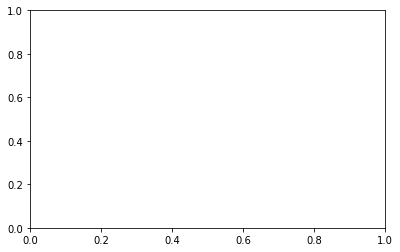

In [4]:
Strings=['backbone1_coupl','backbone2_coupl','sugar_coupl','noe']

reldiff=[]
reldiff2=[] # chi2 with all the error (both experiment and MD simulation)
chi2=[]

i=0
for s in Strings:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    exec("av=np.mean(func_grad."+s+"_list[n_seq],axis=0)")
    exec("std=np.std(func_grad."+s+"_list[n_seq],axis=0)/np.sqrt(np.shape(func_grad."+s+"_list[n_seq][:,0])[0])")
    exec("plt.errorbar(np.arange(np.shape(func_grad."+s+"_list[n_seq][0,:])[0]),av,std,marker='s',linestyle='',label='MD sim.')")
    exec("plt.errorbar(np.arange(np.shape(func_grad."+s+"_list[n_seq][0,:])[0]),func_grad."+s+"_exp_list[n_seq][:,0],func_grad."+s+"_exp_list[n_seq][:,1],marker='s',linestyle='',label='exp.')")
    plt.title(s)
    plt.legend()
    plt.grid()

    exec("reldiff.append((av-func_grad."+s+"_exp_list[n_seq][:,0])/func_grad."+s+"_exp_list[n_seq][:,1])")
    #exec("reldiff2.append((av-func_grad."+s+"_exp_list[n_seq][:,0])/np.sqrt(func_grad."+s+"_exp_list[n_seq][:,1]**2+std**2))")
    plt.subplot(1,2,2)
    plt.bar(np.arange(len(reldiff[i])),reldiff[i])#,'s')
    plt.title('relative difference')
    plt.grid()
    plt.show()

    chi2.append(np.sum(np.array(reldiff[i])**2))
    print('reduced chi2: ',chi2[i]/len(reldiff[i]))

    i+=1

length=len([item for sublist in reldiff for item in sublist])
print('\nall: reduced chi2 ',np.sum(chi2)/length)
print('total n. of observables: ',length)

In [1]:
means=np.mean(func_grad.unoe_list[n_seq],axis=0)
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(means,'.',label='average')

v=func_grad.unoe_exp_list[n_seq][:,0]
up_bound=[item for sublist in v for item in sublist]
up_bound=[value for value in up_bound if value != 0]

plt.plot(up_bound,'--',label='upper bound')
plt.plot(up_bound+func_grad.unoe_exp_list[n_seq][:,1],'--',label='up. bound+error')

plt.legend(loc='best')#upper left')
plt.title('unobserved NOEs')
plt.grid()

plt.subplot(1,2,2)

dif=means-up_bound
err=np.array(func_grad.unoe_exp_list[n_seq][:,1])#.astype(float)
np.shape(dif[dif<0])

zeta=np.zeros(len(means))
zeta[dif<0]=0
zeta[dif>0]=(dif[dif>0]/err[dif>0])**2

plt.plot(zeta,'.')
plt.yscale('log')
plt.title('chi2 (extended)')
plt.grid()

print('reduced chi2 (extended): ',np.mean(zeta))


NameError: name 'np' is not defined

## Compare Thorben data with observables from .xtc files


try to compute distances between hydrogen atoms from trajectories data and compare them with values in tables

In [93]:
from MDAnalysis.analysis import distances

In [120]:
univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
atom1=univ.select_atoms("name H1' and resid 1")
atom2=univ.select_atoms("name H8 and resid 1")
dist=[]

for frame in univ.trajectory:
    dist.append(distances.distance_array(atom1.positions,atom2.positions))


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


KeyboardInterrupt: 

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


<Universe with 131 atoms>
200001
(1017001, 36)
[0.00037844 0.00040053 0.00048918 ... 0.00033388 0.00069702 0.00059051]
A1H1'-A1H8
[[31.2      38.63     18.670002]]
[0.00029605 0.00138662 0.00052418 ... 0.00657972 0.00422937 0.00309479]
<AtomGroup [<Atom 10: H1' of type H of resname A, resid 1 and segid SYSTEM and altLoc >]>


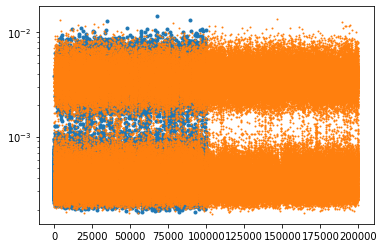

In [155]:
Sequence='AAAA'
j=1

univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
print(univ)
print(len(univ.trajectory))

print(noe.shape)
print(noe[:,0])

print("A1H1'-A1H8")

distance=[]
#distance.append(univ.select_atoms("name H1' and resid 1","name H8 and resid 1"))

atom1=univ.select_atoms("name H1' and resid 1")#,"name H8 and resid 1")
atom2=univ.select_atoms("name H8 and resid 1")
print(atom1.positions)

dist=[]



for frame in univ.trajectory:
    dist.append(distances.distance_array(atom1.positions,atom2.positions))

dist=np.array(dist)[:,0,0]
print(1/dist**6)
print(atom1)#.positions)

plt.plot(noe[:100000,0],'.')
plt.plot(1/dist**6,'.',markersize=2)
plt.yscale('log')

/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


85001
A1H1'-A1H8
[0.00037844 0.00040053 0.00048918 ... 0.00035642 0.00027872 0.00029605]


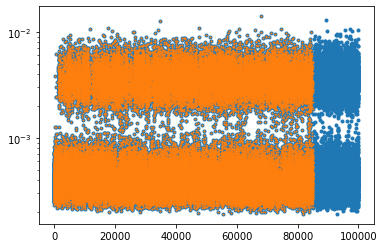

In [159]:
Sequence='AAAA'
j=0

univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
print(len(univ.trajectory))

print("A1H1'-A1H8")

atom1=univ.select_atoms("name H1' and resid 1")#,"name H8 and resid 1")
atom2=univ.select_atoms("name H8 and resid 1")
dist1=[]

for frame in univ.trajectory:
    dist1.append(distances.distance_array(atom1.positions,atom2.positions))

dist1=np.array(dist1)[:,0,0]
print(1/dist1**6)



plt.plot(noe[:100000,0],'.')
plt.plot(1/dist1**6,'.',markersize=2)
plt.yscale('log')


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


250001
A1H1'-A1H8
[0.00309479 0.0040272  0.003086   ... 0.00040132 0.00049901 0.00382077]


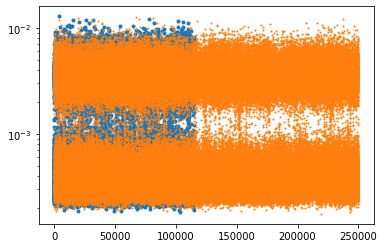

In [168]:
j=2

univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
print(len(univ.trajectory))

print("A1H1'-A1H8")

atom1=univ.select_atoms("name H1' and resid 1")#,"name H8 and resid 1")
atom2=univ.select_atoms("name H8 and resid 1")
dist2=[]

for frame in univ.trajectory:
    dist2.append(distances.distance_array(atom1.positions,atom2.positions))

dist2=np.array(dist2)[:,0,0]
print(1/dist2**6)

plt.plot(noe[85000:200000,0],'.')
plt.plot(1/dist2**6,'.',markersize=2)
plt.yscale('log')

In [170]:
print(1/dist1[-5:]**6)
print(noe[84996:85001,0])

print(1/dist2[:10]**6)
print(noe[285001:285010,0])

[0.00026345 0.00022191 0.00035642 0.00027872 0.00029605]
[0.00026345 0.00022191 0.00035642 0.00027872 0.00029605]
[0.00309479 0.0040272  0.003086   0.00456154 0.0039164  0.003056
 0.00319454 0.00332875 0.00396251 0.00368863]
[0.0040272  0.003086   0.00456155 0.00391641 0.00305599 0.00319454
 0.00332875 0.00396252 0.00368863]


In [174]:
data=pandas.read_csv('data/ff_anglesAAAA')
a=data['alpha[0]']

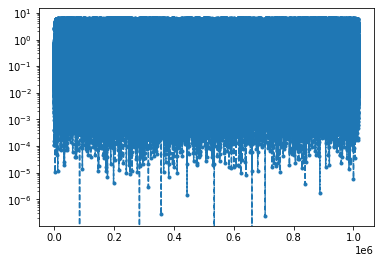

In [179]:
data=pandas.read_csv('data/ff_anglesAAAA')
a=data['alpha[0]']

b=np.ediff1d(a)
np.min(np.abs(b))
plt.plot(np.abs(b),'.--')
plt.yscale('log')

In [169]:
j=1

univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
print(univ)
print(len(univ.trajectory))

<Universe with 131 atoms>
200001


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


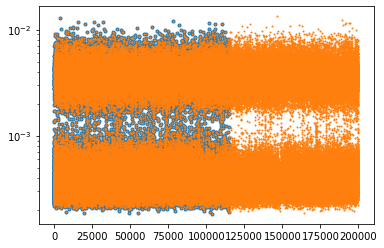

In [158]:
plt.plot(noe[85000:200000,0],'.')
plt.plot(1/dist**6,'.',markersize=2)
plt.yscale('log')

200001
(1017001, 36)
[0.00029605 0.00138662 0.00052418 ... 0.00657972 0.00422937 0.00309479]
[0.00037844 0.00040053 0.00048918 ... 0.00033388 0.00069702 0.00059051]
(200001,)


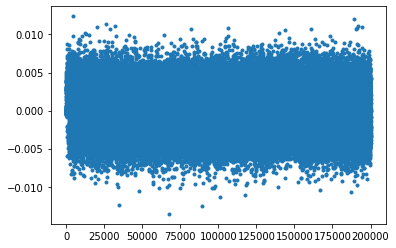

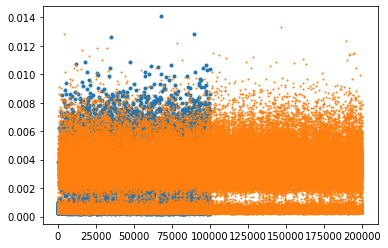

In [150]:
print(len(dist))
print(noe.shape)
print(1/dist**6)
print(noe[:,0])

diff=1/dist**6-noe[:len(dist),0]
print(diff.shape)
plt.plot(diff,'.')
#dist-noe[:len(dist),0]

plt.figure()
plt.plot(noe[:100000,0],'.')
plt.plot(1/dist**6,'.',markersize=2)

In [140]:
dist=[]
for j in range(5):
    univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
    for frame in univ.trajectory:
        dist.append(distances.distance_array(atom1.positions,atom2.positions))



/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/u/i/igilardo/.local/lib/python3.6

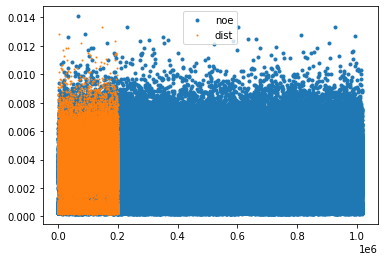

In [151]:
plt.figure()
plt.plot(noe[:,0],'.',label='noe')
dist=np.array(dist)#[:,0,0]
plt.plot(1/dist**6,'.',markersize=2,label='dist')
plt.legend()

In [3]:
names=['alpha[0]','alpha[1]','alpha[2]','zeta[0]','zeta[1]','zeta[2]']
nframes=np.zeros(5)
time_iter=np.zeros(5)
n_angles=6

for n_seq in [0]:#range(len(Sequences)):
#n_seq=0
    ##ff_angles=[]
    b=np.zeros((0,4))

    Sequence=Sequences[n_seq]

    for j in range(js[n_seq]):
        ff_angles=[]
        print(j+1)
        univ=mda.Universe('/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/reference_test.pdb' % (Sequence, Sequence),'/net/sbp/srnas2/tfrahlki/Simulations/%s_TREMD/Production/%s/traj6.%s.%s_proc.xtc' % (Sequence, Sequence, Sequence, j+1))
        
        #univ=mda.Universe('trajectories/reference_test%s.pdb' % (Sequence),'trajectories/traj6.%s.%s_proc.xtc' % (Sequence, j+1))

        nframes[n_seq] += len(univ.trajectory)
        ##print('n. of frames in the trajectory: ',nframes)

        gammas=[]

        for i in [1,2,3,4]:
            gammas.append(univ.select_atoms("name H4' and resid %s" %i, "name C4' and resid %s" %i, "name C5' and resid %s" %i, "name 1H5' and resid %s" %i))

        start=time.time()
        print(gammas)
        dih=dihedral(gammas).run()
        print(dih)
        ff_angles.append(dih.results.angles)

        print('time: ',time.time()-start)
        time_iter[n_seq]+=time.time()-start
        print('length (n. of frames): ',len(univ.trajectory))
    
        a=np.array(ff_angles)*np.pi/180
        print(a.shape)
        b=np.append(b,a[0,:,:],axis=0)#np.concatenate((a[0,:,:],a[1,:,:]),axis=1),axis=0)
        print('b shape: ',np.shape(b))
        #print(a)
        
        #b=np.concatenate((a[0,:,:],a[1,:,:]),axis=1)

    #b=np.concatenate([a[j] for j in range(js[n_seq])])
    #print('b shape: ',np.shape(b))


1
[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.1_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


time:  34.94516444206238
length (n. of frames):  85001
(1, 85001, 4)
b shape:  (85001, 4)
2


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.2_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  82.45588111877441
length (n. of frames):  200001
(1, 200001, 4)
b shape:  (285002, 4)
3


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.3_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  102.5931646823883
length (n. of frames):  250001
(1, 250001, 4)
b shape:  (535003, 4)
4


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.4_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  52.37405300140381
length (n. of frames):  126001
(1, 126001, 4)
b shape:  (661004, 4)
5


/u/i/igilardo/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:232: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/net/sbp/srnas2/tfrahlki/Simulations/AAAA_TREMD/Production/AAAA/.traj6.AAAA.5_proc.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


[<AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>, <AtomGroup with 4 atoms>]
time:  144.31430435180664
length (n. of frames):  356001
(1, 356001, 4)
b shape:  (1017005, 4)


In [4]:
b_old=b

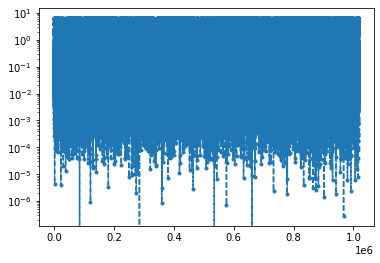

[[ 85000]
 [285001]
 [535002]
 [661003]]
(1017001, 4)


In [51]:
c=np.ediff1d(b[:,0])
plt.plot(np.abs(c),'.--')
plt.yscale('log')
plt.show()

print(np.argwhere(c==0.0))
#c=np.delete(c,np.argwhere(c=))
b=np.delete(b,np.argwhere(c==0),axis=0)
print(b.shape)


In [50]:
b=b_old

In [41]:
b_old.shape

(1017005, 4)

In [27]:
b.shape

(1017001, 4)

In [24]:
gamma_angle.shape

(1017000, 8)

In [33]:
(b[1:,0]-gamma_angle[:,0])/b[1:,0]

array([ 5.49820295e-06,  3.70285733e-06, -6.38840976e-06, ...,
       -4.70894390e-07,  2.14470749e-07, -7.44814678e-07])

In [39]:
b.shape

(1017001, 4)

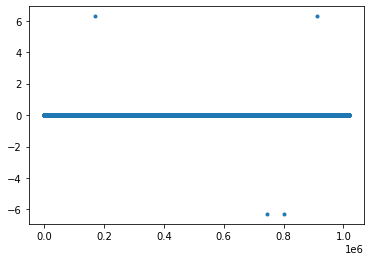

In [52]:
plt.plot(b[1:,0]-gamma_angle[:,0],'.')

[-0.92669296 -0.78153021 -0.96168993 -0.70326415 -1.0266727 ]
[-0.7815259  -0.9616864  -0.70326865 -1.0266752  -0.6328076 ]


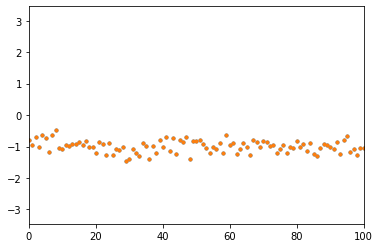

In [37]:
plt.plot(b_old[1:,0],'.')
plt.plot(gamma_angle[:,0],'.')#,markersize=2)
plt.xlim([0,100])

print(b_old[:5,0])
print(gamma_angle[:5,0])

In [30]:
# compare with gamma angles given by Thorben: which one is missing?
Sequence='AAAA'
gamma_angle=np.load(curr_dir+'/%s/MaxEnt_gamma_angle_%s_300K.npy' %(Sequence,Sequence))

In [31]:
gamma_angle.shape

(1017000, 8)

In [37]:
Sequences

['AAAA', 'CAAU', 'GACC', 'CCCC', 'UUUU', 'UCAAUC', 'UCUCGU']

fare medie solo sulla replica a 300K
con demux guarda da dove arrivano, per la stima dell'errore
bootstrap: 24 blocchi indipendenti, a seconda di dove arrivano; Dirichlet
bootstrap come cross validation: quant'è diverso il risultato rispetto ad usare tutti i dati

replicaindex.fvg con Gromacs


In [42]:
Sequences=['AAAA','CAAU','CCCC','GACC','UUUU']

def data():
    return 0

data.ff_f=[]

for s,Sequence in enumerate(Sequences):
    print(Sequence)
    

    data.ff_f.append(pandas.read_csv('FFF/angles/sincos%s' % Sequence))

AAAA
CAAU
CCCC
GACC
UUUU
